# Adaptative Impedance Controller 

Install the python libraries

In [1]:
from IPython.display import clear_output
from IPython.display import Image


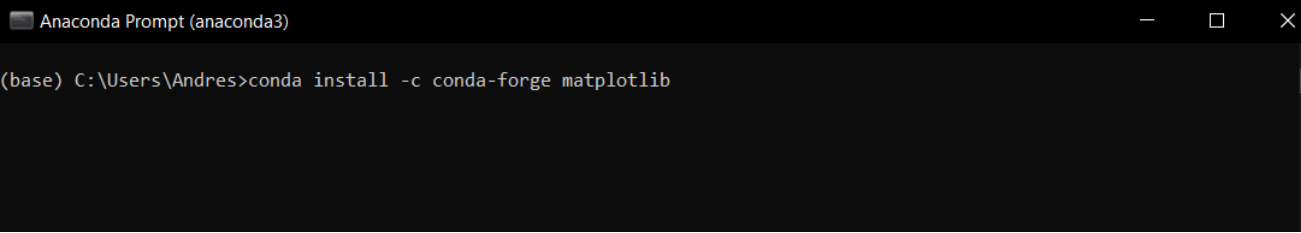

In [2]:
Image(filename='pictures/anacondapromt.png')

In [3]:
import time
import serial         #conda install -c anaconda pyserial
import numpy as np    #conda install -c anaconda numpy
import numpy.linalg as la
from datetime import datetime
import math
import json          #conda install -c jmcmurray json  
from scipy import stats  #conda install -c anaconda scipy
import matplotlib.pyplot as plt  #conda install -c conda-forge matplotlib

***
$\mathbf{\text{Basic Control Functions}}$<br>
***

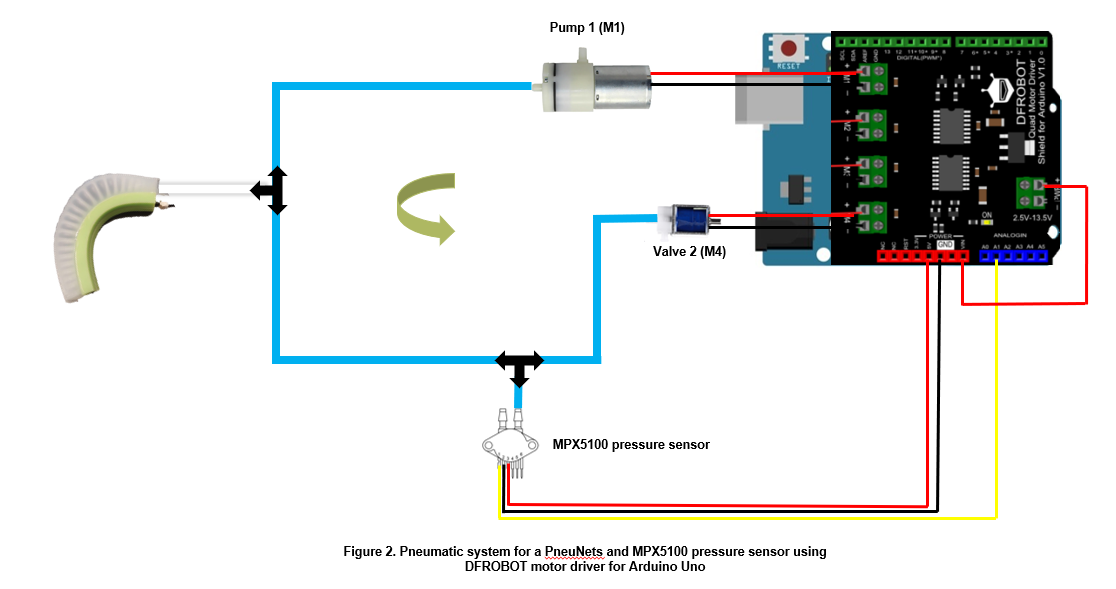

In [4]:
Image(filename='pictures/pneumaticsystem.png')

In [5]:
def star_communication(port):
    ser = serial.Serial(port, 115200, timeout=1)   #Include the number of the serial port
    return ser
    
def close_communication(ser):
    motor_control(ser,1)
    ser.close()


def read_data(ser, degree):
    #ser_bytes = ser.readline()
    ser.flushInput()
    
    cmd='r'+str(degree)+'\n'
    ser.write(bytes(cmd, encoding='ascii'))
    
    time.sleep(0.015)
    ser_bytes = ser.readline(ser.inWaiting())
    decoded_bytes = ser_bytes.decode()
    if len(decoded_bytes)>0 :
        decoded_bytes=decoded_bytes.strip()
        separated_data=decoded_bytes.split(",")
        if len(separated_data[0])>=4:
            integer_data = [i for i in separated_data]
            integer_array= np.array(integer_data)
        else:
            integer_array=np.zeros(5)
            integer_array[0]=2000
    else:
        integer_array=np.zeros(5)
        integer_array[0]=2000
    return integer_array

    
def feedback_data(ser, degree):              #current angle, current pressure, set_point(pressure or angle controller depends of the control), motor_speed
    integer_array=read_data(ser,degree)
    while len(integer_array)<5 or integer_array[0]==2000:
        integer_array=read_data(ser, degree)
    integer_array2=integer_array
    return integer_array2

def feedback_data2(ser, degree):              #current angle, current pressure, set_point(pressure or angle controller depends of the control), motor_speed
    integer_array=read_data(ser,degree)
    integer_array2=integer_array
    return integer_array2




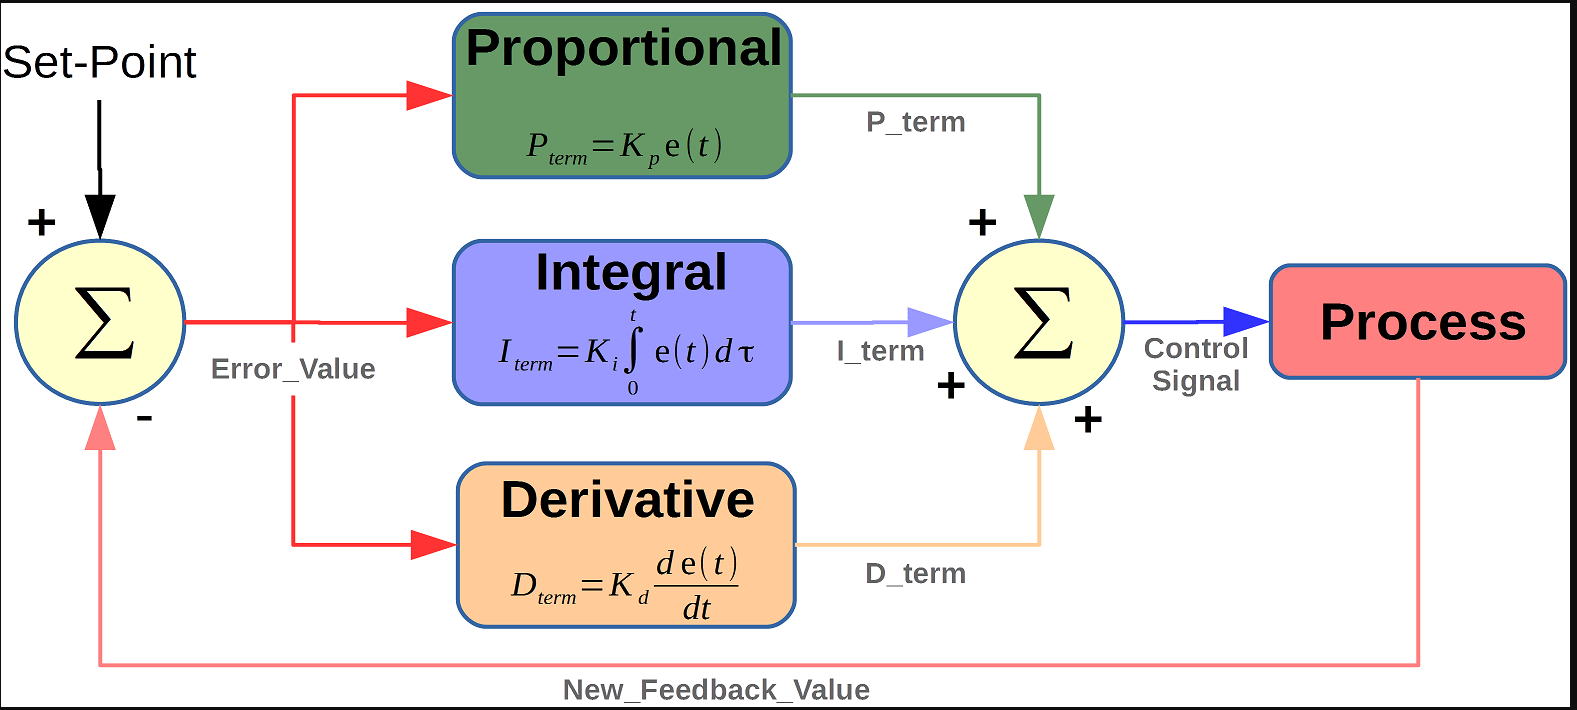

In [6]:
Image(filename='pictures/pid.png')

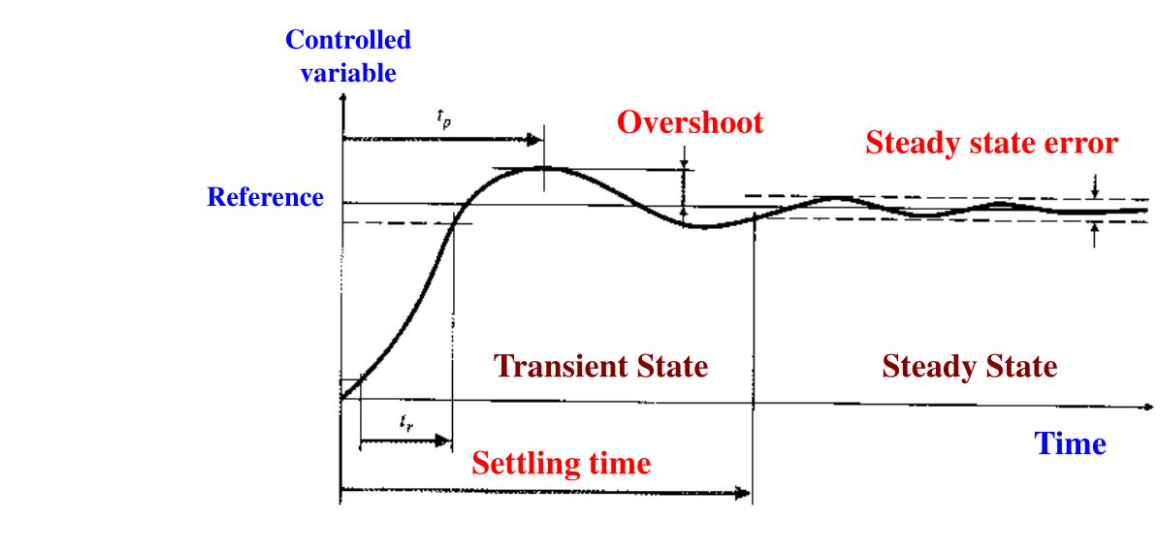

In [7]:
Image(filename='pictures/pid_response.png')

In [8]:
def motor_control(ser, speed_val):    #speed on the range of +255 to -255, Negative values just open the valve and stop the pump, 0 stops the pump but valve is still working
    ser_bytes = ser.readline()
    ser.flushInput()
    time.sleep(0.001)
    motor_speed=str(speed_val)
    cmd='m'+motor_speed+'\n'
    print(cmd)
    ser.write(bytes(cmd, encoding='ascii'))

def pressure_control(ser, pressure_val):    #pressure on the range of 0 to +25 kpa
    ser_bytes = ser.readline()
    ser.flushInput()
    time.sleep(0.001)
    motor_pressure=str(pressure_val)
    cmd='p'+motor_pressure+'\n'
    #print(cmd)
    ser.write(bytes(cmd, encoding='ascii'))
    
def bend_control(ser, bend_val):    #angle on the range of 0 to +180
    ser_bytes = ser.readline()
    ser.flushInput()
    time.sleep(0.001)
    motor_bend=str(bend_val)
    cmd='a'+motor_bend+'\n'
    #print(cmd)
    ser.write(bytes(cmd, encoding='ascii'))
    
def calibrate_zero(ser):    #speed on the range of +255 to -255, Negative values just open the valve and stop the pump, 0 stops the pump but valve is still working
    ser_bytes = ser.readline()
    ser.flushInput()
    time.sleep(0.001)
    cmd='l'+'0'+'\n'
    print(cmd)
    ser.write(bytes(cmd, encoding='ascii'))


1.&emsp;Demo code for control functions usage <br>

In [9]:
ser=star_communication('COM14')
motor_control(ser,50)        #Activating speed control with setpoint at 50
time.sleep(5)
pressure_control(ser, 22)    #Activating pressure control with setpoint at 22
time.sleep(5)
bend_control(ser, 90)        #Activating angle control with setpoint at 90
time.sleep(5)
values=feedback_data(ser)    #Getting data from microcontroller
time.sleep(0.1)
print(values)
values=feedback_data(ser)
time.sleep(0.1)
print(values)
close_communication(ser)

m50



TypeError: feedback_data() missing 1 required positional argument: 'degree'

In [10]:
ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(1)
ser.close()

SerialException: could not open port 'COM14': PermissionError(13, 'Access is denied.', None, 5)

2.&emsp;Demo code for simple close loop control <br>

In [ ]:
i=0
ser=star_communication('COM14')
values=feedback_data(ser,120)
bend_control(ser, 120)
while (i<1000):                     # Close loop controller
    #bend_control(ser, 120)
    time.sleep(0.1)
    values=feedback_data(ser,120)
    print(str(i)+' '+str(values))
    i=i+1
values=feedback_data(ser,120)
print(str(i)+' '+str(values))
close_communication(ser)

In [ ]:
ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(1)
ser.close()

***
$\mathbf{\text{Zero-torque Trajectory}}$<br>
***
1.&emsp;The zero-torque trajectory of the controller, $q_{d}(t)$ followed a minimum-jerk trajectory <br>

$$q_{d}(t) = q_{i} + (q_{f} - q_{i}) \Bigg[ 10 (\frac{t}{D})^3 - 15 (\frac{t}{D})^4 + 6 (\frac{t}{D})^5 \Bigg]   (4)$$

**Cite**: Equation (4) at Xiong, X., Nah, M. C., Krotov, A., & Sternad, D. (Accepted/In press). Online Impedance Adaptation Facilitates Manipulating a Whip. In Proceedings of the International Conference on Intelligent Robots and Systems (IROS 2021) IEEE.[Link](https://github.com/Jonasjcmh/PneuNet_Controller/blob/main/References/IROS21_1612_MS.pdf)

**Task**: Complete the function des_tra(self, t, dt), based on the equation 4 and the input parameters $q_{i}=$self.ini_ang, $q_{f}=$self.end_ang, $D=$self.dur <br>
**Use the function np.power(value,exponent)<br>

In [ ]:
Image(filename='pictures/minimal_jerk.png')

In [ ]:
def des_tra(self, t, dt):   ####Trajectory planner### minimum jerk trajectory equation 4 iros2021
        
        
        des_ang =  .....................
        
        deg_vel = (des_ang - self.pre_ang)/dt
        self.pre_ang = np.copy(des_ang)
        return des_ang, deg_vel

***
$\mathbf{\text{Adaptative Motor Controller}}$<br>
***

In [ ]:
Image(filename='pictures/acm.png')

1.&emsp;The position error $e(t)$, velocity error $\dot{e}(t)$, and tracking error $\varepsilon(t)$ are given by:  <br>

$$e(t)=q(t)-q_{d}(t)$$
$$\dot{e}(t)=\dot{q}(t)-\dot{q}_{d}(t)$$
$$\varepsilon(t)=e(t)+\beta\dot{e}(t)$$

**Cite**: Equation (3) at X. Xiong and P. Manoonpong, "Adaptive Motor Control for Human-like Spatial-temporal Adaptation," 2018 IEEE International Conference on Robotics and Biomimetics (ROBIO), 2018, pp. 2107-2112, doi: 10.1109/ROBIO.2018.8665222. [Link](https://github.com/Jonasjcmh/PneuNet_Controller/blob/main/References/root.pdf)

**Task**: Complete the function gen_vel_err(self), gen_track_err(self), based on the equation 3 and the input parameters $q=$self.q, $\dot{q}(t)=$self.dq, <br>
$\dot{q}_{d}(t)=$self.dq_d, $\beta=$self.k


In [ ]:
def gen_pos_err(self):   ## 2018 equ. 3
        #print np.mat(self.arm.q).shape, self.task.ref_traj_ang.shape
        return (self.q - self.q_d)

def gen_vel_err(self):   ## 2018 equ. 3
        #print np.mat(self.arm.dq).shape, self.task.ref_traj_vel.shape
        return (................)

def gen_track_err(self):  ## 2018 equ. 3
        return (................)

2.&emsp;$\gamma(t)$ is an adaptation scalar with the positive scalrs $a$ and $b$, defined as follows:  <br>

$$\gamma(t)=\frac{a}{1+b \mid\mid \varepsilon(t) \mid\mid^2 }$$


**Cite**: Equation (9) at X. Xiong and P. Manoonpong, "Adaptive Motor Control for Human-like Spatial-temporal Adaptation," 2018 IEEE International Conference on Robotics and Biomimetics (ROBIO), 2018, pp. 2107-2112, doi: 10.1109/ROBIO.2018.8665222. [Link](https://github.com/Jonasjcmh/PneuNet_Controller/blob/main/References/root.pdf)

**Task**: Complete the function gen_for_factor(self), based on the equation 9 and the input parameters $a=$self.a, $b=$self.b, and $\varepsilon(t)=$gen_track_err()<br>

To calculate the norm of the equation you can use the function la.norm()<br>


In [ ]:
def gen_for_factor(self):  ## 2018 equ. 9  adaptation rate
        return ................)

3.&emsp;The force and impedance adaptation is guided by: <br>

$$F(t)=\frac{\varepsilon(t)}{\gamma(t)}$$ <br>
$$K(t)=F(t)e^T(t)$$  <br>
$$D(t)=F(t)\dot{e}^T(t)$$ <br>



**Cite**: Equation (8) at X. Xiong and P. Manoonpong, "Adaptive Motor Control for Human-like Spatial-temporal Adaptation," 2018 IEEE International Conference on Robotics and Biomimetics (ROBIO), 2018, pp. 2107-2112, doi: 10.1109/ROBIO.2018.8665222. [Link](https://github.com/Jonasjcmh/PneuNet_Controller/blob/main/References/root.pdf)

**Task**: Complete the function update_impedance(self, q, q_d, dq, dq_d), based on the equation 8 and the input parameters <br>
$\varepsilon(t)=$gen_track_err(), <br>
$\gamma(t)=$gen_for_factor(), <br>
$e=$gen_pos_err(), <br>
$\dot{e}=$gen_vel_err().  <br>

**To calculate the transposed matrix of the vector you can use the function ndarray.T(), e.g. $e^T(t)=$self.gen_pos_err().T<br>

In [ ]:
def update_impedance(self, q, q_d, dq, dq_d):   ### main function for impedance control equation 8 and 9 in 2018 paper

        self.q = np.mat(np.copy(q)).T
        self.q_d = np.mat(np.copy(q_d)).T

        self.dq = np.mat(np.copy(dq)).T
        self.dq_d = np.mat(np.copy(dq_d)).T

        self.k_mat = ..................         #stiffness

        self.d_mat = ..................         # damping

        self.ff_tau_mat = self.gen_track_err() / self.gen_for_factor()

        return self.k_mat, self.d_mat, self.ff_tau_mat


***
$\mathbf{\text{Adaptative impedance controller Class}}$<br>
***

In [ ]:
class ada_imp_con( ):
    def __init__(self, dof):
        self.DOF = dof
        self.k_mat = np.mat(np.zeros((self.DOF, self.DOF)))
        self.d_mat = np.mat(np.zeros((self.DOF, self.DOF)))
        self.ff_tau_mat = np.mat(np.zeros((self.DOF, 1)))

        self.q = np.mat(np.zeros((self.DOF, 1)))
        self.q_d = np.mat(np.zeros((self.DOF, 1)))

        self.dq = np.mat(np.zeros((self.DOF, 1)))
        self.dq_d = np.mat(np.zeros((self.DOF, 1)))
        self.a = 0.2
        self.b = 44000.0#35000.0#5.0
        self.k = 0.05#

        #minimal jerk trajectory
        self.ini_ang = 0.0   #q_i
        self.end_ang = 60.0  #q_f
        self.dur = 2.0       #D
        self.pre_ang = 0.0
        
        
    def des_tra(self, t, dt):   ####Trajectory planner### minimum jerk trajectory equation 4 iros2021
        des_ang = self.ini_ang + ( self.end_ang - self.ini_ang ) * ( 10 * np.power(t,3 ) / ( self.dur ** 3 ) - 15 * np.power(t, 4 ) / ( self.dur ** 4 ) +  6 * np.power( t, 5 ) / ( self.dur ** 5 ) )
        deg_vel = (des_ang - self.pre_ang)/dt
        self.pre_ang = np.copy(des_ang)
        return des_ang, deg_vel
    
    
    def gen_pos_err(self):   ## 2018 equ. 3
      ##Complete ###

    def gen_vel_err(self):   ## 2018 equ. 3
      ##Complete ###

    def gen_track_err(self):  ## 2018 equ. 3
      ##Complete ###

    def gen_for_factor(self):  ## 2018 equ. 9  adaptation rate
      ##Complete ###
    
    def update_impedance(self, q, q_d, dq, dq_d):   ### main function for impedance control equation 8 and 9 in 2018 paper
        self.q = np.mat(np.copy(q)).T
        self.q_d = np.mat(np.copy(q_d)).T
        self.dq = np.mat(np.copy(dq)).T
        self.dq_d = np.mat(np.copy(dq_d)).T

        self.k_mat = ##Complete ###

        self.d_mat = ##Complete ###

        self.ff_tau_mat = self.gen_track_err() / self.gen_for_factor()
        
        return self.k_mat, self.d_mat, self.ff_tau_mat



In [ ]:
# %load scripts/ada_imp_con.py

***
$\mathbf{\text{Demo version: Control loop for soft actuator}}$<br>
***

Initial parameters

In [ ]:
ser=star_communication('COM14')

n_t=0.0                           ## runing time
duration = 30                     ## total process time
pre_t = 0.0                       ##previous time n-1
DOF = 1                           ## control degrees of freedom

ada = ada_imp_con(DOF)            ##initialization of the adaptative function

ada.end_ang = 120.0               ## maximal point to reach
ada = ada_imp_con(DOF)            ##initialization of the adaptative function
ada.dur = duration                ##duration of the whole trajectory


motor_control(ser,1)              ##enough time for start the pump
time.sleep(5)                     ##enough time for start the pump
motor_val = 0.0                   ##control output to the pump
max_mo_val = 250                  ## saturation value
fb_motor_val = 0.                 ##feedback of the motor speed


values=feedback_data(ser)        ##getting initial position of the robot
in_ang = float(values[0])        ##getting initial position of the robot
now_ang = np.copy(in_ang)        ##getting initial position of the robot
pre_ang = np.copy(in_ang)        ##getting initial position of the robot
now_vel = 0.0                    ##getting initial position of the robot

alp= 0.9                         ##low-pass filter with a low bias from the input constant
ave_ang_err = 0.0                ## angular error angle-desired angle
t_s = 0                          ## sample time
s_t = datetime.now()             ##current initial time

1.&emsp;The $\tau(t)$ produced by the AMC includes the force and impedance parts: <br>

$$\tau(t) = -F(t)-K(t)e(t)-D(t)\dot{e}(t)   (2)$$

**Cite**: Equation (2) at Xiong, X., Nah, M. C., Krotov, A., & Sternad, D. (Accepted/In press). Online Impedance Adaptation Facilitates Manipulating a Whip. In Proceedings of the International Conference on Intelligent Robots and Systems (IROS 2021) IEEE. [Link](https://github.com/Jonasjcmh/PneuNet_Controller/blob/main/References/root.pdf)

**Task**: Complete the calculation of $\tau(t)=$fb_motor_val, based on the equation 2 and the input parameters $-K=$k[0,0], $-D=$d[0,0],the error and velocity error are calculated based on the current angle (now_ang_rad), desired angle (des_ang_rad), current velocity (now_vel_rad), and desired velocity (des_vel_rad).<br>
** e=des_ang_rad-now_ang_rad, F(t) = 0, 

In [ ]:
while (n_t < duration ):

    diff_t = datetime.now() - s_t
    n_t = diff_t.seconds + diff_t.microseconds/1E6               ##current process time

    dt = n_t-pre_t                                               ## time for 1 iteration

    des_ang, des_vel = ada.des_tra(n_t, dt)                      ##etting the desired trajectory 
    des_ang = in_ang + des_ang                                   ##initial position compensation (translation pos)

    values=feedback_data(ser)

    now_ang = float(values[0])                                  ##transforming to float value
    now_ang = (alp * pre_ang) + (1.0-alp) * (now_ang)           ##low pass filter 
    if (dt > 0.0):                                              ##avoid undefinition
        now_vel = (now_ang - pre_ang)/dt                        ##calculating the current speed 
    else:
        now_vel = 0.0

    
    now_ang_rad = (now_ang/180.0)*math.pi   ##transforming in radians units  current angle
    des_ang_rad = (des_ang/180.0)*math.pi   ##transforming in radians units  desired angle
    now_vel_rad = (now_vel/180.0)*math.pi   ##transforming in radians units  current speed
    des_vel_rad = (des_vel/180.0)*math.pi   ##transforming in radians units  desired speed
    
    k, d, ff = ada.update_impedance(now_ang_rad, des_ang_rad, now_vel_rad, des_vel_rad)     ##k stifness  d damping  ff not used
    
    fb_motor_val = ###Complete .....###  ##equation 2 2018
    
    print(n_t, des_ang_rad-now_ang_rad)                                                     ##fb_motor_val, k[0,0], d[0,0])#des_ang_rad-now_ang_rad)
    ave_ang_err = ave_ang_err + abs(des_ang_rad-now_ang_rad)                                ##acumulated average error


   
    motor_val = des_ang * 2.5                     ##  feed forward control with constant a=2.5
    motor_val = motor_val + fb_motor_val          ##  feedback control + ff control

    if motor_val > max_mo_val:                    ##  saturation of the motor speed
        motor_val = max_mo_val
        print('out of limit!')
        #break
    motor_control(ser,motor_val)                 ##   asigning the value to the board
    #print(motor_val, fb_motor_val)
    #print(n_t, motor_val, des_ang, des_vel)

    #print(values)
    #print(dt)
    t_s = t_s + 1


    pre_t = np.copy(n_t)                         ##     saving the previous values for time
    pre_ang = np.copy(now_ang)                   ##     saving the previous values for angle

print(ave_ang_err/t_s)                           ##     average error
close_communication(ser)

In [ ]:
# %load scripts/acm_control.py

In [ ]:
ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(1)
ser.close()

***
$\mathbf{\text{Sigmoid Function Estimation}}$<br>
***

In [11]:
import numpy as np
import pylab
from scipy.optimize import curve_fit
import pandas as pd
from scipy import signal
import csv

import pandas as pd
from scipy import signal
import csv

In [7]:
def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

In [ ]:
Image(filename='pictures/sigmoid.png')

**Data set collection**

In [ ]:
i=0
ser=star_communication('COM14')
values=feedback_data(ser,120)
bend_control(ser, 120)
while (i<1000):                     # Close loop controller
    #bend_control(ser, 120)
    time.sleep(0.1)
    values=feedback_data(ser,120)
    print(str(i)+' '+str(values))
    i=i+1
values=feedback_data(ser,120)
print(str(i)+' '+str(values))
close_communication(ser)

In [ ]:
i=0
ser=star_communication('COM14')
bend_control(ser, 180)
values=feedback_data(ser,180)
with open("Dataset/Jonathan_dataset1.csv","a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])
            
while (i<600):                      # Close loop controller
    to=time.perf_counter()
    bend_control(ser, 180)
    time.sleep(0.001)
    values=feedback_data(ser)
    with open("Dataset/dataset6.csv","a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3], values[4]])
    #print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(1)
ser.close()

In [74]:
i=0
j=0
degree=0
ser=star_communication('COM9')
bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open("Dataset/Jonathan_dataset12.csv","a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])
            
while (i<4200):                      # Close loop controller
    j=j+1
    if j==600 :
        degree=degree+30
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open("Dataset/Jonathan_dataset12.csv","a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


i=0
j=0
degree=180
while (i<4200):                      # Close loop controller
    j=j+1
    if j==600 :
        degree=degree-30
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open("Dataset/Jonathan_dataset12.csv","a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM9')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

start
0 ['-11.73' '0.03' '0.00' '0' '']
1 ['-10.28' '0.03' '0.00' '0' '']
2 ['-10.28' '0.46' '0.00' '52' '']
3 ['-10.28' '0.90' '0.00' '52' '']
4 ['-10.28' '0.25' '0.00' '53' '']
5 ['-10.28' '0.25' '0.00' '53' '']
6 ['-10.28' '1.45' '0.00' '54' '']
7 ['-10.28' '0.57' '0.00' '54' '']
8 ['-10.28' '1.12' '0.00' '55' '']
9 ['-10.28' '1.12' '0.00' '55' '']
10 ['-10.28' '1.77' '0.00' '55' '']
11 ['-10.28' '1.12' '0.00' '56' '']
12 ['-10.28' '0.90' '0.00' '56' '']
13 ['-10.28' '1.01' '0.00' '57' '']
14 ['-10.28' '1.34' '0.00' '57' '']
15 ['-10.28' '2.32' '0.00' '58' '']
16 ['-10.28' '1.77' '0.00' '58' '']
17 ['-10.28' '2.54' '0.00' '59' '']
18 ['-10.28' '1.77' '0.00' '59' '']
19 ['-10.28' '2.65' '0.00' '59' '']
20 ['-10.28' '1.88' '0.00' '60' '']
21 ['-10.28' '1.55' '0.00' '60' '']
22 ['-10.28' '2.10' '0.00' '61' '']
23 ['-10.28' '1.77' '0.00' '61' '']
24 ['-10.28' '1.88' '0.00' '62' '']
25 ['-10.28' '3.08' '0.00' '62' '']
26 ['-10.28' '2.10' '0.00' '62' '']
27 ['-10.28' '3.19' '0.00' '63' ''

225 ['-5.63' '14.53' '0.00' '115' '']
226 ['-5.63' '15.40' '0.00' '115' '']
227 ['-5.63' '14.63' '0.00' '116' '']
228 ['-5.63' '14.42' '0.00' '116' '']
229 ['-5.63' '16.27' '0.00' '116' '']
230 ['-5.63' '15.40' '0.00' '116' '']
231 ['-5.63' '14.74' '0.00' '117' '']
232 ['-5.63' '15.62' '0.00' '117' '']
233 ['-5.63' '15.83' '0.00' '118' '']
234 ['-5.63' '17.14' '0.00' '118' '']
235 ['-5.63' '16.60' '0.00' '118' '']
236 ['-5.63' '14.85' '0.00' '118' '']
237 ['-5.63' '15.72' '0.00' '118' '']
238 ['-5.63' '17.47' '0.00' '119' '']
239 ['-5.63' '15.18' '0.00' '119' '']
240 ['-5.63' '15.62' '0.00' '119' '']
241 ['-5.63' '15.94' '0.00' '119' '']
242 ['-4.88' '17.47' '0.00' '120' '']
243 ['-4.88' '15.18' '0.00' '120' '']
244 ['-4.88' '15.40' '0.00' '116' '']
245 ['-4.88' '15.18' '0.00' '116' '']
246 ['-4.88' '15.83' '0.00' '117' '']
247 ['-4.88' '17.36' '0.00' '117' '']
248 ['-4.88' '15.29' '0.00' '117' '']
249 ['-4.88' '15.51' '0.00' '117' '']
250 ['-4.88' '17.58' '0.00' '117' '']
251 ['-4.88'

444 ['-0.27' '20.30' '0.00' '113' '']
445 ['-0.27' '20.41' '0.00' '113' '']
446 ['-0.27' '18.34' '0.00' '113' '']
447 ['-0.27' '20.41' '0.00' '113' '']
448 ['-0.27' '18.34' '0.00' '113' '']
449 ['-0.27' '18.99' '0.00' '113' '']
450 ['-0.27' '20.41' '0.00' '113' '']
451 ['-0.27' '20.19' '0.00' '113' '']
452 ['-0.27' '19.21' '0.00' '113' '']
453 ['-0.27' '20.19' '0.00' '113' '']
454 ['-0.27' '19.10' '0.00' '113' '']
455 ['-0.27' '18.34' '0.00' '113' '']
456 ['-0.27' '19.21' '0.00' '113' '']
457 ['-0.27' '20.19' '0.00' '113' '']
458 ['-0.27' '19.21' '0.00' '113' '']
459 ['-0.27' '20.19' '0.00' '113' '']
460 ['-0.27' '19.32' '0.00' '113' '']
461 ['0.52' '19.43' '0.00' '113' '']
462 ['0.52' '20.96' '0.00' '113' '']
463 ['0.52' '19.43' '0.00' '113' '']
464 ['0.52' '19.76' '0.00' '109' '']
465 ['0.52' '18.89' '0.00' '109' '']
466 ['0.52' '18.45' '0.00' '109' '']
467 ['0.52' '20.41' '0.00' '109' '']
468 ['0.52' '18.45' '0.00' '109' '']
469 ['0.52' '20.41' '0.00' '109' '']
470 ['0.52' '19.54' '

663 ['23.19' '23.68' '30.00' '194' '']
664 ['24.03' '25.43' '30.00' '190' '']
665 ['24.03' '26.08' '30.00' '190' '']
666 ['24.93' '23.46' '30.00' '186' '']
667 ['24.93' '23.57' '30.00' '186' '']
668 ['24.93' '23.35' '30.00' '186' '']
669 ['25.72' '23.68' '30.00' '187' '']
670 ['25.72' '23.46' '30.00' '183' '']
671 ['26.52' '23.79' '30.00' '183' '']
672 ['26.52' '25.43' '30.00' '183' '']
673 ['26.52' '23.79' '30.00' '179' '']
674 ['26.52' '23.57' '30.00' '179' '']
675 ['27.28' '23.46' '30.00' '180' '']
676 ['27.28' '23.57' '30.00' '180' '']
677 ['27.28' '24.88' '30.00' '176' '']
678 ['27.28' '23.57' '30.00' '176' '']
679 ['28.17' '24.23' '30.00' '172' '']
680 ['28.17' '23.79' '30.00' '172' '']
681 ['28.17' '23.57' '30.00' '172' '']
682 ['28.17' '24.23' '30.00' '172' '']
683 ['28.99' '23.35' '30.00' '168' '']
684 ['28.99' '24.34' '30.00' '168' '']
685 ['29.80' '23.68' '30.00' '168' '']
686 ['29.80' '23.79' '30.00' '168' '']
687 ['29.80' '23.57' '30.00' '164' '']
688 ['29.80' '24.34' '30.

877 ['33.07' '23.35' '30.00' '108' '']
878 ['33.07' '23.46' '30.00' '108' '']
879 ['32.30' '23.46' '30.00' '112' '']
880 ['32.30' '22.70' '30.00' '112' '']
881 ['32.30' '23.46' '30.00' '112' '']
882 ['32.30' '23.25' '30.00' '112' '']
883 ['32.30' '24.99' '30.00' '112' '']
884 ['32.30' '22.70' '30.00' '112' '']
885 ['32.30' '24.55' '30.00' '112' '']
886 ['32.30' '22.59' '30.00' '111' '']
887 ['32.30' '23.25' '30.00' '111' '']
888 ['32.30' '24.23' '30.00' '111' '']
889 ['32.30' '23.14' '30.00' '111' '']
890 ['32.30' '22.70' '30.00' '111' '']
891 ['32.30' '24.34' '30.00' '111' '']
892 ['32.30' '22.70' '30.00' '111' '']
893 ['32.30' '22.59' '30.00' '111' '']
894 ['32.30' '23.79' '30.00' '111' '']
895 ['32.30' '22.59' '30.00' '110' '']
896 ['32.30' '23.03' '30.00' '110' '']
897 ['32.30' '22.70' '30.00' '110' '']
898 ['32.30' '23.68' '30.00' '110' '']
899 ['32.30' '22.59' '30.00' '110' '']
900 ['32.30' '23.14' '30.00' '110' '']
901 ['31.44' '22.92' '30.00' '110' '']
902 ['31.44' '25.10' '30.

1085 ['29.84' '22.37' '30.00' '119' '']
1086 ['29.84' '23.35' '30.00' '119' '']
1087 ['29.84' '23.03' '30.00' '119' '']
1088 ['29.84' '23.25' '30.00' '119' '']
1089 ['29.84' '22.26' '30.00' '119' '']
1090 ['29.84' '22.81' '30.00' '119' '']
1091 ['29.84' '23.46' '30.00' '119' '']
1092 ['29.84' '23.03' '30.00' '119' '']
1093 ['29.84' '24.55' '30.00' '119' '']
1094 ['29.84' '22.92' '30.00' '119' '']
1095 ['29.84' '22.48' '30.00' '119' '']
1096 ['29.84' '22.48' '30.00' '119' '']
1097 ['29.84' '24.88' '30.00' '119' '']
1098 ['29.84' '22.26' '30.00' '119' '']
1099 ['29.84' '24.12' '30.00' '119' '']
1100 ['29.84' '22.59' '30.00' '119' '']
1101 ['29.84' '23.14' '30.00' '119' '']
1102 ['29.84' '22.16' '30.00' '119' '']
1103 ['29.84' '22.26' '30.00' '119' '']
1104 ['29.84' '22.92' '30.00' '119' '']
1105 ['29.84' '23.25' '30.00' '119' '']
1106 ['29.84' '24.23' '30.00' '119' '']
1107 ['29.84' '23.25' '30.00' '119' '']
1108 ['29.84' '24.12' '30.00' '119' '']
1109 ['29.84' '22.48' '30.00' '119' '']


1294 ['62.90' '26.08' '60.00' '160' '']
1295 ['63.68' '24.99' '60.00' '160' '']
1296 ['63.68' '23.68' '60.00' '156' '']
1297 ['63.68' '24.01' '60.00' '156' '']
1298 ['63.68' '24.34' '60.00' '155' '']
1299 ['63.68' '24.12' '60.00' '155' '']
1300 ['63.68' '24.66' '60.00' '155' '']
1301 ['63.68' '23.68' '60.00' '155' '']
1302 ['63.68' '24.01' '60.00' '155' '']
1303 ['64.53' '24.23' '60.00' '155' '']
1304 ['64.53' '24.55' '60.00' '155' '']
1305 ['64.53' '24.34' '60.00' '150' '']
1306 ['64.53' '25.10' '60.00' '150' '']
1307 ['64.53' '23.90' '60.00' '149' '']
1308 ['64.53' '26.19' '60.00' '149' '']
1309 ['64.53' '24.12' '60.00' '149' '']
1310 ['64.53' '23.68' '60.00' '149' '']
1311 ['65.34' '24.23' '60.00' '148' '']
1312 ['65.34' '25.43' '60.00' '148' '']
1313 ['65.34' '24.23' '60.00' '144' '']
1314 ['65.34' '24.99' '60.00' '144' '']
1315 ['65.34' '24.01' '60.00' '143' '']
1316 ['65.34' '24.99' '60.00' '143' '']
1317 ['65.34' '23.90' '60.00' '143' '']
1318 ['65.34' '24.12' '60.00' '143' '']


1501 ['62.10' '25.21' '60.00' '111' '']
1502 ['62.10' '23.25' '60.00' '111' '']
1503 ['62.10' '25.43' '60.00' '111' '']
1504 ['62.10' '24.99' '60.00' '111' '']
1505 ['62.10' '23.14' '60.00' '111' '']
1506 ['62.10' '24.88' '60.00' '111' '']
1507 ['62.10' '23.14' '60.00' '111' '']
1508 ['62.10' '22.92' '60.00' '111' '']
1509 ['62.10' '24.34' '60.00' '111' '']
1510 ['62.10' '22.92' '60.00' '110' '']
1511 ['62.10' '24.66' '60.00' '110' '']
1512 ['62.10' '24.77' '60.00' '110' '']
1513 ['62.10' '23.14' '60.00' '110' '']
1514 ['62.10' '25.21' '60.00' '110' '']
1515 ['62.10' '23.35' '60.00' '110' '']
1516 ['62.10' '23.14' '60.00' '110' '']
1517 ['62.10' '23.03' '60.00' '110' '']
1518 ['62.10' '22.92' '60.00' '110' '']
1519 ['62.10' '24.88' '60.00' '110' '']
1520 ['62.10' '23.03' '60.00' '110' '']
1521 ['62.10' '24.12' '60.00' '109' '']
1522 ['62.10' '23.25' '60.00' '109' '']
1523 ['62.10' '24.12' '60.00' '109' '']
1524 ['62.10' '22.92' '60.00' '109' '']
1525 ['61.33' '25.43' '60.00' '113' '']


1706 ['59.01' '23.57' '60.00' '125' '']
1707 ['59.01' '23.57' '60.00' '126' '']
1708 ['59.01' '23.25' '60.00' '126' '']
1709 ['59.01' '23.35' '60.00' '126' '']
1710 ['59.01' '23.57' '60.00' '126' '']
1711 ['59.01' '23.46' '60.00' '126' '']
1712 ['59.01' '23.90' '60.00' '126' '']
1713 ['59.01' '23.79' '60.00' '126' '']
1714 ['59.76' '23.90' '60.00' '126' '']
1715 ['59.76' '23.79' '60.00' '126' '']
1716 ['59.76' '23.03' '60.00' '122' '']
1717 ['59.76' '23.14' '60.00' '122' '']
1718 ['59.76' '23.57' '60.00' '122' '']
1719 ['59.76' '25.53' '60.00' '122' '']
1720 ['59.76' '23.57' '60.00' '122' '']
1721 ['59.76' '22.92' '60.00' '122' '']
1722 ['59.76' '23.90' '60.00' '122' '']
1723 ['59.76' '23.90' '60.00' '122' '']
1724 ['59.76' '24.01' '60.00' '122' '']
1725 ['59.76' '22.92' '60.00' '122' '']
1726 ['59.76' '23.25' '60.00' '122' '']
1727 ['59.76' '23.90' '60.00' '122' '']
1728 ['59.76' '23.35' '60.00' '122' '']
1729 ['59.76' '23.79' '60.00' '122' '']
1730 ['59.76' '23.46' '60.00' '122' '']


1914 ['90.90' '24.66' '90.00' '184' '']
1915 ['91.71' '23.79' '90.00' '184' '']
1916 ['91.71' '24.01' '90.00' '180' '']
1917 ['91.71' '24.12' '90.00' '180' '']
1918 ['91.71' '23.79' '90.00' '180' '']
1919 ['91.71' '23.90' '90.00' '180' '']
1920 ['92.46' '26.30' '90.00' '180' '']
1921 ['92.46' '23.79' '90.00' '180' '']
1922 ['92.46' '24.88' '90.00' '176' '']
1923 ['92.46' '24.12' '90.00' '176' '']
1924 ['92.46' '24.34' '90.00' '176' '']
1925 ['92.46' '23.79' '90.00' '175' '']
1926 ['92.46' '26.30' '90.00' '175' '']
1927 ['93.25' '23.79' '90.00' '175' '']
1928 ['93.25' '24.66' '90.00' '175' '']
1929 ['93.25' '24.12' '90.00' '171' '']
1930 ['93.25' '23.68' '90.00' '171' '']
1931 ['93.25' '26.19' '90.00' '171' '']
1932 ['93.25' '23.68' '90.00' '171' '']
1933 ['93.25' '24.12' '90.00' '171' '']
1934 ['94.03' '23.57' '90.00' '170' '']
1935 ['94.03' '24.55' '90.00' '170' '']
1936 ['94.03' '23.79' '90.00' '166' '']
1937 ['94.03' '23.79' '90.00' '166' '']
1938 ['94.03' '23.46' '90.00' '166' '']


2120 ['95.57' '22.92' '90.00' '101' '']
2121 ['95.57' '23.35' '90.00' '101' '']
2122 ['95.57' '23.25' '90.00' '100' '']
2123 ['95.57' '22.81' '90.00' '100' '']
2124 ['95.57' '23.25' '90.00' '100' '']
2125 ['95.57' '23.68' '90.00' '100' '']
2126 ['95.57' '24.66' '90.00' '99' '']
2127 ['95.57' '24.12' '90.00' '99' '']
2128 ['95.57' '23.57' '90.00' '99' '']
2129 ['94.82' '22.92' '90.00' '99' '']
2130 ['94.82' '25.32' '90.00' '102' '']
2131 ['94.82' '23.25' '90.00' '102' '']
2132 ['94.82' '23.79' '90.00' '101' '']
2133 ['94.82' '24.88' '90.00' '101' '']
2134 ['94.82' '23.46' '90.00' '101' '']
2135 ['94.82' '24.01' '90.00' '101' '']
2136 ['94.82' '22.92' '90.00' '100' '']
2137 ['94.82' '23.35' '90.00' '100' '']
2138 ['94.82' '23.68' '90.00' '100' '']
2139 ['94.82' '22.92' '90.00' '100' '']
2140 ['94.82' '23.79' '90.00' '100' '']
2141 ['94.00' '23.79' '90.00' '100' '']
2142 ['94.00' '24.66' '90.00' '100' '']
2143 ['94.00' '23.79' '90.00' '103' '']
2144 ['94.00' '23.03' '90.00' '103' '']
2145

2325 ['89.31' '23.46' '90.00' '119' '']
2326 ['89.31' '25.10' '90.00' '119' '']
2327 ['89.31' '23.57' '90.00' '119' '']
2328 ['89.31' '24.34' '90.00' '119' '']
2329 ['89.31' '23.03' '90.00' '119' '']
2330 ['89.31' '22.92' '90.00' '119' '']
2331 ['89.31' '25.10' '90.00' '119' '']
2332 ['89.31' '22.70' '90.00' '119' '']
2333 ['89.31' '23.79' '90.00' '119' '']
2334 ['89.31' '22.92' '90.00' '119' '']
2335 ['89.31' '24.01' '90.00' '119' '']
2336 ['89.31' '23.35' '90.00' '119' '']
2337 ['89.31' '23.79' '90.00' '119' '']
2338 ['89.31' '25.10' '90.00' '119' '']
2339 ['89.31' '22.70' '90.00' '119' '']
2340 ['89.31' '22.70' '90.00' '119' '']
2341 ['89.31' '23.46' '90.00' '119' '']
2342 ['89.31' '22.92' '90.00' '119' '']
2343 ['89.31' '23.03' '90.00' '119' '']
2344 ['89.31' '23.46' '90.00' '119' '']
2345 ['89.31' '25.32' '90.00' '119' '']
2346 ['89.31' '22.81' '90.00' '119' '']
2347 ['89.31' '24.34' '90.00' '119' '']
2348 ['89.31' '22.92' '90.00' '119' '']
2349 ['89.31' '23.35' '90.00' '119' '']


2528 ['123.25' '24.34' '120.00' '180' '']
2529 ['124.02' '24.44' '120.00' '180' '']
2530 ['124.02' '24.44' '120.00' '180' '']
2531 ['124.02' '24.55' '120.00' '176' '']
2532 ['124.02' '24.12' '120.00' '176' '']
2533 ['124.02' '24.23' '120.00' '175' '']
2534 ['124.02' '24.01' '120.00' '175' '']
2535 ['124.82' '24.01' '120.00' '171' '']
2536 ['124.82' '23.90' '120.00' '171' '']
2537 ['124.82' '24.88' '120.00' '170' '']
2538 ['124.82' '23.79' '120.00' '170' '']
2539 ['124.82' '24.44' '120.00' '170' '']
2540 ['124.82' '25.64' '120.00' '170' '']
2541 ['125.66' '23.79' '120.00' '170' '']
2542 ['125.66' '24.44' '120.00' '165' '']
2543 ['125.66' '24.01' '120.00' '165' '']
2544 ['125.66' '24.55' '120.00' '165' '']
2545 ['125.66' '24.66' '120.00' '165' '']
2546 ['125.66' '24.12' '120.00' '164' '']
2547 ['125.66' '24.34' '120.00' '164' '']
2548 ['126.41' '24.12' '120.00' '164' '']
2549 ['126.41' '24.34' '120.00' '160' '']
2550 ['126.41' '24.34' '120.00' '160' '']
2551 ['126.41' '24.34' '120.00' '1

2727 ['124.99' '23.46' '120.00' '95' '']
2728 ['124.99' '23.35' '120.00' '99' '']
2729 ['124.99' '23.35' '120.00' '99' '']
2730 ['124.99' '23.68' '120.00' '99' '']
2731 ['124.99' '24.23' '120.00' '99' '']
2732 ['124.99' '24.88' '120.00' '98' '']
2733 ['124.99' '23.57' '120.00' '98' '']
2734 ['124.99' '23.90' '120.00' '98' '']
2735 ['124.99' '24.34' '120.00' '98' '']
2736 ['124.99' '23.14' '120.00' '98' '']
2737 ['124.99' '24.88' '120.00' '97' '']
2738 ['124.99' '24.99' '120.00' '97' '']
2739 ['124.99' '23.25' '120.00' '97' '']
2740 ['124.99' '23.35' '120.00' '97' '']
2741 ['124.99' '23.35' '120.00' '96' '']
2742 ['124.22' '23.46' '120.00' '96' '']
2743 ['124.22' '24.44' '120.00' '96' '']
2744 ['124.22' '24.23' '120.00' '99' '']
2745 ['124.22' '23.90' '120.00' '99' '']
2746 ['124.22' '23.79' '120.00' '99' '']
2747 ['124.22' '25.43' '120.00' '99' '']
2748 ['124.22' '24.34' '120.00' '99' '']
2749 ['124.22' '23.68' '120.00' '99' '']
2750 ['124.22' '25.64' '120.00' '99' '']
2751 ['124.22' '

2924 ['118.65' '24.12' '120.00' '121' '']
2925 ['118.65' '25.21' '120.00' '121' '']
2926 ['118.65' '23.25' '120.00' '121' '']
2927 ['118.65' '23.14' '120.00' '121' '']
2928 ['118.65' '23.03' '120.00' '121' '']
2929 ['118.65' '23.68' '120.00' '121' '']
2930 ['118.65' '24.01' '120.00' '121' '']
2931 ['118.65' '23.03' '120.00' '121' '']
2932 ['118.65' '23.35' '120.00' '121' '']
2933 ['118.65' '23.46' '120.00' '121' '']
2934 ['118.65' '23.79' '120.00' '122' '']
2935 ['118.65' '22.92' '120.00' '122' '']
2936 ['118.65' '23.57' '120.00' '122' '']
2937 ['118.65' '23.03' '120.00' '122' '']
2938 ['118.65' '24.12' '120.00' '122' '']
2939 ['118.65' '23.14' '120.00' '122' '']
2940 ['118.65' '23.14' '120.00' '122' '']
2941 ['118.65' '23.14' '120.00' '122' '']
2942 ['118.65' '23.79' '120.00' '122' '']
2943 ['118.65' '24.01' '120.00' '122' '']
2944 ['118.65' '25.32' '120.00' '122' '']
2945 ['118.65' '23.90' '120.00' '122' '']
2946 ['118.65' '25.43' '120.00' '122' '']
2947 ['117.87' '23.90' '120.00' '1

3124 ['149.39' '24.34' '150.00' '212' '']
3125 ['149.39' '24.34' '150.00' '212' '']
3126 ['149.39' '25.10' '150.00' '212' '']
3127 ['150.16' '24.55' '150.00' '212' '']
3128 ['150.16' '23.57' '150.00' '208' '']
3129 ['150.16' '24.55' '150.00' '208' '']
3130 ['150.95' '24.44' '150.00' '208' '']
3131 ['150.95' '24.77' '150.00' '208' '']
3132 ['150.95' '24.34' '150.00' '204' '']
3133 ['150.95' '24.55' '150.00' '204' '']
3134 ['151.75' '24.34' '150.00' '200' '']
3135 ['151.75' '26.84' '150.00' '200' '']
3136 ['151.75' '24.55' '150.00' '200' '']
3137 ['151.75' '24.44' '150.00' '200' '']
3138 ['151.75' '24.34' '150.00' '200' '']
3139 ['152.59' '25.86' '150.00' '200' '']
3140 ['152.59' '25.21' '150.00' '200' '']
3141 ['152.59' '26.08' '150.00' '195' '']
3142 ['152.59' '24.88' '150.00' '195' '']
3143 ['152.59' '24.55' '150.00' '195' '']
3144 ['152.59' '23.79' '150.00' '195' '']
3145 ['152.59' '24.34' '150.00' '195' '']
3146 ['153.39' '24.34' '150.00' '195' '']
3147 ['153.39' '25.21' '150.00' '1

3322 ['159.77' '24.34' '150.00' '82' '']
3323 ['158.89' '24.01' '150.00' '81' '']
3324 ['158.89' '24.01' '150.00' '81' '']
3325 ['158.89' '24.01' '150.00' '85' '']
3326 ['158.89' '24.88' '150.00' '85' '']
3327 ['158.89' '23.79' '150.00' '84' '']
3328 ['158.89' '24.23' '150.00' '84' '']
3329 ['158.89' '24.55' '150.00' '83' '']
3330 ['158.89' '23.90' '150.00' '83' '']
3331 ['158.89' '24.23' '150.00' '83' '']
3332 ['158.89' '24.01' '150.00' '82' '']
3333 ['158.89' '23.79' '150.00' '82' '']
3334 ['158.89' '24.34' '150.00' '81' '']
3335 ['158.89' '24.34' '150.00' '81' '']
3336 ['158.12' '23.79' '150.00' '84' '']
3337 ['158.12' '24.12' '150.00' '84' '']
3338 ['158.12' '24.44' '150.00' '84' '']
3339 ['158.12' '24.23' '150.00' '84' '']
3340 ['158.12' '23.46' '150.00' '83' '']
3341 ['158.12' '24.34' '150.00' '82' '']
3342 ['158.12' '23.68' '150.00' '82' '']
3343 ['158.12' '24.44' '150.00' '82' '']
3344 ['158.12' '23.57' '150.00' '81' '']
3345 ['158.12' '24.01' '150.00' '81' '']
3346 ['158.12' '

3522 ['148.00' '23.25' '150.00' '114' '']
3523 ['148.00' '24.77' '150.00' '114' '']
3524 ['148.00' '22.92' '150.00' '114' '']
3525 ['148.00' '23.35' '150.00' '115' '']
3526 ['148.00' '23.57' '150.00' '115' '']
3527 ['148.00' '24.77' '150.00' '115' '']
3528 ['148.00' '23.90' '150.00' '115' '']
3529 ['148.00' '23.35' '150.00' '115' '']
3530 ['148.00' '24.88' '150.00' '115' '']
3531 ['148.00' '23.68' '150.00' '115' '']
3532 ['148.00' '23.46' '150.00' '115' '']
3533 ['148.00' '23.57' '150.00' '115' '']
3534 ['148.00' '23.57' '150.00' '115' '']
3535 ['148.00' '25.21' '150.00' '115' '']
3536 ['148.00' '23.03' '150.00' '116' '']
3537 ['148.00' '23.68' '150.00' '116' '']
3538 ['148.00' '24.12' '150.00' '116' '']
3539 ['148.00' '23.25' '150.00' '116' '']
3540 ['148.00' '23.57' '150.00' '116' '']
3541 ['148.00' '22.92' '150.00' '116' '']
3542 ['148.00' '25.43' '150.00' '116' '']
3543 ['148.00' '24.12' '150.00' '116' '']
3544 ['148.00' '23.35' '150.00' '116' '']
3545 ['148.00' '23.57' '150.00' '1

3718 ['172.44' '24.01' '180.00' '255' '']
3719 ['173.28' '24.66' '180.00' '255' '']
3720 ['173.28' '28.26' '180.00' '255' '']
3721 ['173.28' '24.34' '180.00' '255' '']
3722 ['174.06' '24.66' '180.00' '255' '']
3723 ['174.06' '23.68' '180.00' '255' '']
3724 ['174.06' '28.37' '180.00' '255' '']
3725 ['174.06' '24.12' '180.00' '255' '']
3726 ['174.82' '24.77' '180.00' '255' '']
3727 ['174.82' '26.52' '180.00' '255' '']
3728 ['174.82' '27.82' '180.00' '255' '']
3729 ['174.82' '28.15' '180.00' '255' '']
3730 ['174.82' '24.77' '180.00' '255' '']
3731 ['175.60' '24.66' '180.00' '255' '']
3732 ['175.60' '23.79' '180.00' '255' '']
3733 ['175.60' '28.48' '180.00' '254' '']
3734 ['175.60' '23.90' '180.00' '254' '']
3735 ['176.39' '24.77' '180.00' '255' '']
3736 ['176.39' '24.55' '180.00' '255' '']
3737 ['176.39' '23.79' '180.00' '251' '']
3738 ['176.39' '24.01' '180.00' '251' '']
3739 ['176.39' '24.44' '180.00' '252' '']
3740 ['177.20' '24.88' '180.00' '252' '']
3741 ['177.20' '27.93' '180.00' '2

3917 ['183.43' '24.88' '180.00' '193' '']
3918 ['183.43' '24.66' '180.00' '193' '']
3919 ['183.43' '24.55' '180.00' '192' '']
3920 ['183.43' '24.66' '180.00' '192' '']
3921 ['183.43' '24.55' '180.00' '192' '']
3922 ['183.43' '24.55' '180.00' '192' '']
3923 ['183.43' '26.19' '180.00' '192' '']
3924 ['183.43' '24.44' '180.00' '192' '']
3925 ['183.43' '24.66' '180.00' '192' '']
3926 ['184.24' '24.66' '180.00' '191' '']
3927 ['184.24' '24.55' '180.00' '191' '']
3928 ['184.24' '24.88' '180.00' '187' '']
3929 ['184.24' '24.55' '180.00' '187' '']
3930 ['184.24' '24.77' '180.00' '186' '']
3931 ['184.24' '24.88' '180.00' '186' '']
3932 ['184.24' '27.28' '180.00' '186' '']
3933 ['184.24' '25.43' '180.00' '186' '']
3934 ['184.24' '27.39' '180.00' '186' '']
3935 ['184.24' '24.77' '180.00' '186' '']
3936 ['184.24' '24.55' '180.00' '185' '']
3937 ['184.24' '24.77' '180.00' '185' '']
3938 ['185.00' '24.44' '180.00' '181' '']
3939 ['185.00' '24.99' '180.00' '181' '']
3940 ['185.00' '24.55' '180.00' '1

4116 ['184.94' '24.44' '180.00' '152' '']
4117 ['184.94' '25.21' '180.00' '148' '']
4118 ['184.94' '24.34' '180.00' '148' '']
4119 ['184.94' '24.77' '180.00' '147' '']
4120 ['184.94' '24.23' '180.00' '147' '']
4121 ['184.94' '24.55' '180.00' '147' '']
4122 ['184.94' '25.43' '180.00' '147' '']
4123 ['184.94' '24.44' '180.00' '147' '']
4124 ['184.94' '24.55' '180.00' '146' '']
4125 ['184.94' '24.34' '180.00' '146' '']
4126 ['184.94' '25.21' '180.00' '146' '']
4127 ['184.94' '24.55' '180.00' '146' '']
4128 ['184.94' '24.77' '180.00' '145' '']
4129 ['184.94' '24.44' '180.00' '145' '']
4130 ['184.94' '24.77' '180.00' '145' '']
4131 ['184.94' '24.23' '180.00' '145' '']
4132 ['184.94' '24.77' '180.00' '144' '']
4133 ['184.94' '24.44' '180.00' '144' '']
4134 ['184.94' '24.77' '180.00' '144' '']
4135 ['184.94' '24.12' '180.00' '144' '']
4136 ['184.94' '24.66' '180.00' '143' '']
4137 ['184.94' '24.23' '180.00' '143' '']
4138 ['184.94' '24.77' '180.00' '143' '']
4139 ['184.94' '24.23' '180.00' '1

121 ['182.70' '25.75' '180.00' '117' '']
122 ['182.70' '23.57' '180.00' '117' '']
123 ['182.70' '24.23' '180.00' '117' '']
124 ['182.70' '24.34' '180.00' '117' '']
125 ['182.70' '25.43' '180.00' '117' '']
126 ['182.70' '24.23' '180.00' '117' '']
127 ['182.70' '24.99' '180.00' '117' '']
128 ['182.70' '23.79' '180.00' '117' '']
129 ['182.70' '23.90' '180.00' '117' '']
130 ['182.70' '24.44' '180.00' '116' '']
131 ['181.94' '25.64' '180.00' '116' '']
132 ['181.94' '24.34' '180.00' '120' '']
133 ['181.94' '24.44' '180.00' '120' '']
134 ['181.94' '25.21' '180.00' '120' '']
135 ['181.94' '23.79' '180.00' '120' '']
136 ['181.94' '26.19' '180.00' '120' '']
137 ['181.94' '25.10' '180.00' '120' '']
138 ['181.94' '23.68' '180.00' '119' '']
139 ['181.94' '23.90' '180.00' '119' '']
140 ['181.94' '23.90' '180.00' '119' '']
141 ['181.94' '24.55' '180.00' '119' '']
142 ['181.94' '23.79' '180.00' '119' '']
143 ['181.94' '24.55' '180.00' '119' '']
144 ['181.94' '25.53' '180.00' '119' '']
145 ['181.94' '2

322 ['180.43' '24.44' '180.00' '116' '']
323 ['180.43' '24.55' '180.00' '116' '']
324 ['180.43' '23.68' '180.00' '116' '']
325 ['180.43' '24.12' '180.00' '116' '']
326 ['180.43' '25.21' '180.00' '116' '']
327 ['180.43' '24.23' '180.00' '116' '']
328 ['180.43' '24.01' '180.00' '116' '']
329 ['180.43' '23.57' '180.00' '116' '']
330 ['180.43' '24.23' '180.00' '116' '']
331 ['180.43' '25.86' '180.00' '116' '']
332 ['180.43' '24.55' '180.00' '116' '']
333 ['180.43' '23.79' '180.00' '116' '']
334 ['180.43' '24.12' '180.00' '116' '']
335 ['180.43' '25.21' '180.00' '116' '']
336 ['180.43' '24.34' '180.00' '116' '']
337 ['180.43' '24.23' '180.00' '116' '']
338 ['180.43' '23.68' '180.00' '116' '']
339 ['180.43' '23.57' '180.00' '116' '']
340 ['180.43' '24.12' '180.00' '116' '']
341 ['180.43' '25.64' '180.00' '116' '']
342 ['180.43' '23.46' '180.00' '116' '']
343 ['180.43' '23.90' '180.00' '116' '']
344 ['180.43' '24.01' '180.00' '116' '']
345 ['180.43' '25.32' '180.00' '116' '']
346 ['180.43' '2

525 ['179.65' '23.57' '180.00' '122' '']
526 ['179.65' '24.12' '180.00' '123' '']
527 ['179.65' '24.12' '180.00' '123' '']
528 ['179.65' '24.34' '180.00' '123' '']
529 ['179.65' '23.57' '180.00' '123' '']
530 ['179.65' '24.12' '180.00' '123' '']
531 ['179.65' '24.12' '180.00' '123' '']
532 ['179.65' '24.34' '180.00' '123' '']
533 ['179.65' '23.35' '180.00' '123' '']
534 ['179.65' '23.68' '180.00' '123' '']
535 ['179.65' '24.34' '180.00' '123' '']
536 ['179.65' '25.10' '180.00' '123' '']
537 ['179.65' '23.46' '180.00' '123' '']
538 ['179.65' '23.57' '180.00' '123' '']
539 ['179.65' '24.12' '180.00' '123' '']
540 ['179.65' '24.23' '180.00' '123' '']
541 ['179.65' '23.90' '180.00' '123' '']
542 ['179.65' '23.35' '180.00' '123' '']
543 ['179.65' '23.57' '180.00' '123' '']
544 ['179.65' '24.12' '180.00' '123' '']
545 ['179.65' '25.86' '180.00' '123' '']
546 ['179.65' '23.57' '180.00' '123' '']
547 ['179.65' '24.34' '180.00' '123' '']
548 ['179.65' '24.44' '180.00' '123' '']
549 ['179.65' '2

732 ['150.07' '23.14' '150.00' '62' '']
733 ['149.28' '23.14' '150.00' '66' '']
734 ['149.28' '23.14' '150.00' '66' '']
735 ['149.28' '23.14' '150.00' '66' '']
736 ['149.28' '23.14' '150.00' '66' '']
737 ['149.28' '23.03' '150.00' '66' '']
738 ['148.49' '23.14' '150.00' '66' '']
739 ['148.49' '23.57' '150.00' '71' '']
740 ['148.49' '23.14' '150.00' '71' '']
741 ['148.49' '23.14' '150.00' '71' '']
742 ['148.49' '23.14' '150.00' '71' '']
743 ['148.49' '23.03' '150.00' '71' '']
744 ['148.49' '23.14' '150.00' '71' '']
745 ['148.49' '23.03' '150.00' '71' '']
746 ['147.68' '23.14' '150.00' '71' '']
747 ['147.68' '23.03' '150.00' '71' '']
748 ['147.68' '23.14' '150.00' '75' '']
749 ['147.68' '23.14' '150.00' '75' '']
750 ['147.68' '23.03' '150.00' '76' '']
751 ['147.68' '23.14' '150.00' '76' '']
752 ['146.93' '23.14' '150.00' '76' '']
753 ['146.93' '23.14' '150.00' '76' '']
754 ['146.93' '23.14' '150.00' '80' '']
755 ['146.93' '23.25' '150.00' '80' '']
756 ['146.93' '22.70' '150.00' '80' '']


934 ['144.85' '23.46' '150.00' '145' '']
935 ['144.85' '22.92' '150.00' '146' '']
936 ['144.85' '23.46' '150.00' '146' '']
937 ['144.85' '23.14' '150.00' '146' '']
938 ['144.85' '23.35' '150.00' '146' '']
939 ['144.85' '22.92' '150.00' '147' '']
940 ['144.85' '23.46' '150.00' '147' '']
941 ['144.85' '23.35' '150.00' '147' '']
942 ['145.60' '23.46' '150.00' '147' '']
943 ['145.60' '25.21' '150.00' '144' '']
944 ['145.60' '23.25' '150.00' '144' '']
945 ['145.60' '23.90' '150.00' '144' '']
946 ['145.60' '23.25' '150.00' '144' '']
947 ['145.60' '23.46' '150.00' '144' '']
948 ['145.60' '23.25' '150.00' '145' '']
949 ['145.60' '23.25' '150.00' '145' '']
950 ['145.60' '23.46' '150.00' '145' '']
951 ['145.60' '24.12' '150.00' '145' '']
952 ['145.60' '23.25' '150.00' '146' '']
953 ['145.60' '23.68' '150.00' '146' '']
954 ['145.60' '22.81' '150.00' '146' '']
955 ['145.60' '23.35' '150.00' '146' '']
956 ['145.60' '22.92' '150.00' '146' '']
957 ['145.60' '23.79' '150.00' '147' '']
958 ['145.60' '2

1131 ['151.11' '24.66' '150.00' '124' '']
1132 ['151.11' '23.03' '150.00' '124' '']
1133 ['151.11' '23.79' '150.00' '124' '']
1134 ['151.11' '23.90' '150.00' '124' '']
1135 ['151.11' '24.55' '150.00' '124' '']
1136 ['151.11' '23.46' '150.00' '124' '']
1137 ['151.11' '23.79' '150.00' '124' '']
1138 ['151.11' '24.01' '150.00' '124' '']
1139 ['151.11' '23.03' '150.00' '123' '']
1140 ['151.11' '23.03' '150.00' '123' '']
1141 ['151.11' '23.46' '150.00' '123' '']
1142 ['151.89' '24.55' '150.00' '123' '']
1143 ['151.89' '23.25' '150.00' '123' '']
1144 ['151.89' '22.81' '150.00' '119' '']
1145 ['151.89' '23.79' '150.00' '119' '']
1146 ['151.89' '22.92' '150.00' '119' '']
1147 ['151.89' '23.46' '150.00' '119' '']
1148 ['151.89' '23.90' '150.00' '119' '']
1149 ['151.89' '23.35' '150.00' '119' '']
1150 ['151.89' '23.90' '150.00' '119' '']
1151 ['151.89' '23.46' '150.00' '119' '']
1152 ['151.89' '25.32' '150.00' '119' '']
1153 ['151.89' '23.57' '150.00' '118' '']
1154 ['151.89' '22.92' '150.00' '1

1330 ['117.26' '23.46' '120.00' '96' '']
1331 ['117.26' '22.59' '120.00' '96' '']
1332 ['116.50' '22.70' '120.00' '96' '']
1333 ['116.50' '22.70' '120.00' '100' '']
1334 ['116.50' '22.26' '120.00' '100' '']
1335 ['116.50' '23.90' '120.00' '100' '']
1336 ['116.50' '23.14' '120.00' '100' '']
1337 ['116.50' '22.37' '120.00' '101' '']
1338 ['116.50' '22.70' '120.00' '101' '']
1339 ['116.50' '24.01' '120.00' '101' '']
1340 ['116.50' '22.92' '120.00' '101' '']
1341 ['115.67' '22.26' '120.00' '101' '']
1342 ['115.67' '22.70' '120.00' '106' '']
1343 ['115.67' '24.44' '120.00' '106' '']
1344 ['115.67' '22.92' '120.00' '106' '']
1345 ['115.67' '23.57' '120.00' '106' '']
1346 ['115.67' '24.01' '120.00' '107' '']
1347 ['115.67' '22.26' '120.00' '107' '']
1348 ['115.67' '22.92' '120.00' '107' '']
1349 ['115.67' '22.92' '120.00' '108' '']
1350 ['115.67' '22.48' '120.00' '108' '']
1351 ['115.67' '22.37' '120.00' '108' '']
1352 ['115.67' '23.90' '120.00' '108' '']
1353 ['115.67' '22.81' '120.00' '109'

1529 ['118.91' '23.25' '120.00' '135' '']
1530 ['118.91' '22.70' '120.00' '131' '']
1531 ['118.91' '24.12' '120.00' '131' '']
1532 ['118.91' '23.46' '120.00' '131' '']
1533 ['118.91' '24.99' '120.00' '131' '']
1534 ['118.91' '22.81' '120.00' '131' '']
1535 ['118.91' '24.34' '120.00' '131' '']
1536 ['118.91' '24.99' '120.00' '131' '']
1537 ['118.91' '24.23' '120.00' '131' '']
1538 ['118.91' '23.46' '120.00' '131' '']
1539 ['118.91' '24.88' '120.00' '131' '']
1540 ['118.91' '24.34' '120.00' '131' '']
1541 ['118.91' '23.46' '120.00' '132' '']
1542 ['118.91' '24.66' '120.00' '132' '']
1543 ['118.91' '24.23' '120.00' '132' '']
1544 ['118.91' '23.46' '120.00' '132' '']
1545 ['118.91' '23.35' '120.00' '132' '']
1546 ['118.91' '24.23' '120.00' '132' '']
1547 ['118.91' '23.46' '120.00' '132' '']
1548 ['118.91' '23.35' '120.00' '132' '']
1549 ['118.91' '24.23' '120.00' '132' '']
1550 ['118.91' '23.46' '120.00' '132' '']
1551 ['118.91' '23.35' '120.00' '132' '']
1552 ['118.91' '22.81' '120.00' '1

1726 ['121.17' '24.88' '120.00' '117' '']
1727 ['121.17' '22.48' '120.00' '117' '']
1728 ['121.17' '24.23' '120.00' '117' '']
1729 ['121.17' '22.70' '120.00' '117' '']
1730 ['121.17' '23.57' '120.00' '117' '']
1731 ['121.17' '22.92' '120.00' '117' '']
1732 ['121.17' '23.46' '120.00' '117' '']
1733 ['121.17' '22.92' '120.00' '117' '']
1734 ['121.17' '23.25' '120.00' '117' '']
1735 ['121.17' '24.34' '120.00' '116' '']
1736 ['121.17' '23.46' '120.00' '116' '']
1737 ['121.17' '22.70' '120.00' '116' '']
1738 ['121.17' '22.92' '120.00' '116' '']
1739 ['121.17' '23.25' '120.00' '116' '']
1740 ['121.17' '24.34' '120.00' '116' '']
1741 ['121.17' '22.59' '120.00' '116' '']
1742 ['121.17' '22.92' '120.00' '116' '']
1743 ['121.17' '23.14' '120.00' '116' '']
1744 ['121.17' '24.55' '120.00' '116' '']
1745 ['121.17' '23.35' '120.00' '116' '']
1746 ['121.17' '22.81' '120.00' '116' '']
1747 ['121.17' '22.70' '120.00' '116' '']
1748 ['121.17' '23.46' '120.00' '116' '']
1749 ['121.17' '25.10' '120.00' '1

1934 ['86.47' '22.92' '90.00' '103' '']
1935 ['86.47' '22.16' '90.00' '103' '']
1936 ['86.47' '22.37' '90.00' '103' '']
1937 ['86.47' '22.81' '90.00' '103' '']
1938 ['86.47' '22.05' '90.00' '104' '']
1939 ['86.47' '22.92' '90.00' '104' '']
1940 ['86.47' '22.26' '90.00' '104' '']
1941 ['86.47' '22.26' '90.00' '104' '']
1942 ['86.47' '22.81' '90.00' '104' '']
1943 ['86.47' '23.25' '90.00' '104' '']
1944 ['86.47' '22.59' '90.00' '104' '']
1945 ['85.71' '23.35' '90.00' '105' '']
1946 ['85.71' '22.59' '90.00' '105' '']
1947 ['85.71' '22.16' '90.00' '109' '']
1948 ['85.71' '23.79' '90.00' '109' '']
1949 ['85.71' '24.23' '90.00' '109' '']
1950 ['85.71' '24.55' '90.00' '109' '']
1951 ['85.71' '22.70' '90.00' '110' '']
1952 ['85.71' '22.70' '90.00' '110' '']
1953 ['85.71' '22.48' '90.00' '110' '']
1954 ['85.71' '23.14' '90.00' '110' '']
1955 ['85.71' '22.16' '90.00' '110' '']
1956 ['85.71' '22.16' '90.00' '111' '']
1957 ['85.71' '23.25' '90.00' '111' '']
1958 ['85.71' '22.05' '90.00' '111' '']


2141 ['88.10' '23.35' '90.00' '134' '']
2142 ['88.10' '25.10' '90.00' '134' '']
2143 ['88.10' '23.90' '90.00' '134' '']
2144 ['88.10' '24.23' '90.00' '135' '']
2145 ['88.10' '24.12' '90.00' '135' '']
2146 ['88.10' '23.25' '90.00' '135' '']
2147 ['88.10' '23.14' '90.00' '135' '']
2148 ['88.10' '23.14' '90.00' '135' '']
2149 ['88.10' '22.59' '90.00' '135' '']
2150 ['88.10' '22.59' '90.00' '135' '']
2151 ['88.10' '22.70' '90.00' '135' '']
2152 ['88.10' '22.48' '90.00' '135' '']
2153 ['88.10' '24.23' '90.00' '135' '']
2154 ['88.10' '23.25' '90.00' '135' '']
2155 ['88.10' '24.23' '90.00' '135' '']
2156 ['88.10' '24.01' '90.00' '136' '']
2157 ['88.10' '23.35' '90.00' '136' '']
2158 ['88.92' '23.03' '90.00' '136' '']
2159 ['88.92' '22.59' '90.00' '132' '']
2160 ['88.92' '22.48' '90.00' '132' '']
2161 ['88.92' '23.03' '90.00' '132' '']
2162 ['88.92' '22.70' '90.00' '132' '']
2163 ['88.92' '22.48' '90.00' '132' '']
2164 ['88.92' '23.35' '90.00' '132' '']
2165 ['88.92' '23.14' '90.00' '132' '']


2348 ['91.19' '24.23' '90.00' '117' '']
2349 ['91.19' '22.37' '90.00' '116' '']
2350 ['91.19' '23.25' '90.00' '116' '']
2351 ['91.19' '23.68' '90.00' '116' '']
2352 ['91.19' '22.48' '90.00' '116' '']
2353 ['91.19' '23.35' '90.00' '116' '']
2354 ['91.19' '22.59' '90.00' '116' '']
2355 ['91.19' '23.57' '90.00' '116' '']
2356 ['91.19' '22.48' '90.00' '116' '']
2357 ['91.19' '24.55' '90.00' '116' '']
2358 ['91.19' '22.59' '90.00' '116' '']
2359 ['91.19' '23.14' '90.00' '116' '']
2360 ['91.19' '24.88' '90.00' '116' '']
2361 ['91.19' '22.48' '90.00' '116' '']
2362 ['91.19' '23.57' '90.00' '116' '']
2363 ['91.19' '23.14' '90.00' '116' '']
2364 ['91.19' '24.77' '90.00' '116' '']
2365 ['91.19' '23.68' '90.00' '116' '']
2366 ['91.19' '22.59' '90.00' '116' '']
2367 ['91.19' '23.14' '90.00' '116' '']
2368 ['91.19' '24.01' '90.00' '115' '']
2369 ['91.19' '22.37' '90.00' '115' '']
2370 ['91.19' '23.03' '90.00' '115' '']
2371 ['91.19' '24.77' '90.00' '115' '']
2372 ['91.19' '23.79' '90.00' '115' '']


2560 ['55.19' '22.37' '60.00' '110' '']
2561 ['55.19' '22.26' '60.00' '111' '']
2562 ['55.19' '24.66' '60.00' '111' '']
2563 ['55.19' '22.48' '60.00' '111' '']
2564 ['55.19' '22.81' '60.00' '111' '']
2565 ['55.19' '24.55' '60.00' '112' '']
2566 ['55.19' '23.68' '60.00' '112' '']
2567 ['55.19' '22.16' '60.00' '112' '']
2568 ['54.35' '23.03' '60.00' '112' '']
2569 ['54.35' '24.01' '60.00' '117' '']
2570 ['54.35' '22.05' '60.00' '117' '']
2571 ['54.35' '23.03' '60.00' '118' '']
2572 ['54.35' '21.94' '60.00' '118' '']
2573 ['54.35' '23.03' '60.00' '118' '']
2574 ['54.35' '23.68' '60.00' '118' '']
2575 ['54.35' '22.05' '60.00' '118' '']
2576 ['54.35' '22.16' '60.00' '119' '']
2577 ['54.35' '22.70' '60.00' '119' '']
2578 ['54.35' '22.37' '60.00' '119' '']
2579 ['54.35' '22.59' '60.00' '120' '']
2580 ['54.35' '23.14' '60.00' '120' '']
2581 ['54.35' '23.14' '60.00' '120' '']
2582 ['54.35' '22.92' '60.00' '120' '']
2583 ['54.35' '22.92' '60.00' '121' '']
2584 ['54.35' '24.55' '60.00' '121' '']


2768 ['58.31' '23.35' '60.00' '134' '']
2769 ['58.31' '23.14' '60.00' '134' '']
2770 ['59.10' '22.92' '60.00' '135' '']
2771 ['59.10' '23.35' '60.00' '135' '']
2772 ['59.10' '23.14' '60.00' '131' '']
2773 ['59.10' '23.14' '60.00' '131' '']
2774 ['59.10' '22.92' '60.00' '131' '']
2775 ['59.10' '23.35' '60.00' '131' '']
2776 ['59.10' '23.25' '60.00' '131' '']
2777 ['59.10' '23.14' '60.00' '131' '']
2778 ['59.10' '23.14' '60.00' '131' '']
2779 ['59.10' '23.35' '60.00' '131' '']
2780 ['59.10' '22.48' '60.00' '131' '']
2781 ['59.10' '23.03' '60.00' '131' '']
2782 ['59.10' '22.70' '60.00' '131' '']
2783 ['59.10' '23.35' '60.00' '131' '']
2784 ['59.10' '23.14' '60.00' '131' '']
2785 ['59.10' '23.25' '60.00' '131' '']
2786 ['59.10' '23.35' '60.00' '131' '']
2787 ['59.10' '23.90' '60.00' '131' '']
2788 ['59.10' '24.99' '60.00' '131' '']
2789 ['59.10' '24.23' '60.00' '131' '']
2790 ['59.10' '24.01' '60.00' '131' '']
2791 ['59.10' '24.77' '60.00' '131' '']
2792 ['59.10' '24.99' '60.00' '131' '']


2977 ['60.63' '22.70' '60.00' '120' '']
2978 ['60.63' '23.57' '60.00' '120' '']
2979 ['60.63' '22.70' '60.00' '120' '']
2980 ['60.63' '23.46' '60.00' '120' '']
2981 ['60.63' '24.55' '60.00' '120' '']
2982 ['60.63' '22.48' '60.00' '120' '']
2983 ['60.63' '22.59' '60.00' '120' '']
2984 ['60.63' '23.25' '60.00' '120' '']
2985 ['60.63' '22.37' '60.00' '120' '']
2986 ['60.63' '23.35' '60.00' '120' '']
2987 ['60.63' '24.77' '60.00' '120' '']
2988 ['60.63' '23.46' '60.00' '120' '']
2989 ['60.63' '24.55' '60.00' '120' '']
2990 ['60.63' '23.46' '60.00' '120' '']
2991 ['60.63' '24.12' '60.00' '120' '']
2992 ['60.63' '22.48' '60.00' '120' '']
2993 ['60.63' '23.14' '60.00' '120' '']
2994 ['60.63' '22.59' '60.00' '119' '']
2995 ['60.63' '23.14' '60.00' '119' '']
2996 ['60.63' '23.14' '60.00' '119' '']
2997 ['60.63' '22.48' '60.00' '119' '']
2998 ['60.63' '24.34' '60.00' '119' '']
2999 ['60.63' '21.50' '30.00' '-33' '']
3000 ['60.63' '16.71' '30.00' '-33' '']
3001 ['57.21' '12.67' '30.00' '-33' '']


3184 ['26.83' '22.16' '30.00' '124' '']
3185 ['26.83' '22.26' '30.00' '124' '']
3186 ['26.83' '22.26' '30.00' '125' '']
3187 ['26.83' '21.28' '30.00' '125' '']
3188 ['26.83' '21.28' '30.00' '125' '']
3189 ['26.83' '21.50' '30.00' '125' '']
3190 ['26.83' '23.46' '30.00' '125' '']
3191 ['26.83' '21.61' '30.00' '125' '']
3192 ['26.83' '22.05' '30.00' '126' '']
3193 ['26.83' '21.39' '30.00' '126' '']
3194 ['26.83' '21.39' '30.00' '126' '']
3195 ['26.83' '21.50' '30.00' '126' '']
3196 ['26.83' '21.72' '30.00' '126' '']
3197 ['26.83' '22.37' '30.00' '126' '']
3198 ['26.83' '22.26' '30.00' '126' '']
3199 ['26.83' '22.26' '30.00' '127' '']
3200 ['26.83' '22.26' '30.00' '127' '']
3201 ['27.63' '23.46' '30.00' '127' '']
3202 ['27.63' '23.90' '30.00' '127' '']
3203 ['27.63' '23.03' '30.00' '123' '']
3204 ['27.63' '24.01' '30.00' '123' '']
3205 ['27.63' '21.94' '30.00' '123' '']
3206 ['27.63' '23.14' '30.00' '123' '']
3207 ['27.63' '21.50' '30.00' '123' '']
3208 ['27.63' '22.05' '30.00' '124' '']


3392 ['29.97' '22.81' '30.00' '121' '']
3393 ['29.97' '23.14' '30.00' '121' '']
3394 ['29.97' '21.83' '30.00' '121' '']
3395 ['29.97' '23.25' '30.00' '121' '']
3396 ['29.97' '22.26' '30.00' '121' '']
3397 ['29.97' '21.83' '30.00' '121' '']
3398 ['29.97' '22.48' '30.00' '121' '']
3399 ['29.97' '22.16' '30.00' '121' '']
3400 ['29.97' '21.94' '30.00' '121' '']
3401 ['29.97' '22.70' '30.00' '121' '']
3402 ['29.97' '23.25' '30.00' '121' '']
3403 ['29.97' '22.48' '30.00' '121' '']
3404 ['29.97' '22.81' '30.00' '121' '']
3405 ['29.97' '23.68' '30.00' '121' '']
3406 ['29.97' '22.26' '30.00' '121' '']
3407 ['29.97' '22.59' '30.00' '121' '']
3408 ['29.97' '23.46' '30.00' '121' '']
3409 ['29.97' '22.05' '30.00' '121' '']
3410 ['29.97' '22.05' '30.00' '121' '']
3411 ['29.97' '24.23' '30.00' '121' '']
3412 ['29.97' '21.94' '30.00' '121' '']
3413 ['29.97' '22.92' '30.00' '121' '']
3414 ['29.97' '21.94' '30.00' '121' '']
3415 ['29.97' '22.59' '30.00' '121' '']
3416 ['29.97' '22.81' '30.00' '121' '']


3598 ['30.13' '21.50' '30.00' '116' '']
3599 ['30.13' '21.72' '0.00' '116' '']
3600 ['30.13' '20.30' '0.00' '-36' '']
3601 ['28.66' '15.83' '0.00' '-36' '']
3602 ['20.57' '8.97' '0.00' '-13' '']
3603 ['16.08' '5.91' '0.00' '-13' '']
3604 ['11.99' '18.89' '0.00' '40' '']
3605 ['10.42' '19.10' '0.00' '40' '']
3606 ['9.54' '19.10' '0.00' '61' '']
3607 ['9.54' '19.10' '0.00' '61' '']
3608 ['9.54' '18.99' '0.00' '61' '']
3609 ['8.68' '18.89' '0.00' '60' '']
3610 ['8.68' '19.10' '0.00' '60' '']
3611 ['8.68' '19.32' '0.00' '63' '']
3612 ['7.88' '19.43' '0.00' '63' '']
3613 ['7.88' '18.89' '0.00' '67' '']
3614 ['7.88' '18.67' '0.00' '67' '']
3615 ['7.88' '18.78' '0.00' '66' '']
3616 ['7.07' '18.78' '0.00' '66' '']
3617 ['7.07' '18.67' '0.00' '69' '']
3618 ['7.07' '18.67' '0.00' '69' '']
3619 ['7.07' '18.67' '0.00' '69' '']
3620 ['7.07' '19.43' '0.00' '69' '']
3621 ['6.29' '18.89' '0.00' '72' '']
3622 ['6.29' '18.45' '0.00' '72' '']
3623 ['6.29' '19.10' '0.00' '72' '']
3624 ['6.29' '18.67' '0.0

3818 ['-0.78' '16.81' '0.00' '101' '']
3819 ['-0.78' '16.27' '0.00' '101' '']
3820 ['-0.78' '16.49' '0.00' '101' '']
3821 ['-0.78' '17.25' '0.00' '101' '']
3822 ['-0.78' '18.56' '0.00' '101' '']
3823 ['-0.78' '17.03' '0.00' '101' '']
3824 ['-0.78' '16.27' '0.00' '101' '']
3825 ['-0.78' '16.81' '0.00' '101' '']
3826 ['-0.78' '16.38' '0.00' '101' '']
3827 ['-0.78' '17.36' '0.00' '101' '']
3828 ['-0.78' '17.69' '0.00' '102' '']
3829 ['-0.78' '18.67' '0.00' '102' '']
3830 ['-0.78' '16.92' '0.00' '102' '']
3831 ['-0.78' '16.71' '0.00' '102' '']
3832 ['-0.78' '18.56' '0.00' '102' '']
3833 ['-0.78' '16.92' '0.00' '102' '']
3834 ['-0.78' '17.36' '0.00' '102' '']
3835 ['-0.78' '18.67' '0.00' '102' '']
3836 ['-0.78' '16.49' '0.00' '102' '']
3837 ['-0.78' '17.03' '0.00' '102' '']
3838 ['-0.78' '17.80' '0.00' '102' '']
3839 ['-0.78' '16.38' '0.00' '102' '']
3840 ['-0.78' '17.14' '0.00' '102' '']
3841 ['-0.78' '16.38' '0.00' '102' '']
3842 ['-0.78' '18.45' '0.00' '102' '']
3843 ['-0.78' '17.14' '0.

4032 ['-0.01' '18.99' '0.00' '103' '']
4033 ['-0.01' '18.12' '0.00' '103' '']
4034 ['-0.01' '17.25' '0.00' '103' '']
4035 ['-0.01' '18.99' '0.00' '103' '']
4036 ['-0.01' '17.90' '0.00' '103' '']
4037 ['-0.01' '18.45' '0.00' '103' '']
4038 ['-0.01' '17.36' '0.00' '103' '']
4039 ['-0.01' '17.14' '0.00' '103' '']
4040 ['-0.01' '19.10' '0.00' '103' '']
4041 ['-0.01' '17.58' '0.00' '103' '']
4042 ['-0.01' '18.34' '0.00' '103' '']
4043 ['-0.01' '19.43' '0.00' '103' '']
4044 ['-0.01' '17.90' '0.00' '103' '']
4045 ['-0.01' '16.81' '0.00' '103' '']
4046 ['-0.01' '17.58' '0.00' '103' '']
4047 ['-0.01' '17.03' '0.00' '103' '']
4048 ['-0.01' '19.43' '0.00' '103' '']
4049 ['-0.01' '18.01' '0.00' '103' '']
4050 ['-0.01' '16.92' '0.00' '103' '']
4051 ['-0.01' '17.58' '0.00' '103' '']
4052 ['-0.01' '18.34' '0.00' '103' '']
4053 ['-0.01' '18.67' '0.00' '103' '']
4054 ['-0.01' '17.47' '0.00' '103' '']
4055 ['-0.01' '18.12' '0.00' '103' '']
4056 ['-0.01' '17.03' '0.00' '103' '']
4057 ['-0.01' '17.36' '0.

**Data processing**

In [75]:
with open("Dataset/Jonathan_dataset12.csv","a") as f:
    df = pd.read_csv("Dataset/Jonathan_dataset12.csv",delimiter=';')
    #Filtering
    #b, a = signal.butter(3, 0.05)
    #filter_presure = signal.filtfilt(b, a, df['pressure'])
    #df = df.assign(Filtered_Force=filter_presure)
    f.close()
    

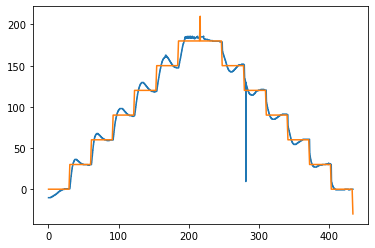

In [78]:
a=8400
ydata=df['angle']
ydata2=df['set_point']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
xdata=xdata[1:a]
pylab.plot(xdata, ydata, xdata, ydata2, label='data')

In [73]:
df[1:100]

,time,angle,pressure,set_point,motor_speed
1,0.09592960000009043,-7.37,0.14,0.00,37
2,0.2199064999986149,-7.37,0.14,0.00,38
3,0.2809815000000526,-7.37,0.36,0.00,39
4,0.32899079999879177,0.46,30,-7.37,0.00
5,0.37770029999956023,0.14,30,-7.37,0.00
...,...,...,...,...,...
95,4.903908099999171,-7.37,2.54,0.00,70
96,4.951695899999322,2.21,30,-7.37,0.00
97,4.997388499999943,-7.37,3.08,0.00,70
98,5.044033999998646,-7.37,2.54,0.00,70


In [69]:
pylab.plot(ydata, label='data')

Error in callback <function flush_figures at 0x000002099084F8B0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

#x = np.linspace(-1, 15, 50)
x=xdata
y = sigmoid(x, *popt)

pylab.plot(xdata, 27*ydata, 'o', label='data')
pylab.plot(x,27*y, label='fit')
#pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

In [ ]:
xdata = np.array([0.0,   1.0,  3.0, 4.3, 7.0,   8.0,   8.5, 10.0, 12.0])
ydata = np.array([0.01, 0.02, 0.04, 0.11, 0.43,  0.7, 0.89, 0.95, 0.99])

In [ ]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

#x = np.linspace(-1, 15, 50)
x=xdata
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

In [ ]:
i=0
j=0
degree=0
ser=star_communication('COM14')
bend_control(ser, 10)
values=feedback_data(ser)
to=time.perf_counter()
print('start')
with open("Dataset/dataset14.csv","a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','pressure','pressure_limit','angle','set_point','motor_speed'])
            
while (i<200):                      # Close loop controller
    j=j+1
    if j==400 and degree <= 180:
        degree=degree+30
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open("Dataset/dataset14.csv","a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

In [ ]:
with open(".csv","a") as f:
    df = pd.read_csv("Dataset/dataset11.csv",delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.05)
    filter_presure = signal.filtfilt(b, a, df['pressure'])
    df = df.assign(Filtered_pressure=filter_presure)
    f.close()

In [ ]:
ydata=df['Filtered_pressure']
xdata=df['angle']
zdata=df['set_point']
ydata=ydata
xdata=xdata
pylab.plot(xdata, label='data')

In [ ]:
#Working code

In [164]:
i=0
j=0
name="Dataset/New_ramp_Jonathan_dataset_30_1.csv"
steps=400
samples=7*steps
degree=0
ser=star_communication('COM14')
bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open(name,"a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])
            
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree+30
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


i=0
j=0
degree=180
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree-30
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

start
0 ['7.85' '0.36' '0.00' '0' '']
1 ['-11.60' '0.25' '0.00' '0' '']
2 ['-10.15' '0.25' '0.00' '117' '']
3 ['-10.13' '1.55' '0.00' '117' '']
4 ['-11.12' '2.65' '0.00' '113' '']
5 ['-9.84' '3.41' '0.00' '113' '']
6 ['-10.63' '5.04' '0.00' '113' '']
7 ['-10.63' '4.72' '0.00' '108' '']
8 ['-10.63' '4.50' '0.00' '108' '']
9 ['-11.46' '4.82' '0.00' '110' '']
10 ['-10.35' '4.82' '0.00' '110' '']
11 ['-10.34' '5.15' '0.00' '108' '']
12 ['-10.34' '6.02' '0.00' '108' '']
13 ['-10.34' '5.37' '0.00' '108' '']
14 ['-10.34' '5.70' '0.00' '109' '']
15 ['-9.45' '6.46' '0.00' '109' '']
16 ['-9.45' '5.48' '0.00' '102' '']
17 ['-9.45' '5.81' '0.00' '102' '']
18 ['-10.57' '5.15' '0.00' '102' '']
19 ['-10.57' '4.82' '0.00' '102' '']
20 ['-10.57' '5.15' '0.00' '115' '']
21 ['-9.80' '5.70' '0.00' '115' '']
22 ['-8.84' '5.26' '0.00' '108' '']
23 ['-8.84' '5.70' '0.00' '108' '']
24 ['-8.84' '5.26' '0.00' '99' '']
25 ['-8.84' '4.93' '0.00' '99' '']
26 ['-9.85' '4.61' '0.00' '100' '']
27 ['-9.85' '5.15' '0.0

228 ['-2.11' '5.48' '0.00' '95' '']
229 ['-3.01' '5.81' '0.00' '95' '']
230 ['-3.01' '6.46' '0.00' '104' '']
231 ['-3.01' '6.13' '0.00' '104' '']
232 ['-3.01' '6.13' '0.00' '104' '']
233 ['-3.01' '7.00' '0.00' '104' '']
234 ['-3.89' '6.46' '0.00' '104' '']
235 ['-2.10' '6.68' '0.00' '104' '']
236 ['-2.80' '6.46' '0.00' '104' '']
237 ['-4.12' '6.13' '0.00' '96' '']
238 ['-4.26' '6.24' '0.00' '96' '']
239 ['-2.75' '6.24' '0.00' '118' '']
240 ['-2.75' '6.79' '0.00' '118' '']
241 ['-3.62' '6.79' '0.00' '103' '']
242 ['-3.63' '6.46' '0.00' '103' '']
243 ['-4.64' '7.33' '0.00' '103' '']
244 ['-3.35' '6.68' '0.00' '112' '']
245 ['-3.19' '7.33' '0.00' '112' '']
246 ['-3.19' '7.00' '0.00' '108' '']
247 ['-3.19' '7.22' '0.00' '108' '']
248 ['-3.19' '6.68' '0.00' '108' '']
249 ['-3.19' '6.90' '0.00' '108' '']
250 ['-3.19' '6.79' '0.00' '109' '']
251 ['-3.96' '6.46' '0.00' '109' '']
252 ['-4.04' '7.00' '0.00' '117' '']
253 ['-4.04' '7.99' '0.00' '117' '']
254 ['-4.04' '7.11' '0.00' '118' '']
255 [

450 ['23.72' '16.49' '30.00' '221' '']
451 ['23.74' '17.14' '30.00' '221' '']
452 ['23.74' '16.92' '30.00' '209' '']
453 ['25.06' '16.49' '30.00' '209' '']
454 ['23.73' '16.81' '30.00' '209' '']
455 ['24.51' '17.14' '30.00' '209' '']
456 ['25.55' '16.81' '30.00' '209' '']
457 ['25.56' '17.14' '30.00' '192' '']
458 ['25.56' '18.01' '30.00' '192' '']
459 ['26.32' '18.01' '30.00' '192' '']
460 ['27.38' '18.34' '30.00' '192' '']
461 ['27.39' '17.14' '30.00' '174' '']
462 ['27.39' '16.92' '30.00' '174' '']
463 ['27.39' '18.45' '30.00' '174' '']
464 ['27.39' '17.03' '30.00' '174' '']
465 ['27.39' '17.47' '30.00' '175' '']
466 ['29.03' '17.03' '30.00' '175' '']
467 ['29.21' '17.25' '30.00' '156' '']
468 ['29.21' '16.92' '30.00' '156' '']
469 ['28.06' '17.03' '30.00' '168' '']
470 ['28.99' '16.92' '30.00' '168' '']
471 ['29.09' '17.47' '30.00' '158' '']
472 ['28.31' '17.03' '30.00' '158' '']
473 ['28.31' '17.03' '30.00' '166' '']
474 ['28.31' '17.25' '30.00' '166' '']
475 ['27.08' '16.81' '30.

661 ['29.55' '17.36' '30.00' '133' '']
662 ['30.58' '18.23' '30.00' '145' '']
663 ['29.71' '16.92' '30.00' '145' '']
664 ['28.73' '16.92' '30.00' '162' '']
665 ['28.73' '17.03' '30.00' '162' '']
666 ['28.73' '17.25' '30.00' '163' '']
667 ['29.53' '16.92' '30.00' '163' '']
668 ['29.53' '17.03' '30.00' '155' '']
669 ['28.57' '17.14' '30.00' '155' '']
670 ['29.43' '17.69' '30.00' '155' '']
671 ['29.52' '16.81' '30.00' '156' '']
672 ['29.52' '16.81' '30.00' '156' '']
673 ['29.52' '16.81' '30.00' '155' '']
674 ['29.52' '16.92' '30.00' '155' '']
675 ['29.52' '17.03' '30.00' '156' '']
676 ['29.52' '17.14' '30.00' '156' '']
677 ['31.09' '17.69' '30.00' '140' '']
678 ['29.33' '17.03' '30.00' '140' '']
679 ['30.28' '16.92' '30.00' '148' '']
680 ['30.29' '18.12' '30.00' '148' '']
681 ['30.29' '17.69' '30.00' '148' '']
682 ['29.36' '17.03' '30.00' '148' '']
683 ['30.20' '16.92' '30.00' '149' '']
684 ['30.20' '16.92' '30.00' '149' '']
685 ['30.20' '16.92' '30.00' '149' '']
686 ['30.97' '18.01' '30.

875 ['60.88' '19.76' '60.00' '185' '']
876 ['60.11' '19.65' '60.00' '192' '']
877 ['61.27' '19.76' '60.00' '192' '']
878 ['61.27' '19.76' '60.00' '181' '']
879 ['62.17' '19.32' '60.00' '181' '']
880 ['62.18' '20.30' '60.00' '171' '']
881 ['60.74' '19.65' '60.00' '171' '']
882 ['61.65' '19.98' '60.00' '187' '']
883 ['61.76' '21.28' '60.00' '187' '']
884 ['60.53' '19.76' '60.00' '188' '']
885 ['62.65' '19.65' '60.00' '188' '']
886 ['63.65' '19.65' '60.00' '188' '']
887 ['61.81' '19.21' '60.00' '173' '']
888 ['62.70' '19.76' '60.00' '173' '']
889 ['62.70' '19.54' '60.00' '166' '']
890 ['63.88' '19.76' '60.00' '166' '']
891 ['62.54' '20.96' '60.00' '153' '']
892 ['61.68' '19.76' '60.00' '153' '']
893 ['61.68' '20.19' '60.00' '175' '']
894 ['61.68' '19.76' '60.00' '175' '']
895 ['62.82' '19.54' '60.00' '164' '']
896 ['62.82' '19.65' '60.00' '164' '']
897 ['62.82' '19.76' '60.00' '163' '']
898 ['62.82' '19.98' '60.00' '163' '']
899 ['62.82' '19.65' '60.00' '163' '']
900 ['62.82' '19.76' '60.

1085 ['62.16' '19.65' '60.00' '151' '']
1086 ['62.16' '20.74' '60.00' '151' '']
1087 ['62.16' '19.54' '60.00' '151' '']
1088 ['62.16' '19.54' '60.00' '151' '']
1089 ['61.06' '19.65' '60.00' '151' '']
1090 ['61.06' '19.43' '60.00' '161' '']
1091 ['61.06' '19.43' '60.00' '161' '']
1092 ['61.76' '20.85' '60.00' '154' '']
1093 ['61.83' '19.65' '60.00' '154' '']
1094 ['61.83' '20.41' '60.00' '153' '']
1095 ['60.77' '19.65' '60.00' '153' '']
1096 ['60.76' '19.10' '60.00' '153' '']
1097 ['60.76' '20.85' '60.00' '164' '']
1098 ['60.76' '19.21' '60.00' '164' '']
1099 ['60.76' '19.43' '60.00' '164' '']
1100 ['60.76' '19.43' '60.00' '164' '']
1101 ['60.76' '19.76' '60.00' '164' '']
1102 ['60.76' '19.32' '60.00' '164' '']
1103 ['60.76' '19.54' '60.00' '164' '']
1104 ['60.76' '20.08' '60.00' '164' '']
1105 ['59.93' '19.87' '60.00' '164' '']
1106 ['60.71' '20.30' '60.00' '164' '']
1107 ['60.71' '19.32' '60.00' '164' '']
1108 ['60.71' '19.43' '60.00' '164' '']
1109 ['60.94' '19.54' '60.00' '164' '']


1293 ['93.97' '20.52' '90.00' '167' '']
1294 ['92.69' '20.41' '90.00' '167' '']
1295 ['92.69' '20.52' '90.00' '180' '']
1296 ['92.69' '20.30' '90.00' '180' '']
1297 ['92.69' '21.83' '90.00' '179' '']
1298 ['93.83' '20.52' '90.00' '179' '']
1299 ['92.35' '22.16' '90.00' '175' '']
1300 ['93.27' '20.41' '90.00' '175' '']
1301 ['93.38' '20.63' '90.00' '172' '']
1302 ['93.38' '20.52' '90.00' '172' '']
1303 ['93.38' '20.19' '90.00' '171' '']
1304 ['93.38' '20.74' '90.00' '171' '']
1305 ['94.35' '20.52' '90.00' '161' '']
1306 ['94.35' '20.63' '90.00' '161' '']
1307 ['94.35' '20.85' '90.00' '161' '']
1308 ['94.35' '21.50' '90.00' '161' '']
1309 ['94.35' '20.41' '90.00' '160' '']
1310 ['93.10' '20.52' '90.00' '160' '']
1311 ['93.10' '20.52' '90.00' '173' '']
1312 ['92.64' '20.52' '90.00' '177' '']
1313 ['93.57' '20.19' '90.00' '177' '']
1314 ['92.78' '20.52' '90.00' '175' '']
1315 ['94.73' '21.17' '90.00' '175' '']
1316 ['93.91' '20.52' '90.00' '164' '']
1317 ['93.90' '20.74' '90.00' '164' '']


1500 ['91.36' '20.41' '90.00' '166' '']
1501 ['90.27' '20.30' '90.00' '166' '']
1502 ['90.27' '20.85' '90.00' '177' '']
1503 ['91.42' '20.30' '90.00' '177' '']
1504 ['92.27' '20.74' '90.00' '157' '']
1505 ['90.97' '20.30' '90.00' '157' '']
1506 ['91.93' '20.19' '90.00' '160' '']
1507 ['91.13' '20.41' '90.00' '160' '']
1508 ['91.13' '20.52' '90.00' '160' '']
1509 ['91.13' '20.52' '90.00' '168' '']
1510 ['91.13' '19.98' '90.00' '168' '']
1511 ['91.13' '20.41' '90.00' '168' '']
1512 ['91.13' '20.52' '90.00' '168' '']
1513 ['91.13' '20.41' '90.00' '168' '']
1514 ['91.13' '20.63' '90.00' '168' '']
1515 ['91.98' '20.08' '90.00' '159' '']
1516 ['91.99' '20.41' '90.00' '159' '']
1517 ['90.86' '20.30' '90.00' '170' '']
1518 ['92.17' '20.30' '90.00' '170' '']
1519 ['92.17' '20.30' '90.00' '157' '']
1520 ['93.19' '20.63' '90.00' '157' '']
1521 ['93.19' '20.85' '90.00' '146' '']
1522 ['92.40' '21.28' '90.00' '146' '']
1523 ['91.57' '21.61' '90.00' '162' '']
1524 ['92.43' '21.83' '90.00' '162' '']


1705 ['124.44' '20.08' '120.00' '173' '']
1706 ['124.44' '20.63' '120.00' '173' '']
1707 ['124.44' '20.52' '120.00' '172' '']
1708 ['124.44' '22.05' '120.00' '172' '']
1709 ['124.44' '20.41' '120.00' '172' '']
1710 ['123.42' '21.72' '120.00' '181' '']
1711 ['123.42' '20.52' '120.00' '181' '']
1712 ['124.55' '20.52' '120.00' '182' '']
1713 ['122.94' '20.52' '120.00' '182' '']
1714 ['123.67' '21.72' '120.00' '187' '']
1715 ['125.04' '20.52' '120.00' '187' '']
1716 ['124.25' '20.41' '120.00' '173' '']
1717 ['124.24' '20.08' '120.00' '173' '']
1718 ['125.60' '21.72' '120.00' '173' '']
1719 ['125.62' '20.30' '120.00' '159' '']
1720 ['125.62' '20.41' '120.00' '159' '']
1721 ['125.62' '20.52' '120.00' '158' '']
1722 ['125.62' '21.61' '120.00' '158' '']
1723 ['124.82' '20.30' '120.00' '165' '']
1724 ['125.80' '20.52' '120.00' '165' '']
1725 ['124.46' '20.41' '120.00' '169' '']
1726 ['123.51' '21.61' '120.00' '169' '']
1727 ['124.39' '20.52' '120.00' '169' '']
1728 ['124.39' '20.52' '120.00' '1

1904 ['120.94' '20.19' '120.00' '173' '']
1905 ['122.08' '20.30' '120.00' '173' '']
1906 ['122.08' '21.61' '120.00' '162' '']
1907 ['122.08' '19.98' '120.00' '162' '']
1908 ['122.08' '20.30' '120.00' '162' '']
1909 ['122.08' '21.83' '120.00' '162' '']
1910 ['122.08' '19.98' '120.00' '162' '']
1911 ['122.08' '19.98' '120.00' '162' '']
1912 ['122.79' '20.30' '120.00' '162' '']
1913 ['123.65' '20.30' '120.00' '162' '']
1914 ['122.81' '20.63' '120.00' '153' '']
1915 ['121.77' '19.87' '120.00' '153' '']
1916 ['124.35' '20.30' '120.00' '153' '']
1917 ['123.02' '20.30' '120.00' '138' '']
1918 ['123.01' '20.41' '120.00' '138' '']
1919 ['122.22' '20.41' '120.00' '151' '']
1920 ['121.49' '20.52' '120.00' '151' '']
1921 ['120.35' '21.72' '120.00' '167' '']
1922 ['120.23' '20.30' '120.00' '167' '']
1923 ['121.54' '20.30' '120.00' '166' '']
1924 ['121.55' '21.17' '120.00' '166' '']
1925 ['121.55' '20.30' '120.00' '166' '']
1926 ['122.40' '20.30' '120.00' '158' '']
1927 ['123.40' '21.50' '120.00' '1

2101 ['153.41' '20.30' '150.00' '213' '']
2102 ['153.41' '21.72' '150.00' '197' '']
2103 ['153.41' '20.63' '150.00' '197' '']
2104 ['153.41' '20.41' '150.00' '197' '']
2105 ['152.66' '19.87' '150.00' '197' '']
2106 ['152.58' '20.19' '150.00' '205' '']
2107 ['153.55' '20.30' '150.00' '205' '']
2108 ['152.60' '21.72' '150.00' '205' '']
2109 ['154.14' '19.98' '150.00' '205' '']
2110 ['153.16' '20.30' '150.00' '198' '']
2111 ['153.15' '20.41' '150.00' '198' '']
2112 ['154.20' '21.72' '150.00' '188' '']
2113 ['155.17' '20.30' '150.00' '188' '']
2114 ['155.96' '20.30' '150.00' '170' '']
2115 ['155.97' '20.08' '150.00' '170' '']
2116 ['155.97' '20.30' '150.00' '169' '']
2117 ['155.97' '21.83' '150.00' '168' '']
2118 ['154.63' '20.08' '150.00' '168' '']
2119 ['156.06' '20.30' '150.00' '168' '']
2120 ['154.39' '21.72' '150.00' '166' '']
2121 ['154.37' '20.08' '150.00' '166' '']
2122 ['155.52' '20.52' '150.00' '173' '']
2123 ['155.52' '20.30' '150.00' '173' '']
2124 ['155.52' '20.74' '150.00' '1

2301 ['154.59' '19.98' '150.00' '143' '']
2302 ['154.61' '19.87' '150.00' '143' '']
2303 ['152.94' '20.08' '150.00' '143' '']
2304 ['153.73' '20.19' '150.00' '152' '']
2305 ['152.69' '20.08' '150.00' '161' '']
2306 ['152.69' '20.41' '150.00' '161' '']
2307 ['152.71' '20.19' '150.00' '151' '']
2308 ['153.75' '20.30' '150.00' '151' '']
2309 ['153.78' '20.74' '150.00' '150' '']
2310 ['152.39' '20.19' '150.00' '150' '']
2311 ['153.70' '20.19' '150.00' '150' '']
2312 ['153.71' '20.19' '150.00' '150' '']
2313 ['152.91' '20.19' '150.00' '150' '']
2314 ['152.91' '20.85' '150.00' '158' '']
2315 ['152.91' '20.52' '150.00' '158' '']
2316 ['152.91' '20.30' '150.00' '157' '']
2317 ['152.91' '19.87' '150.00' '157' '']
2318 ['151.52' '19.98' '150.00' '171' '']
2319 ['152.73' '20.19' '150.00' '171' '']
2320 ['152.73' '21.17' '150.00' '159' '']
2321 ['153.62' '20.30' '150.00' '159' '']
2322 ['153.62' '19.98' '150.00' '149' '']
2323 ['153.62' '19.98' '150.00' '149' '']
2324 ['153.62' '20.08' '150.00' '1

2497 ['182.18' '20.41' '180.00' '224' '']
2498 ['182.18' '20.41' '180.00' '216' '']
2499 ['183.49' '20.08' '180.00' '216' '']
2500 ['183.51' '20.96' '180.00' '216' '']
2501 ['182.52' '19.98' '180.00' '202' '']
2502 ['184.61' '20.41' '180.00' '202' '']
2503 ['184.62' '20.52' '180.00' '191' '']
2504 ['182.83' '20.41' '180.00' '191' '']
2505 ['183.91' '21.83' '180.00' '208' '']
2506 ['182.95' '20.08' '180.00' '208' '']
2507 ['182.84' '21.94' '180.00' '208' '']
2508 ['183.85' '20.08' '180.00' '197' '']
2509 ['183.85' '20.52' '180.00' '197' '']
2510 ['183.85' '20.30' '180.00' '197' '']
2511 ['184.66' '20.52' '180.00' '197' '']
2512 ['184.66' '20.41' '180.00' '188' '']
2513 ['183.53' '20.41' '180.00' '188' '']
2514 ['184.31' '20.30' '180.00' '191' '']
2515 ['184.31' '20.41' '180.00' '191' '']
2516 ['185.31' '18.01' '180.00' '191' '']
2517 ['185.42' '20.52' '180.00' '180' '']
2518 ['183.62' '20.52' '180.00' '180' '']
2519 ['182.57' '20.30' '180.00' '198' '']
2520 ['182.57' '20.41' '180.00' '1

2693 ['186.86' '20.30' '180.00' '110' '']
2694 ['185.95' '20.41' '180.00' '110' '']
2695 ['185.95' '20.41' '180.00' '119' '']
2696 ['185.95' '20.41' '180.00' '119' '']
2697 ['185.95' '20.52' '180.00' '118' '']
2698 ['185.95' '20.41' '180.00' '118' '']
2699 ['185.95' '20.41' '180.00' '118' '']
2700 ['185.95' '20.41' '180.00' '117' '']
2701 ['186.73' '20.41' '180.00' '117' '']
2702 ['186.73' '20.41' '180.00' '108' '']
2703 ['186.73' '20.41' '180.00' '108' '']
2704 ['186.73' '20.41' '180.00' '108' '']
2705 ['185.86' '20.41' '180.00' '108' '']
2706 ['185.85' '20.41' '180.00' '116' '']
2707 ['187.62' '20.41' '180.00' '116' '']
2708 ['187.63' '20.41' '180.00' '97' '']
2709 ['185.48' '20.30' '180.00' '97' '']
2710 ['185.48' '20.41' '180.00' '97' '']
2711 ['186.50' '20.41' '180.00' '118' '']
2712 ['186.50' '20.41' '180.00' '118' '']
2713 ['185.33' '20.41' '180.00' '107' '']
2714 ['186.30' '20.30' '180.00' '107' '']
2715 ['186.30' '20.41' '180.00' '109' '']
2716 ['186.30' '20.41' '180.00' '109'

96 ['180.18' '20.30' '180.00' '173' '']
97 ['180.28' '19.87' '180.00' '173' '']
98 ['180.28' '20.19' '180.00' '163' '']
99 ['180.28' '20.52' '180.00' '163' '']
100 ['180.28' '20.74' '180.00' '163' '']
101 ['180.28' '20.08' '180.00' '163' '']
102 ['180.28' '20.19' '180.00' '163' '']
103 ['180.28' '20.52' '180.00' '163' '']
104 ['181.22' '20.19' '180.00' '154' '']
105 ['181.23' '20.08' '180.00' '154' '']
106 ['181.23' '19.98' '180.00' '153' '']
107 ['180.33' '19.98' '180.00' '153' '']
108 ['179.51' '19.87' '180.00' '171' '']
109 ['180.80' '20.08' '180.00' '171' '']
110 ['180.81' '20.19' '180.00' '158' '']
111 ['179.85' '20.08' '180.00' '158' '']
112 ['181.89' '20.19' '180.00' '159' '']
113 ['180.74' '21.39' '180.00' '159' '']
114 ['180.73' '21.28' '180.00' '158' '']
115 ['180.73' '21.28' '180.00' '158' '']
116 ['180.73' '19.87' '180.00' '158' '']
117 ['182.49' '20.19' '180.00' '158' '']
118 ['181.51' '19.98' '180.00' '150' '']
119 ['180.58' '19.76' '180.00' '150' '']
120 ['180.58' '19.87

299 ['179.68' '20.19' '180.00' '157' '']
300 ['179.68' '20.30' '180.00' '167' '']
301 ['179.68' '20.41' '180.00' '167' '']
302 ['179.68' '20.19' '180.00' '167' '']
303 ['179.68' '21.28' '180.00' '167' '']
304 ['180.61' '20.08' '180.00' '158' '']
305 ['179.83' '20.08' '180.00' '158' '']
306 ['180.61' '20.19' '180.00' '158' '']
307 ['179.42' '21.17' '180.00' '158' '']
308 ['180.66' '19.98' '180.00' '158' '']
309 ['180.49' '20.30' '180.00' '148' '']
310 ['180.36' '20.19' '180.00' '148' '']
311 ['180.36' '20.08' '180.00' '160' '']
312 ['180.36' '20.19' '180.00' '160' '']
313 ['179.50' '20.63' '180.00' '160' '']
314 ['179.50' '19.98' '180.00' '160' '']
315 ['179.50' '19.87' '180.00' '169' '']
316 ['179.50' '20.30' '180.00' '169' '']
317 ['179.50' '19.76' '180.00' '169' '']
318 ['179.50' '20.08' '180.00' '169' '']
319 ['180.57' '20.52' '180.00' '158' '']
320 ['180.57' '19.98' '180.00' '158' '']
321 ['180.57' '20.08' '180.00' '158' '']
322 ['179.72' '20.08' '180.00' '166' '']
323 ['179.72' '2

500 ['147.72' '19.76' '150.00' '161' '']
501 ['147.81' '19.76' '150.00' '152' '']
502 ['146.84' '19.65' '150.00' '152' '']
503 ['146.84' '19.76' '150.00' '162' '']
504 ['148.02' '19.65' '150.00' '162' '']
505 ['148.02' '20.52' '150.00' '150' '']
506 ['148.02' '19.76' '150.00' '150' '']
507 ['148.02' '19.65' '150.00' '150' '']
508 ['148.02' '19.43' '150.00' '151' '']
509 ['148.02' '20.19' '150.00' '151' '']
510 ['147.19' '19.87' '150.00' '151' '']
511 ['147.19' '19.76' '150.00' '151' '']
512 ['146.33' '20.85' '150.00' '167' '']
513 ['146.33' '19.65' '150.00' '167' '']
514 ['146.33' '19.87' '150.00' '169' '']
515 ['147.49' '19.43' '150.00' '169' '']
516 ['146.64' '19.87' '150.00' '166' '']
517 ['146.64' '20.52' '150.00' '166' '']
518 ['146.64' '19.76' '150.00' '166' '']
519 ['147.99' '19.76' '150.00' '166' '']
520 ['147.16' '20.74' '150.00' '161' '']
521 ['147.16' '19.43' '150.00' '161' '']
522 ['147.16' '19.76' '150.00' '161' '']
523 ['147.16' '21.07' '150.00' '162' '']
524 ['147.16' '1

703 ['148.33' '19.54' '150.00' '168' '']
704 ['148.33' '19.76' '150.00' '168' '']
705 ['148.33' '19.98' '150.00' '168' '']
706 ['148.33' '20.08' '150.00' '168' '']
707 ['148.33' '19.76' '150.00' '168' '']
708 ['147.54' '19.87' '150.00' '168' '']
709 ['147.54' '19.54' '150.00' '176' '']
710 ['148.38' '19.87' '150.00' '176' '']
711 ['148.38' '19.76' '150.00' '168' '']
712 ['148.38' '20.08' '150.00' '168' '']
713 ['148.38' '21.07' '150.00' '168' '']
714 ['148.38' '19.76' '150.00' '168' '']
715 ['148.38' '20.08' '150.00' '169' '']
716 ['148.38' '19.54' '150.00' '169' '']
717 ['149.13' '19.87' '150.00' '161' '']
718 ['150.11' '20.96' '150.00' '161' '']
719 ['149.27' '19.54' '150.00' '161' '']
720 ['150.92' '19.87' '150.00' '160' '']
721 ['150.18' '20.08' '150.00' '160' '']
722 ['150.77' '20.08' '150.00' '151' '']
723 ['150.85' '21.17' '150.00' '151' '']
724 ['149.65' '20.41' '150.00' '156' '']
725 ['149.65' '19.65' '150.00' '156' '']
726 ['149.65' '19.76' '150.00' '156' '']
727 ['149.65' '1

906 ['116.59' '19.76' '120.00' '165' '']
907 ['116.59' '19.76' '120.00' '165' '']
908 ['116.59' '19.98' '120.00' '165' '']
909 ['115.69' '19.65' '120.00' '165' '']
910 ['116.43' '19.76' '120.00' '165' '']
911 ['116.44' '20.96' '120.00' '167' '']
912 ['116.44' '19.76' '120.00' '167' '']
913 ['116.44' '19.65' '120.00' '167' '']
914 ['116.44' '21.28' '120.00' '167' '']
915 ['116.44' '19.65' '120.00' '168' '']
916 ['117.27' '19.65' '120.00' '168' '']
917 ['117.27' '19.87' '120.00' '160' '']
918 ['117.27' '19.87' '120.00' '160' '']
919 ['117.27' '19.65' '120.00' '160' '']
920 ['116.45' '19.65' '120.00' '160' '']
921 ['116.44' '19.87' '120.00' '169' '']
922 ['115.45' '19.43' '120.00' '169' '']
923 ['115.45' '19.87' '120.00' '169' '']
924 ['116.57' '19.43' '120.00' '179' '']
925 ['115.29' '19.76' '120.00' '179' '']
926 ['116.26' '19.43' '120.00' '172' '']
927 ['117.22' '21.17' '120.00' '172' '']
928 ['115.04' '19.65' '120.00' '174' '']
929 ['115.03' '19.98' '120.00' '174' '']
930 ['115.03' '1

1105 ['118.83' '20.63' '120.00' '169' '']
1106 ['118.83' '19.65' '120.00' '169' '']
1107 ['117.81' '19.76' '120.00' '161' '']
1108 ['117.69' '20.85' '120.00' '161' '']
1109 ['116.93' '19.76' '120.00' '180' '']
1110 ['116.93' '20.08' '120.00' '180' '']
1111 ['118.12' '19.98' '120.00' '181' '']
1112 ['120.45' '19.76' '120.00' '181' '']
1113 ['118.29' '19.76' '120.00' '166' '']
1114 ['118.27' '19.87' '120.00' '166' '']
1115 ['117.27' '19.87' '120.00' '166' '']
1116 ['119.50' '19.65' '120.00' '164' '']
1117 ['118.80' '19.76' '120.00' '164' '']
1118 ['117.82' '20.30' '120.00' '163' '']
1119 ['117.72' '19.76' '120.00' '163' '']
1120 ['119.31' '19.87' '120.00' '165' '']
1121 ['120.18' '20.30' '120.00' '165' '']
1122 ['118.73' '19.43' '120.00' '162' '']
1123 ['118.72' '19.76' '120.00' '162' '']
1124 ['117.80' '21.17' '120.00' '162' '']
1125 ['116.88' '20.08' '120.00' '173' '']
1126 ['117.75' '19.76' '120.00' '174' '']
1127 ['117.75' '19.76' '120.00' '174' '']
1128 ['118.49' '19.87' '120.00' '1

1307 ['88.05' '19.76' '90.00' '152' '']
1308 ['89.31' '19.43' '90.00' '153' '']
1309 ['88.16' '19.76' '90.00' '153' '']
1310 ['88.15' '19.76' '90.00' '165' '']
1311 ['88.98' '19.98' '90.00' '165' '']
1312 ['88.98' '21.28' '90.00' '165' '']
1313 ['88.12' '19.76' '90.00' '156' '']
1314 ['88.12' '19.76' '90.00' '156' '']
1315 ['88.99' '19.87' '90.00' '157' '']
1316 ['88.99' '19.98' '90.00' '157' '']
1317 ['87.79' '19.87' '90.00' '168' '']
1318 ['87.79' '20.08' '90.00' '168' '']
1319 ['87.79' '19.76' '90.00' '169' '']
1320 ['88.54' '21.07' '90.00' '169' '']
1321 ['87.73' '19.54' '90.00' '169' '']
1322 ['87.73' '19.98' '90.00' '170' '']
1323 ['87.73' '19.43' '90.00' '170' '']
1324 ['88.52' '19.87' '90.00' '162' '']
1325 ['87.37' '19.76' '90.00' '162' '']
1326 ['87.24' '20.08' '90.00' '175' '']
1327 ['88.00' '19.87' '90.00' '175' '']
1328 ['88.00' '19.43' '90.00' '167' '']
1329 ['88.76' '19.87' '90.00' '167' '']
1330 ['86.94' '20.85' '90.00' '178' '']
1331 ['88.41' '19.87' '90.00' '178' '']


1513 ['89.53' '21.39' '90.00' '160' '']
1514 ['89.53' '20.19' '90.00' '160' '']
1515 ['89.53' '19.76' '90.00' '160' '']
1516 ['89.53' '19.87' '90.00' '160' '']
1517 ['88.40' '19.87' '90.00' '160' '']
1518 ['88.39' '20.96' '90.00' '171' '']
1519 ['88.39' '19.65' '90.00' '171' '']
1520 ['89.29' '19.98' '90.00' '172' '']
1521 ['88.50' '19.76' '90.00' '172' '']
1522 ['88.49' '19.87' '90.00' '171' '']
1523 ['88.49' '20.19' '90.00' '171' '']
1524 ['89.57' '19.65' '90.00' '171' '']
1525 ['90.62' '20.19' '90.00' '171' '']
1526 ['88.72' '20.85' '90.00' '150' '']
1527 ['88.64' '19.87' '90.00' '150' '']
1528 ['88.64' '21.39' '90.00' '169' '']
1529 ['88.69' '19.76' '90.00' '160' '']
1530 ['88.69' '19.87' '90.00' '169' '']
1531 ['88.69' '20.08' '90.00' '169' '']
1532 ['88.69' '19.65' '90.00' '169' '']
1533 ['88.69' '20.08' '90.00' '169' '']
1534 ['88.69' '19.54' '90.00' '169' '']
1535 ['88.69' '19.87' '90.00' '169' '']
1536 ['89.88' '19.87' '90.00' '158' '']
1537 ['89.88' '20.08' '90.00' '158' '']


1722 ['59.63' '20.74' '60.00' '167' '']
1723 ['59.64' '19.10' '60.00' '167' '']
1724 ['59.64' '19.21' '60.00' '154' '']
1725 ['59.64' '18.99' '60.00' '154' '']
1726 ['58.11' '19.10' '60.00' '161' '']
1727 ['58.11' '19.32' '60.00' '161' '']
1728 ['58.80' '20.74' '60.00' '170' '']
1729 ['58.87' '19.10' '60.00' '170' '']
1730 ['58.87' '20.63' '60.00' '162' '']
1731 ['58.87' '18.78' '60.00' '162' '']
1732 ['58.87' '19.21' '60.00' '162' '']
1733 ['58.87' '19.21' '60.00' '162' '']
1734 ['58.87' '19.98' '60.00' '162' '']
1735 ['58.80' '18.89' '60.00' '170' '']
1736 ['58.87' '19.21' '60.00' '170' '']
1737 ['60.11' '20.19' '60.00' '163' '']
1738 ['60.13' '19.10' '60.00' '163' '']
1739 ['60.13' '19.10' '60.00' '150' '']
1740 ['60.13' '19.21' '60.00' '150' '']
1741 ['60.13' '19.32' '60.00' '150' '']
1742 ['60.13' '19.21' '60.00' '150' '']
1743 ['60.82' '19.21' '60.00' '150' '']
1744 ['61.67' '19.21' '60.00' '142' '']
1745 ['61.75' '19.10' '60.00' '142' '']
1746 ['60.99' '19.10' '60.00' '141' '']


1930 ['58.19' '19.10' '60.00' '172' '']
1931 ['58.25' '19.54' '60.00' '164' '']
1932 ['59.89' '19.98' '60.00' '164' '']
1933 ['59.06' '19.32' '60.00' '155' '']
1934 ['58.96' '19.76' '60.00' '155' '']
1935 ['58.96' '18.78' '60.00' '165' '']
1936 ['58.96' '19.21' '60.00' '165' '']
1937 ['58.96' '19.21' '60.00' '165' '']
1938 ['60.59' '19.43' '60.00' '165' '']
1939 ['59.45' '19.98' '60.00' '160' '']
1940 ['60.37' '18.99' '60.00' '160' '']
1941 ['59.40' '19.10' '60.00' '151' '']
1942 ['59.29' '19.10' '60.00' '151' '']
1943 ['59.29' '18.99' '60.00' '162' '']
1944 ['60.23' '19.10' '60.00' '162' '']
1945 ['59.44' '19.21' '60.00' '160' '']
1946 ['59.35' '19.43' '60.00' '160' '']
1947 ['59.35' '19.10' '60.00' '160' '']
1948 ['60.37' '19.21' '60.00' '161' '']
1949 ['59.61' '20.30' '60.00' '161' '']
1950 ['59.60' '18.89' '60.00' '159' '']
1951 ['61.26' '19.21' '60.00' '159' '']
1952 ['61.26' '18.89' '60.00' '142' '']
1953 ['60.43' '19.43' '60.00' '142' '']
1954 ['60.43' '19.10' '60.00' '150' '']


2138 ['29.95' '17.14' '30.00' '155' '']
2139 ['30.06' '17.36' '30.00' '155' '']
2140 ['30.06' '17.14' '30.00' '144' '']
2141 ['30.85' '17.14' '30.00' '144' '']
2142 ['29.57' '17.03' '30.00' '149' '']
2143 ['29.57' '17.03' '30.00' '149' '']
2144 ['28.80' '18.45' '30.00' '157' '']
2145 ['27.88' '17.58' '30.00' '157' '']
2146 ['29.21' '17.47' '30.00' '153' '']
2147 ['29.21' '16.92' '30.00' '153' '']
2148 ['29.21' '17.03' '30.00' '153' '']
2149 ['29.21' '17.14' '30.00' '153' '']
2150 ['29.21' '17.14' '30.00' '153' '']
2151 ['28.39' '17.14' '30.00' '153' '']
2152 ['29.16' '17.25' '30.00' '153' '']
2153 ['27.97' '17.14' '30.00' '153' '']
2154 ['29.11' '17.14' '30.00' '155' '']
2155 ['27.43' '17.14' '30.00' '155' '']
2156 ['29.50' '17.14' '30.00' '150' '']
2157 ['28.65' '17.25' '30.00' '150' '']
2158 ['28.55' '17.14' '30.00' '150' '']
2159 ['30.82' '17.14' '30.00' '160' '']
2160 ['29.84' '17.25' '30.00' '160' '']
2161 ['30.33' '18.56' '30.00' '147' '']
2162 ['28.74' '18.34' '30.00' '147' '']


2346 ['30.06' '18.56' '30.00' '147' '']
2347 ['31.19' '18.23' '30.00' '147' '']
2348 ['31.19' '18.01' '30.00' '147' '']
2349 ['31.19' '17.36' '30.00' '136' '']
2350 ['31.19' '17.25' '30.00' '136' '']
2351 ['30.33' '17.25' '30.00' '144' '']
2352 ['30.33' '17.25' '30.00' '144' '']
2353 ['30.33' '17.25' '30.00' '144' '']
2354 ['30.33' '17.47' '30.00' '144' '']
2355 ['31.27' '17.69' '30.00' '144' '']
2356 ['29.74' '18.34' '30.00' '144' '']
2357 ['28.80' '17.69' '30.00' '159' '']
2358 ['28.80' '17.58' '30.00' '159' '']
2359 ['28.80' '17.25' '30.00' '160' '']
2360 ['29.72' '17.36' '30.00' '160' '']
2361 ['30.93' '17.90' '30.00' '150' '']
2362 ['30.20' '17.80' '30.00' '150' '']
2363 ['30.19' '18.56' '30.00' '146' '']
2364 ['30.19' '18.67' '30.00' '146' '']
2365 ['28.81' '17.25' '30.00' '160' '']
2366 ['30.24' '17.25' '30.00' '160' '']
2367 ['31.36' '17.25' '30.00' '134' '']
2368 ['30.50' '17.36' '30.00' '134' '']
2369 ['30.50' '17.25' '30.00' '143' '']
2370 ['30.50' '17.25' '30.00' '143' '']


2560 ['1.16' '11.80' '0.00' '115' '']
2561 ['1.16' '11.69' '0.00' '115' '']
2562 ['1.16' '12.67' '0.00' '115' '']
2563 ['1.16' '11.80' '0.00' '115' '']
2564 ['1.16' '11.69' '0.00' '115' '']
2565 ['1.16' '11.80' '0.00' '115' '']
2566 ['1.16' '11.91' '0.00' '115' '']
2567 ['-0.07' '11.69' '0.00' '115' '']
2568 ['-0.07' '12.56' '0.00' '127' '']
2569 ['-0.07' '11.69' '0.00' '127' '']
2570 ['1.55' '12.46' '0.00' '127' '']
2571 ['1.55' '11.69' '0.00' '127' '']
2572 ['1.55' '12.56' '0.00' '111' '']
2573 ['1.55' '11.80' '0.00' '111' '']
2574 ['1.55' '11.80' '0.00' '111' '']
2575 ['1.55' '11.69' '0.00' '111' '']
2576 ['0.58' '11.58' '0.00' '121' '']
2577 ['0.47' '12.13' '0.00' '121' '']
2578 ['0.47' '11.69' '0.00' '122' '']
2579 ['0.47' '11.69' '0.00' '122' '']
2580 ['-0.53' '12.56' '0.00' '122' '']
2581 ['-0.64' '11.69' '0.00' '133' '']
2582 ['0.16' '12.56' '0.00' '133' '']
2583 ['0.16' '11.69' '0.00' '125' '']
2584 ['-0.66' '11.69' '0.00' '125' '']
2585 ['-0.66' '11.58' '0.00' '133' '']
2586 

2776 ['0.03' '11.15' '0.00' '123' '']
2777 ['-2.16' '11.47' '0.00' '123' '']
2778 ['-1.41' '11.15' '0.00' '145' '']
2779 ['0.86' '11.26' '0.00' '145' '']
2780 ['0.96' '11.26' '0.00' '114' '']
2781 ['0.96' '11.69' '0.00' '114' '']
2782 ['0.96' '11.26' '0.00' '114' '']
2783 ['0.96' '11.26' '0.00' '114' '']
2784 ['-0.27' '11.36' '0.00' '126' '']
2785 ['-1.32' '11.26' '0.00' '126' '']
2786 ['-0.49' '11.91' '0.00' '126' '']
2787 ['-1.69' '12.02' '0.00' '128' '']
2788 ['0.01' '11.15' '0.00' '128' '']
2789 ['0.14' '12.02' '0.00' '115' '']
2790 ['0.13' '11.26' '0.00' '115' '']
2791 ['1.05' '11.26' '0.00' '122' '']
2792 ['-0.95' '11.26' '0.00' '122' '']
2793 ['-0.15' '12.24' '0.00' '134' '']
2794 ['-0.05' '11.36' '0.00' '134' '']
2795 ['-1.45' '11.47' '0.00' '138' '']
2796 ['-1.45' '11.69' '0.00' '138' '']
2797 ['0.89' '11.47' '0.00' '115' '']
2798 ['1.87' '12.13' '0.00' '115' '']
2799 ['-0.84' '11.15' '-30.00' '121' '']
m1

m-10



In [166]:
name="Dataset/New_ramp_Jonathan_dataset_30_1.csv"
with open(".csv","a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.05)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

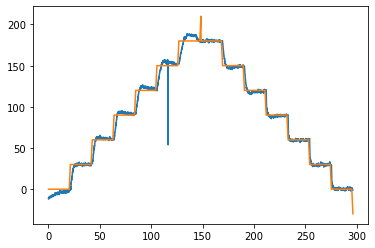

In [167]:
a=2*samples
ydata=df['angle']
ydata2=df['set_point']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
xdata=xdata[1:a]
pylab.plot(xdata, ydata, xdata, ydata2, label='data')

In [169]:
i=0
j=0
filename="New_Ramp_dataset_10_17"
name="Dataset/"+filename+".csv"
steps=400
samples=16*steps

factor=10
max_value=150
min_value=0

ser=star_communication('COM14')
time.sleep(5)
calibrate_zero(ser)
time.sleep(0.02)
calibrate_zero(ser)

bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open(name,"a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])

degree=min_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree+factor
        if degree > max_value:
            degree=max_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


i=0
j=0
degree=max_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree-factor
        if degree < min_value:
            degree=min_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

l0

l0

start
0 ['0.60' '0.14' '0.00' '26' '']
1 ['0.61' '0.14' '0.00' '18' '']
2 ['1.77' '0.14' '0.00' '18' '']
3 ['0.96' '0.14' '0.00' '14' '']
4 ['0.87' '0.14' '0.00' '14' '']
5 ['0.03' '0.25' '0.00' '14' '']
6 ['0.02' '0.14' '0.00' '24' '']
7 ['0.90' '0.14' '0.00' '24' '']
8 ['-0.60' '0.03' '0.00' '29' '']
9 ['0.48' '0.14' '0.00' '29' '']
10 ['0.48' '0.14' '0.00' '19' '']
11 ['0.48' '0.14' '0.00' '19' '']
12 ['-0.89' '0.14' '0.00' '19' '']
13 ['-1.04' '0.03' '0.00' '19' '']
14 ['-0.13' '0.14' '0.00' '25' '']
15 ['-0.13' '0.25' '0.00' '25' '']
16 ['-0.13' '0.25' '0.00' '25' '']
17 ['-0.13' '0.25' '0.00' '25' '']
18 ['-0.13' '0.25' '0.00' '25' '']
19 ['-0.13' '0.14' '0.00' '25' '']
20 ['-0.92' '0.14' '0.00' '25' '']
21 ['1.14' '0.14' '0.00' '22' '']
22 ['1.23' '0.14' '0.00' '22' '']
23 ['0.14' '0.25' '0.00' '22' '']
24 ['1.06' '0.14' '0.00' '22' '']
25 ['0.19' '0.14' '0.00' '12' '']
26 ['0.19' '0.14' '0.00' '12' '']
27 ['0.19' '0.14' '0.00' '22' '']
28 ['1.03' '0.14' '0.00' '22' '']


239 ['0.82' '0.14' '0.00' '9' '']
240 ['1.64' '0.14' '0.00' '9' '']
241 ['1.65' '0.14' '0.00' '0' '']
242 ['0.84' '0.14' '0.00' '0' '']
243 ['0.04' '0.25' '0.00' '16' '']
244 ['0.97' '0.14' '0.00' '16' '']
245 ['1.07' '0.25' '0.00' '16' '']
246 ['0.12' '0.14' '0.00' '6' '']
247 ['1.30' '0.14' '0.00' '6' '']
248 ['0.58' '0.14' '0.00' '3' '']
249 ['-0.27' '0.14' '0.00' '3' '']
250 ['-0.35' '0.25' '0.00' '20' '']
251 ['-1.15' '0.14' '0.00' '20' '']
252 ['-1.15' '0.14' '0.00' '28' '']
253 ['-0.27' '0.14' '0.00' '28' '']
254 ['1.19' '0.14' '0.00' '18' '']
255 ['1.35' '0.25' '0.00' '18' '']
256 ['1.35' '0.14' '0.00' '3' '']
257 ['1.35' '0.25' '0.00' '3' '']
258 ['0.59' '0.14' '0.00' '3' '']
259 ['0.58' '0.14' '0.00' '10' '']
260 ['-0.35' '0.14' '0.00' '10' '']
261 ['-1.58' '0.14' '0.00' '20' '']
262 ['-1.72' '0.14' '0.00' '20' '']
263 ['-1.72' '0.14' '0.00' '34' '']
264 ['-0.84' '0.14' '0.00' '34' '']
265 ['-0.84' '0.25' '0.00' '25' '']
266 ['0.38' '0.14' '0.00' '25' '']
267 ['0.39' '0.14' '

473 ['1.09' '7.22' '10.00' '118' '']
474 ['1.09' '6.35' '10.00' '118' '']
475 ['2.91' '7.11' '10.00' '118' '']
476 ['3.95' '6.68' '10.00' '118' '']
477 ['0.27' '6.57' '10.00' '117' '']
478 ['3.33' '6.35' '10.00' '117' '']
479 ['2.37' '6.13' '10.00' '106' '']
480 ['2.34' '6.24' '10.00' '116' '']
481 ['2.19' '6.79' '10.00' '116' '']
482 ['2.19' '6.46' '10.00' '119' '']
483 ['2.19' '6.46' '10.00' '119' '']
484 ['3.14' '6.68' '10.00' '119' '']
485 ['3.14' '7.22' '10.00' '110' '']
486 ['3.14' '6.35' '10.00' '110' '']
487 ['2.18' '6.13' '10.00' '120' '']
488 ['1.20' '6.57' '10.00' '120' '']
489 ['2.15' '7.55' '10.00' '121' '']
490 ['1.48' '6.57' '10.00' '121' '']
491 ['1.40' '7.00' '10.00' '121' '']
492 ['2.39' '7.99' '10.00' '130' '']
493 ['2.39' '7.66' '10.00' '130' '']
494 ['1.61' '7.22' '10.00' '121' '']
495 ['0.40' '7.22' '10.00' '121' '']
496 ['1.71' '8.09' '10.00' '129' '']
497 ['3.43' '7.55' '10.00' '129' '']
498 ['3.43' '8.31' '10.00' '112' '']
499 ['2.07' '6.68' '10.00' '112' '']
5

699 ['5.83' '8.31' '10.00' '126' '']
700 ['5.83' '8.20' '10.00' '126' '']
701 ['4.18' '8.97' '10.00' '143' '']
702 ['5.45' '9.40' '10.00' '143' '']
703 ['6.41' '9.84' '10.00' '121' '']
704 ['7.99' '8.20' '10.00' '121' '']
705 ['7.99' '8.31' '10.00' '121' '']
706 ['7.99' '8.42' '10.00' '105' '']
707 ['6.53' '7.22' '10.00' '105' '']
708 ['6.52' '7.55' '10.00' '120' '']
709 ['6.52' '7.77' '10.00' '120' '']
710 ['8.04' '7.66' '10.00' '121' '']
711 ['5.39' '7.99' '10.00' '121' '']
712 ['6.13' '8.31' '10.00' '134' '']
713 ['6.23' '9.29' '10.00' '134' '']
714 ['6.23' '8.31' '10.00' '125' '']
715 ['7.31' '8.75' '10.00' '125' '']
716 ['7.31' '9.08' '10.00' '125' '']
717 ['8.03' '8.20' '10.00' '114' '']
718 ['8.11' '7.77' '10.00' '114' '']
719 ['8.11' '8.42' '10.00' '106' '']
720 ['8.11' '7.66' '10.00' '106' '']
721 ['8.11' '7.33' '10.00' '106' '']
722 ['8.95' '7.22' '10.00' '106' '']
723 ['9.04' '8.09' '10.00' '97' '']
724 ['9.04' '7.44' '10.00' '97' '']
725 ['9.04' '7.11' '10.00' '97' '']
726 

916 ['17.30' '12.02' '20.00' '130' '']
917 ['18.35' '12.02' '20.00' '130' '']
918 ['19.63' '11.91' '20.00' '120' '']
919 ['18.24' '12.78' '20.00' '120' '']
920 ['17.07' '11.91' '20.00' '135' '']
921 ['17.07' '12.02' '20.00' '135' '']
922 ['17.07' '12.67' '20.00' '145' '']
923 ['18.09' '13.22' '20.00' '145' '']
924 ['16.77' '13.00' '20.00' '147' '']
925 ['16.77' '12.78' '20.00' '147' '']
926 ['16.77' '12.24' '20.00' '149' '']
927 ['17.71' '13.11' '20.00' '149' '']
928 ['17.71' '12.56' '20.00' '140' '']
929 ['16.42' '12.24' '20.00' '140' '']
930 ['16.42' '12.24' '20.00' '153' '']
931 ['19.28' '12.35' '20.00' '153' '']
932 ['18.77' '12.35' '20.00' '122' '']
933 ['17.84' '12.67' '20.00' '122' '']
934 ['17.16' '12.02' '20.00' '139' '']
935 ['17.09' '13.11' '20.00' '139' '']
936 ['17.09' '13.11' '20.00' '147' '']
937 ['17.09' '13.00' '20.00' '147' '']
938 ['18.02' '13.44' '20.00' '138' '']
939 ['19.42' '12.24' '20.00' '138' '']
940 ['17.47' '13.44' '20.00' '142' '']
941 ['18.44' '13.54' '20.

1125 ['20.28' '11.91' '20.00' '119' '']
1126 ['20.28' '11.91' '20.00' '119' '']
1127 ['21.16' '11.91' '20.00' '119' '']
1128 ['21.17' '11.80' '20.00' '110' '']
1129 ['21.17' '11.69' '20.00' '110' '']
1130 ['21.17' '12.56' '20.00' '110' '']
1131 ['19.04' '11.69' '20.00' '110' '']
1132 ['19.03' '11.69' '20.00' '131' '']
1133 ['19.90' '11.69' '20.00' '131' '']
1134 ['19.90' '11.80' '20.00' '123' '']
1135 ['19.90' '12.67' '20.00' '123' '']
1136 ['21.05' '11.80' '20.00' '111' '']
1137 ['19.76' '11.80' '20.00' '111' '']
1138 ['18.48' '11.58' '20.00' '137' '']
1139 ['20.25' '12.78' '20.00' '137' '']
1140 ['19.28' '11.80' '20.00' '137' '']
1141 ['19.17' '11.69' '20.00' '130' '']
1142 ['19.17' '11.91' '20.00' '130' '']
1143 ['19.17' '11.80' '20.00' '130' '']
1144 ['19.17' '11.80' '20.00' '130' '']
1145 ['19.17' '11.91' '20.00' '130' '']
1146 ['19.17' '12.67' '20.00' '130' '']
1147 ['19.17' '11.80' '20.00' '130' '']
1148 ['19.17' '11.91' '20.00' '131' '']
1149 ['18.18' '12.67' '20.00' '131' '']


1332 ['29.36' '14.20' '30.00' '140' '']
1333 ['29.36' '15.07' '30.00' '140' '']
1334 ['29.36' '15.29' '30.00' '140' '']
1335 ['31.16' '14.20' '30.00' '140' '']
1336 ['29.31' '14.20' '30.00' '122' '']
1337 ['28.38' '14.31' '30.00' '122' '']
1338 ['29.23' '14.85' '30.00' '150' '']
1339 ['30.57' '15.29' '30.00' '150' '']
1340 ['30.72' '15.40' '30.00' '126' '']
1341 ['30.72' '14.31' '30.00' '126' '']
1342 ['30.72' '14.20' '30.00' '126' '']
1343 ['29.77' '14.96' '30.00' '126' '']
1344 ['29.67' '14.20' '30.00' '137' '']
1345 ['30.46' '14.31' '30.00' '137' '']
1346 ['30.46' '14.09' '30.00' '129' '']
1347 ['29.51' '14.96' '30.00' '129' '']
1348 ['29.34' '14.20' '30.00' '141' '']
1349 ['30.36' '14.09' '30.00' '141' '']
1350 ['29.23' '14.20' '30.00' '141' '']
1351 ['29.98' '14.20' '30.00' '141' '']
1352 ['28.97' '14.20' '30.00' '141' '']
1353 ['29.65' '14.20' '30.00' '145' '']
1354 ['29.83' '14.31' '30.00' '135' '']
1355 ['27.82' '14.20' '30.00' '135' '']
1356 ['28.95' '14.31' '30.00' '144' '']


1537 ['28.73' '14.42' '30.00' '148' '']
1538 ['29.77' '14.42' '30.00' '138' '']
1539 ['30.82' '14.74' '30.00' '138' '']
1540 ['31.86' '15.29' '30.00' '138' '']
1541 ['31.86' '14.31' '30.00' '116' '']
1542 ['30.76' '14.31' '30.00' '116' '']
1543 ['31.97' '14.31' '30.00' '127' '']
1544 ['31.34' '14.31' '30.00' '127' '']
1545 ['30.31' '14.42' '30.00' '132' '']
1546 ['30.31' '14.42' '30.00' '132' '']
1547 ['29.08' '14.53' '30.00' '132' '']
1548 ['29.80' '14.42' '30.00' '132' '']
1549 ['29.89' '14.20' '30.00' '136' '']
1550 ['29.89' '14.20' '30.00' '136' '']
1551 ['29.89' '14.31' '30.00' '136' '']
1552 ['29.89' '14.31' '30.00' '136' '']
1553 ['29.89' '14.31' '30.00' '136' '']
1554 ['30.66' '14.31' '30.00' '136' '']
1555 ['30.66' '14.20' '30.00' '128' '']
1556 ['29.85' '14.31' '30.00' '128' '']
1557 ['32.19' '14.31' '30.00' '113' '']
1558 ['30.36' '14.20' '30.00' '113' '']
1559 ['29.23' '14.20' '30.00' '113' '']
1560 ['31.57' '14.20' '30.00' '131' '']
1561 ['30.55' '14.20' '30.00' '131' '']


1745 ['40.67' '16.71' '40.00' '142' '']
1746 ['40.77' '15.72' '40.00' '134' '']
1747 ['40.77' '16.92' '40.00' '134' '']
1748 ['39.89' '15.72' '40.00' '134' '']
1749 ['39.88' '16.16' '40.00' '134' '']
1750 ['39.88' '16.92' '40.00' '143' '']
1751 ['38.64' '16.05' '40.00' '143' '']
1752 ['39.80' '15.83' '40.00' '145' '']
1753 ['39.82' '15.72' '40.00' '145' '']
1754 ['38.96' '15.72' '40.00' '152' '']
1755 ['38.96' '15.72' '40.00' '152' '']
1756 ['40.92' '15.72' '40.00' '132' '']
1757 ['39.63' '16.16' '40.00' '132' '']
1758 ['39.49' '15.83' '40.00' '147' '']
1759 ['40.51' '15.72' '40.00' '147' '']
1760 ['40.51' '15.62' '40.00' '137' '']
1761 ['38.92' '16.16' '40.00' '137' '']
1762 ['38.92' '16.92' '40.00' '137' '']
1763 ['38.92' '17.03' '40.00' '153' '']
1764 ['40.16' '16.27' '40.00' '153' '']
1765 ['41.13' '15.72' '40.00' '140' '']
1766 ['41.93' '15.72' '40.00' '123' '']
1767 ['42.72' '15.72' '40.00' '123' '']
1768 ['41.74' '15.83' '40.00' '124' '']
1769 ['42.00' '16.81' '40.00' '124' '']


1950 ['39.67' '15.62' '40.00' '144' '']
1951 ['39.67' '15.72' '40.00' '144' '']
1952 ['41.47' '15.83' '40.00' '135' '']
1953 ['40.70' '15.72' '40.00' '135' '']
1954 ['39.01' '15.62' '40.00' '151' '']
1955 ['38.94' '15.62' '40.00' '151' '']
1956 ['38.94' '16.92' '40.00' '152' '']
1957 ['39.84' '16.27' '40.00' '152' '']
1958 ['39.06' '15.62' '40.00' '152' '']
1959 ['40.45' '16.05' '40.00' '152' '']
1960 ['40.46' '15.72' '40.00' '152' '']
1961 ['39.61' '16.60' '40.00' '137' '']
1962 ['38.73' '15.72' '40.00' '137' '']
1963 ['39.53' '15.94' '40.00' '154' '']
1964 ['38.60' '15.83' '40.00' '154' '']
1965 ['39.64' '16.05' '40.00' '146' '']
1966 ['40.42' '15.72' '40.00' '146' '']
1967 ['40.50' '15.83' '40.00' '136' '']
1968 ['39.21' '15.83' '40.00' '136' '']
1969 ['40.74' '15.72' '40.00' '136' '']
1970 ['41.21' '15.72' '40.00' '132' '']
1971 ['39.20' '16.60' '40.00' '132' '']
1972 ['39.12' '17.14' '40.00' '150' '']
1973 ['40.41' '16.71' '40.00' '150' '']
1974 ['39.63' '15.72' '40.00' '144' '']


2155 ['50.71' '17.03' '50.00' '140' '']
2156 ['49.69' '17.03' '50.00' '140' '']
2157 ['50.54' '16.92' '50.00' '142' '']
2158 ['50.91' '17.03' '50.00' '142' '']
2159 ['49.80' '17.36' '50.00' '138' '']
2160 ['49.79' '18.23' '50.00' '138' '']
2161 ['48.98' '17.03' '50.00' '150' '']
2162 ['48.98' '17.36' '50.00' '150' '']
2163 ['48.22' '17.03' '50.00' '165' '']
2164 ['49.30' '18.34' '50.00' '165' '']
2165 ['49.30' '16.92' '50.00' '155' '']
2166 ['50.43' '17.03' '50.00' '155' '']
2167 ['50.44' '17.03' '50.00' '143' '']
2168 ['48.20' '17.03' '50.00' '143' '']
2169 ['47.12' '17.03' '50.00' '177' '']
2170 ['49.89' '17.03' '50.00' '177' '']
2171 ['49.97' '17.03' '50.00' '148' '']
2172 ['50.73' '17.14' '50.00' '148' '']
2173 ['50.73' '17.36' '50.00' '141' '']
2174 ['50.73' '17.80' '50.00' '141' '']
2175 ['49.63' '18.23' '50.00' '141' '']
2176 ['49.50' '18.23' '50.00' '153' '']
2177 ['50.57' '17.47' '50.00' '153' '']
2178 ['50.58' '18.23' '50.00' '142' '']
2179 ['50.58' '17.47' '50.00' '142' '']


2361 ['51.91' '17.80' '50.00' '128' '']
2362 ['50.75' '17.14' '50.00' '128' '']
2363 ['50.74' '17.58' '50.00' '140' '']
2364 ['50.74' '17.03' '50.00' '140' '']
2365 ['52.68' '17.58' '50.00' '120' '']
2366 ['51.82' '17.14' '50.00' '120' '']
2367 ['50.42' '17.47' '50.00' '120' '']
2368 ['50.42' '17.36' '50.00' '143' '']
2369 ['50.42' '17.69' '50.00' '143' '']
2370 ['50.42' '17.14' '50.00' '143' '']
2371 ['50.42' '17.14' '50.00' '143' '']
2372 ['50.42' '17.14' '50.00' '143' '']
2373 ['50.42' '17.03' '50.00' '143' '']
2374 ['49.63' '17.03' '50.00' '151' '']
2375 ['49.63' '17.14' '50.00' '151' '']
2376 ['49.63' '17.80' '50.00' '151' '']
2377 ['50.31' '17.14' '50.00' '151' '']
2378 ['49.66' '17.14' '50.00' '143' '']
2379 ['50.51' '17.14' '50.00' '143' '']
2380 ['51.42' '17.03' '50.00' '133' '']
2381 ['50.57' '18.12' '50.00' '133' '']
2382 ['50.56' '17.03' '50.00' '141' '']
2383 ['49.77' '17.14' '50.00' '141' '']
2384 ['49.68' '17.14' '50.00' '150' '']
2385 ['49.68' '17.58' '50.00' '150' '']


2566 ['59.79' '18.01' '60.00' '144' '']
2567 ['59.79' '17.80' '60.00' '154' '']
2568 ['59.79' '17.69' '60.00' '154' '']
2569 ['59.79' '18.23' '60.00' '154' '']
2570 ['59.79' '17.80' '60.00' '154' '']
2571 ['59.79' '17.90' '60.00' '154' '']
2572 ['60.57' '18.23' '60.00' '154' '']
2573 ['60.57' '19.21' '60.00' '146' '']
2574 ['60.52' '18.34' '60.00' '146' '']
2575 ['61.41' '18.01' '60.00' '138' '']
2576 ['59.29' '18.99' '60.00' '138' '']
2577 ['59.28' '18.56' '60.00' '159' '']
2578 ['59.28' '18.34' '60.00' '159' '']
2579 ['60.97' '17.90' '60.00' '159' '']
2580 ['61.06' '17.90' '60.00' '159' '']
2581 ['61.06' '18.12' '60.00' '141' '']
2582 ['61.06' '17.90' '60.00' '141' '']
2583 ['61.06' '17.90' '60.00' '141' '']
2584 ['61.06' '17.90' '60.00' '141' '']
2585 ['61.06' '18.34' '60.00' '141' '']
2586 ['59.77' '17.90' '60.00' '141' '']
2587 ['59.77' '17.69' '60.00' '153' '']
2588 ['58.60' '17.80' '60.00' '153' '']
2589 ['58.59' '17.90' '60.00' '153' '']
2590 ['58.59' '17.90' '60.00' '165' '']


2775 ['61.93' '18.01' '60.00' '145' '']
2776 ['59.19' '18.12' '60.00' '145' '']
2777 ['59.89' '19.32' '60.00' '160' '']
2778 ['60.74' '17.90' '60.00' '160' '']
2779 ['59.27' '17.69' '60.00' '158' '']
2780 ['59.27' '18.01' '60.00' '158' '']
2781 ['60.74' '17.90' '60.00' '144' '']
2782 ['60.76' '17.69' '60.00' '144' '']
2783 ['60.76' '17.80' '60.00' '143' '']
2784 ['60.76' '18.23' '60.00' '143' '']
2785 ['60.76' '18.67' '60.00' '143' '']
2786 ['59.71' '18.99' '60.00' '143' '']
2787 ['59.59' '17.90' '60.00' '143' '']
2788 ['58.54' '17.90' '60.00' '164' '']
2789 ['59.75' '18.01' '60.00' '164' '']
2790 ['60.99' '18.01' '60.00' '153' '']
2791 ['60.99' '18.89' '60.00' '153' '']
2792 ['60.99' '18.67' '60.00' '140' '']
2793 ['61.35' '18.12' '60.00' '140' '']
2794 ['62.01' '18.99' '60.00' '137' '']
2795 ['60.26' '18.01' '60.00' '137' '']
2796 ['61.03' '17.90' '60.00' '148' '']
2797 ['60.25' '17.90' '60.00' '147' '']
2798 ['60.24' '17.90' '60.00' '147' '']
2799 ['60.72' '17.90' '70.00' '144' '']


2982 ['69.74' '19.98' '70.00' '156' '']
2983 ['71.36' '18.56' '70.00' '140' '']
2984 ['69.86' '18.67' '70.00' '140' '']
2985 ['69.86' '18.67' '70.00' '155' '']
2986 ['69.86' '18.23' '70.00' '155' '']
2987 ['69.86' '18.23' '70.00' '155' '']
2988 ['69.86' '18.45' '70.00' '155' '']
2989 ['71.59' '18.56' '70.00' '138' '']
2990 ['69.98' '18.56' '70.00' '138' '']
2991 ['70.76' '18.56' '70.00' '154' '']
2992 ['70.85' '18.56' '70.00' '154' '']
2993 ['70.85' '18.45' '70.00' '145' '']
2994 ['70.85' '18.45' '70.00' '145' '']
2995 ['70.11' '18.45' '70.00' '145' '']
2996 ['70.02' '18.34' '70.00' '145' '']
2997 ['71.16' '18.56' '70.00' '142' '']
2998 ['71.16' '19.32' '70.00' '142' '']
2999 ['71.16' '19.32' '70.00' '142' '']
3000 ['71.16' '18.56' '70.00' '142' '']
3001 ['71.16' '18.67' '70.00' '151' '']
3002 ['71.27' '18.23' '70.00' '151' '']
3003 ['71.27' '18.34' '70.00' '140' '']
3004 ['71.27' '18.12' '70.00' '140' '']
3005 ['71.27' '18.89' '70.00' '140' '']
3006 ['68.96' '18.45' '70.00' '140' '']


3190 ['70.53' '18.67' '70.00' '158' '']
3191 ['71.82' '18.23' '70.00' '147' '']
3192 ['70.90' '18.34' '70.00' '147' '']
3193 ['70.90' '18.23' '70.00' '143' '']
3194 ['71.02' '18.45' '70.00' '143' '']
3195 ['70.36' '19.54' '70.00' '148' '']
3196 ['70.36' '19.54' '70.00' '148' '']
3197 ['71.88' '19.32' '70.00' '148' '']
3198 ['70.51' '18.99' '70.00' '148' '']
3199 ['70.71' '18.78' '80.00' '145' '']
3200 ['69.95' '18.45' '80.00' '253' '']
3201 ['69.95' '20.63' '80.00' '253' '']
3202 ['69.95' '18.56' '80.00' '254' '']
3203 ['70.97' '20.19' '80.00' '254' '']
3204 ['72.30' '18.23' '80.00' '232' '']
3205 ['73.25' '18.56' '80.00' '232' '']
3206 ['73.57' '19.21' '80.00' '220' '']
3207 ['73.58' '18.89' '80.00' '220' '']
3208 ['73.58' '18.99' '80.00' '220' '']
3209 ['73.41' '20.30' '80.00' '212' '']
3210 ['74.29' '18.45' '80.00' '212' '']
3211 ['74.40' '18.99' '80.00' '212' '']
3212 ['75.09' '18.67' '80.00' '212' '']
3213 ['75.17' '18.99' '80.00' '205' '']
3214 ['76.09' '19.21' '80.00' '205' '']


3398 ['80.06' '19.65' '80.00' '164' '']
3399 ['78.96' '20.19' '80.00' '164' '']
3400 ['79.65' '19.10' '80.00' '168' '']
3401 ['79.72' '19.21' '80.00' '168' '']
3402 ['79.72' '20.30' '80.00' '160' '']
3403 ['80.74' '19.32' '80.00' '150' '']
3404 ['79.93' '19.43' '80.00' '150' '']
3405 ['80.76' '20.52' '80.00' '149' '']
3406 ['80.76' '19.21' '80.00' '149' '']
3407 ['80.76' '19.21' '80.00' '149' '']
3408 ['80.76' '19.21' '80.00' '149' '']
3409 ['81.59' '19.32' '80.00' '149' '']
3410 ['81.69' '19.10' '80.00' '140' '']
3411 ['81.69' '18.99' '80.00' '140' '']
3412 ['83.10' '19.76' '80.00' '127' '']
3413 ['82.27' '19.21' '80.00' '127' '']
3414 ['81.12' '19.10' '80.00' '145' '']
3415 ['81.12' '19.21' '80.00' '145' '']
3416 ['82.08' '19.21' '80.00' '135' '']
3417 ['82.18' '19.10' '80.00' '135' '']
3418 ['82.18' '18.78' '80.00' '135' '']
3419 ['81.30' '19.32' '80.00' '134' '']
3420 ['82.03' '18.78' '80.00' '134' '']
3421 ['82.99' '19.98' '80.00' '135' '']
3422 ['80.93' '18.99' '80.00' '135' '']


3604 ['81.39' '18.89' '90.00' '243' '']
3605 ['83.73' '19.21' '90.00' '231' '']
3606 ['83.74' '18.89' '90.00' '231' '']
3607 ['84.79' '18.99' '90.00' '210' '']
3608 ['84.79' '20.96' '90.00' '210' '']
3609 ['84.79' '18.99' '90.00' '210' '']
3610 ['83.86' '21.17' '90.00' '210' '']
3611 ['85.56' '18.99' '90.00' '203' '']
3612 ['85.56' '19.43' '90.00' '203' '']
3613 ['86.65' '20.85' '90.00' '204' '']
3614 ['86.77' '19.10' '90.00' '204' '']
3615 ['87.68' '19.43' '90.00' '183' '']
3616 ['86.67' '19.32' '90.00' '183' '']
3617 ['88.43' '19.10' '90.00' '183' '']
3618 ['88.72' '19.54' '90.00' '165' '']
3619 ['89.40' '19.43' '90.00' '165' '']
3620 ['89.49' '19.43' '90.00' '165' '']
3621 ['89.49' '19.43' '90.00' '165' '']
3622 ['88.46' '20.30' '90.00' '175' '']
3623 ['87.46' '19.54' '90.00' '185' '']
3624 ['88.31' '19.32' '90.00' '185' '']
3625 ['87.41' '19.10' '90.00' '186' '']
3626 ['89.52' '19.76' '90.00' '186' '']
3627 ['88.69' '20.85' '90.00' '186' '']
3628 ['89.29' '19.43' '90.00' '174' '']


3809 ['92.86' '19.32' '90.00' '130' '']
3810 ['93.64' '19.54' '90.00' '130' '']
3811 ['91.63' '19.54' '90.00' '141' '']
3812 ['90.92' '19.10' '90.00' '141' '']
3813 ['89.91' '19.76' '90.00' '141' '']
3814 ['89.91' '20.52' '90.00' '159' '']
3815 ['89.91' '20.74' '90.00' '159' '']
3816 ['89.16' '19.10' '90.00' '159' '']
3817 ['90.03' '19.21' '90.00' '159' '']
3818 ['89.27' '19.21' '90.00' '157' '']
3819 ['89.27' '19.21' '90.00' '157' '']
3820 ['89.27' '19.43' '90.00' '165' '']
3821 ['88.47' '20.74' '90.00' '165' '']
3822 ['89.53' '19.43' '90.00' '164' '']
3823 ['88.72' '19.43' '90.00' '164' '']
3824 ['88.71' '19.76' '90.00' '171' '']
3825 ['88.71' '19.21' '90.00' '171' '']
3826 ['88.71' '20.30' '90.00' '171' '']
3827 ['88.71' '19.43' '90.00' '171' '']
3828 ['88.71' '19.65' '90.00' '171' '']
3829 ['89.58' '19.54' '90.00' '171' '']
3830 ['88.72' '19.21' '90.00' '171' '']
3831 ['90.50' '19.76' '90.00' '172' '']
3832 ['88.64' '19.32' '90.00' '172' '']
3833 ['89.72' '20.85' '90.00' '172' '']


4017 ['97.84' '19.76' '100.00' '183' '']
4018 ['97.15' '19.43' '100.00' '183' '']
4019 ['97.07' '19.98' '100.00' '191' '']
4020 ['98.36' '20.08' '100.00' '191' '']
4021 ['98.38' '21.28' '100.00' '178' '']
4022 ['99.44' '19.87' '100.00' '178' '']
4023 ['98.50' '19.65' '100.00' '177' '']
4024 ['97.63' '20.41' '100.00' '177' '']
4025 ['97.63' '19.76' '100.00' '186' '']
4026 ['98.77' '19.98' '100.00' '186' '']
4027 ['98.78' '21.07' '100.00' '174' '']
4028 ['99.71' '19.87' '100.00' '174' '']
4029 ['98.52' '19.65' '100.00' '174' '']
4030 ['98.38' '20.41' '100.00' '178' '']
4031 ['97.26' '19.76' '100.00' '178' '']
4032 ['98.72' '21.07' '100.00' '177' '']
4033 ['98.72' '19.98' '100.00' '177' '']
4034 ['98.72' '19.54' '100.00' '175' '']
4035 ['98.72' '19.98' '100.00' '175' '']
4036 ['97.89' '19.54' '100.00' '183' '']
4037 ['97.88' '21.17' '100.00' '183' '']
4038 ['97.88' '19.87' '100.00' '183' '']
4039 ['98.99' '19.76' '100.00' '174' '']
4040 ['98.99' '21.07' '100.00' '174' '']
4041 ['100.12' '

4214 ['100.69' '19.76' '100.00' '151' '']
4215 ['100.69' '19.76' '100.00' '151' '']
4216 ['100.69' '19.76' '100.00' '151' '']
4217 ['100.69' '19.76' '100.00' '151' '']
4218 ['101.58' '19.76' '100.00' '142' '']
4219 ['99.15' '19.76' '100.00' '142' '']
4220 ['98.03' '19.76' '100.00' '142' '']
4221 ['98.03' '19.76' '100.00' '178' '']
4222 ['98.03' '20.08' '100.00' '178' '']
4223 ['99.26' '19.76' '100.00' '178' '']
4224 ['99.39' '19.54' '100.00' '178' '']
4225 ['98.50' '19.87' '100.00' '173' '']
4226 ['98.50' '19.76' '100.00' '173' '']
4227 ['98.50' '20.19' '100.00' '174' '']
4228 ['99.43' '19.76' '100.00' '174' '']
4229 ['99.43' '20.96' '100.00' '164' '']
4230 ['99.43' '19.54' '100.00' '164' '']
4231 ['100.27' '19.87' '100.00' '157' '']
4232 ['100.28' '19.76' '100.00' '157' '']
4233 ['101.42' '19.76' '100.00' '144' '']
4234 ['101.42' '20.85' '100.00' '144' '']
4235 ['101.42' '19.87' '100.00' '144' '']
4236 ['100.51' '21.07' '100.00' '144' '']
4237 ['100.51' '20.85' '100.00' '153' '']
4238

4413 ['103.94' '20.19' '110.00' '214' '']
4414 ['105.46' '20.85' '110.00' '223' '']
4415 ['105.46' '20.08' '110.00' '223' '']
4416 ['107.44' '19.76' '110.00' '208' '']
4417 ['107.45' '20.19' '110.00' '208' '']
4418 ['106.87' '20.30' '110.00' '202' '']
4419 ['107.88' '20.08' '110.00' '202' '']
4420 ['108.93' '19.98' '110.00' '184' '']
4421 ['108.02' '20.08' '110.00' '184' '']
4422 ['108.01' '20.19' '110.00' '184' '']
4423 ['108.01' '20.74' '110.00' '184' '']
4424 ['108.76' '20.19' '110.00' '184' '']
4425 ['108.76' '20.08' '110.00' '184' '']
4426 ['110.61' '19.76' '110.00' '169' '']
4427 ['110.73' '20.08' '110.00' '169' '']
4428 ['110.73' '20.30' '110.00' '157' '']
4429 ['109.93' '20.19' '110.00' '157' '']
4430 ['110.67' '20.19' '110.00' '157' '']
4431 ['109.35' '19.98' '110.00' '157' '']
4432 ['110.17' '20.08' '110.00' '162' '']
4433 ['111.56' '20.30' '110.00' '162' '']
4434 ['109.50' '19.98' '110.00' '162' '']
4435 ['111.26' '20.08' '110.00' '169' '']
4436 ['112.28' '21.61' '110.00' '1

4612 ['112.62' '19.98' '110.00' '151' '']
4613 ['110.42' '19.87' '110.00' '151' '']
4614 ['110.41' '19.98' '110.00' '156' '']
4615 ['110.65' '19.76' '110.00' '156' '']
4616 ['110.66' '19.98' '110.00' '153' '']
4617 ['109.39' '20.08' '110.00' '153' '']
4618 ['111.23' '20.08' '110.00' '148' '']
4619 ['111.33' '19.98' '110.00' '148' '']
4620 ['110.36' '19.98' '110.00' '156' '']
4621 ['111.20' '19.98' '110.00' '156' '']
4622 ['111.21' '19.98' '110.00' '147' '']
4623 ['111.21' '19.98' '110.00' '147' '']
4624 ['111.21' '19.98' '110.00' '147' '']
4625 ['112.01' '20.19' '110.00' '147' '']
4626 ['112.01' '20.08' '110.00' '147' '']
4627 ['111.24' '20.08' '110.00' '139' '']
4628 ['111.24' '19.76' '110.00' '139' '']
4629 ['110.03' '21.17' '110.00' '158' '']
4630 ['110.03' '21.17' '110.00' '158' '']
4631 ['111.28' '20.52' '110.00' '159' '']
4632 ['110.42' '19.76' '110.00' '159' '']
4633 ['110.42' '20.08' '110.00' '155' '']
4634 ['112.31' '20.08' '110.00' '155' '']
4635 ['111.16' '20.19' '110.00' '1

4811 ['117.37' '20.19' '120.00' '200' '']
4812 ['117.81' '20.19' '120.00' '200' '']
4813 ['117.80' '20.41' '120.00' '186' '']
4814 ['117.80' '20.19' '120.00' '186' '']
4815 ['118.67' '20.19' '120.00' '186' '']
4816 ['118.67' '20.19' '120.00' '186' '']
4817 ['119.49' '20.85' '120.00' '170' '']
4818 ['119.49' '20.19' '120.00' '170' '']
4819 ['118.64' '21.72' '120.00' '169' '']
4820 ['118.63' '20.19' '120.00' '169' '']
4821 ['117.44' '21.17' '120.00' '190' '']
4822 ['118.29' '20.41' '120.00' '190' '']
4823 ['118.29' '20.19' '120.00' '181' '']
4824 ['118.29' '20.19' '120.00' '181' '']
4825 ['118.29' '19.87' '120.00' '182' '']
4826 ['119.20' '20.74' '120.00' '182' '']
4827 ['117.91' '20.85' '120.00' '186' '']
4828 ['117.90' '20.19' '120.00' '186' '']
4829 ['117.90' '20.19' '120.00' '186' '']
4830 ['118.73' '19.98' '120.00' '186' '']
4831 ['117.92' '20.41' '120.00' '186' '']
4832 ['119.22' '21.72' '120.00' '186' '']
4833 ['118.40' '20.41' '120.00' '181' '']
4834 ['118.40' '20.30' '120.00' '1

5009 ['120.40' '20.08' '120.00' '140' '']
5010 ['119.08' '20.08' '120.00' '140' '']
5011 ['121.21' '19.98' '120.00' '170' '']
5012 ['122.87' '20.30' '120.00' '170' '']
5013 ['120.87' '20.30' '120.00' '132' '']
5014 ['118.63' '20.63' '120.00' '132' '']
5015 ['120.72' '20.30' '120.00' '174' '']
5016 ['118.29' '20.19' '120.00' '174' '']
5017 ['122.15' '20.52' '120.00' '178' '']
5018 ['123.67' '20.19' '120.00' '178' '']
5019 ['120.82' '20.19' '120.00' '113' '']
5020 ['123.23' '20.30' '120.00' '113' '']
5021 ['124.68' '20.30' '120.00' '113' '']
5022 ['120.78' '20.52' '120.00' '113' '']
5023 ['121.65' '20.19' '120.00' '154' '']
5024 ['123.69' '20.08' '120.00' '154' '']
5025 ['120.63' '20.19' '120.00' '154' '']
5026 ['120.50' '20.19' '120.00' '154' '']
5027 ['123.53' '20.30' '120.00' '154' '']
5028 ['123.56' '20.08' '120.00' '124' '']
5029 ['122.35' '20.63' '120.00' '124' '']
5030 ['119.65' '20.08' '120.00' '146' '']
5031 ['120.96' '20.08' '120.00' '150' '']
5032 ['118.40' '20.41' '120.00' '1

5208 ['125.15' '20.19' '130.00' '223' '']
5209 ['125.15' '20.19' '130.00' '210' '']
5210 ['125.15' '21.83' '130.00' '211' '']
5211 ['125.15' '19.98' '130.00' '211' '']
5212 ['126.11' '21.72' '130.00' '202' '']
5213 ['125.54' '19.98' '130.00' '202' '']
5214 ['125.46' '20.30' '130.00' '202' '']
5215 ['124.21' '21.50' '130.00' '209' '']
5216 ['127.16' '20.08' '130.00' '209' '']
5217 ['127.25' '20.30' '130.00' '191' '']
5218 ['127.25' '20.41' '130.00' '191' '']
5219 ['127.25' '20.30' '130.00' '191' '']
5220 ['129.56' '20.41' '130.00' '191' '']
5221 ['129.57' '20.41' '130.00' '191' '']
5222 ['129.57' '20.30' '130.00' '168' '']
5223 ['129.77' '20.30' '130.00' '168' '']
5224 ['129.66' '20.08' '130.00' '167' '']
5225 ['129.66' '20.41' '130.00' '167' '']
5226 ['129.66' '19.98' '130.00' '167' '']
5227 ['129.66' '20.30' '130.00' '167' '']
5228 ['130.71' '20.52' '130.00' '157' '']
5229 ['129.74' '20.52' '130.00' '157' '']
5230 ['130.64' '20.08' '130.00' '157' '']
5231 ['129.81' '20.30' '130.00' '1

5407 ['130.67' '19.98' '130.00' '145' '']
5408 ['130.66' '19.87' '130.00' '153' '']
5409 ['131.52' '20.30' '130.00' '153' '']
5410 ['130.24' '21.07' '130.00' '145' '']
5411 ['131.22' '20.30' '130.00' '145' '']
5412 ['131.23' '20.41' '130.00' '148' '']
5413 ['131.23' '20.52' '130.00' '148' '']
5414 ['130.12' '21.07' '130.00' '158' '']
5415 ['129.09' '20.74' '130.00' '158' '']
5416 ['129.09' '21.72' '130.00' '169' '']
5417 ['129.09' '20.08' '130.00' '169' '']
5418 ['129.09' '20.52' '130.00' '169' '']
5419 ['129.09' '20.19' '130.00' '169' '']
5420 ['127.35' '20.08' '130.00' '185' '']
5421 ['129.18' '20.08' '130.00' '185' '']
5422 ['129.30' '20.52' '130.00' '167' '']
5423 ['129.30' '20.19' '130.00' '167' '']
5424 ['129.30' '20.41' '130.00' '167' '']
5425 ['130.25' '19.87' '130.00' '167' '']
5426 ['130.25' '20.19' '130.00' '167' '']
5427 ['129.25' '20.63' '130.00' '158' '']
5428 ['129.25' '21.50' '130.00' '158' '']
5429 ['128.41' '21.83' '130.00' '168' '']
5430 ['130.04' '19.98' '130.00' '1

5604 ['132.79' '20.08' '140.00' '253' '']
5605 ['132.79' '20.30' '140.00' '234' '']
5606 ['134.47' '21.83' '140.00' '234' '']
5607 ['133.69' '20.30' '140.00' '217' '']
5608 ['134.34' '19.98' '140.00' '217' '']
5609 ['133.63' '21.39' '140.00' '226' '']
5610 ['134.52' '20.63' '140.00' '226' '']
5611 ['134.52' '20.74' '140.00' '218' '']
5612 ['135.53' '20.30' '140.00' '218' '']
5613 ['136.43' '20.63' '140.00' '199' '']
5614 ['137.19' '20.19' '140.00' '199' '']
5615 ['137.27' '20.30' '140.00' '191' '']
5616 ['139.21' '20.41' '140.00' '191' '']
5617 ['139.23' '20.41' '140.00' '191' '']
5618 ['138.06' '20.30' '140.00' '172' '']
5619 ['136.59' '20.52' '140.00' '172' '']
5620 ['135.21' '20.52' '140.00' '211' '']
5621 ['136.76' '20.08' '140.00' '211' '']
5622 ['136.76' '20.41' '140.00' '197' '']
5623 ['139.02' '21.28' '140.00' '197' '']
5624 ['137.92' '20.41' '140.00' '175' '']
5625 ['137.92' '19.98' '140.00' '175' '']
5626 ['138.82' '21.39' '140.00' '186' '']
5627 ['139.59' '21.17' '140.00' '1

5803 ['140.73' '20.19' '140.00' '163' '']
5804 ['139.64' '20.41' '140.00' '163' '']
5805 ['140.65' '21.72' '140.00' '166' '']
5806 ['139.54' '19.98' '140.00' '166' '']
5807 ['140.21' '20.30' '140.00' '168' '']
5808 ['140.22' '20.85' '140.00' '168' '']
5809 ['140.22' '19.98' '140.00' '160' '']
5810 ['140.22' '20.19' '140.00' '160' '']
5811 ['141.14' '20.41' '140.00' '151' '']
5812 ['139.79' '20.30' '140.00' '151' '']
5813 ['139.77' '20.52' '140.00' '164' '']
5814 ['140.68' '20.52' '140.00' '164' '']
5815 ['140.69' '20.63' '140.00' '155' '']
5816 ['140.69' '20.41' '140.00' '155' '']
5817 ['140.69' '21.61' '140.00' '155' '']
5818 ['141.86' '20.52' '140.00' '155' '']
5819 ['141.86' '19.98' '140.00' '143' '']
5820 ['140.88' '20.52' '140.00' '143' '']
5821 ['139.92' '20.41' '140.00' '162' '']
5822 ['140.99' '20.52' '140.00' '162' '']
5823 ['139.46' '20.63' '140.00' '167' '']
5824 ['139.46' '19.98' '140.00' '167' '']
5825 ['140.43' '20.30' '140.00' '167' '']
5826 ['141.42' '20.85' '140.00' '1

5999 ['140.78' '20.19' '150.00' '251' '']
6000 ['142.41' '20.52' '150.00' '251' '']
6001 ['144.47' '19.76' '150.00' '215' '']
6002 ['141.69' '20.52' '150.00' '215' '']
6003 ['141.67' '20.30' '150.00' '244' '']
6004 ['141.67' '21.50' '150.00' '244' '']
6005 ['142.54' '20.52' '150.00' '236' '']
6006 ['142.54' '20.52' '150.00' '236' '']
6007 ['143.57' '19.98' '150.00' '236' '']
6008 ['144.90' '19.98' '150.00' '225' '']
6009 ['145.04' '20.41' '150.00' '225' '']
6010 ['143.97' '21.72' '150.00' '222' '']
6011 ['142.99' '21.39' '150.00' '222' '']
6012 ['144.64' '20.30' '150.00' '217' '']
6013 ['144.64' '20.19' '150.00' '217' '']
6014 ['146.22' '20.41' '150.00' '203' '']
6015 ['146.22' '20.63' '150.00' '203' '']
6016 ['145.46' '20.30' '150.00' '209' '']
6017 ['146.50' '20.85' '150.00' '209' '']
6018 ['146.89' '20.19' '150.00' '186' '']
6019 ['146.88' '20.41' '150.00' '186' '']
6020 ['146.88' '20.74' '150.00' '195' '']
6021 ['146.88' '20.63' '150.00' '195' '']
6022 ['147.86' '20.52' '150.00' '1

6195 ['151.26' '20.19' '150.00' '149' '']
6196 ['151.26' '20.19' '150.00' '149' '']
6197 ['150.50' '20.96' '150.00' '156' '']
6198 ['150.50' '19.98' '150.00' '156' '']
6199 ['152.12' '20.19' '150.00' '141' '']
6200 ['152.13' '20.41' '150.00' '141' '']
6201 ['150.34' '20.41' '150.00' '158' '']
6202 ['151.13' '20.30' '150.00' '158' '']
6203 ['152.09' '20.30' '150.00' '150' '']
6204 ['150.24' '20.41' '150.00' '150' '']
6205 ['150.23' '20.41' '150.00' '159' '']
6206 ['151.42' '20.52' '150.00' '159' '']
6207 ['150.32' '20.41' '150.00' '146' '']
6208 ['148.55' '20.41' '150.00' '146' '']
6209 ['149.74' '20.52' '150.00' '164' '']
6210 ['149.87' '19.98' '150.00' '164' '']
6211 ['149.87' '20.30' '150.00' '164' '']
6212 ['150.94' '20.30' '150.00' '163' '']
6213 ['149.64' '21.50' '150.00' '163' '']
6214 ['149.64' '20.19' '150.00' '165' '']
6215 ['152.15' '19.98' '150.00' '140' '']
6216 ['151.09' '20.19' '150.00' '140' '']
6217 ['151.09' '20.19' '150.00' '150' '']
6218 ['151.09' '20.19' '150.00' '1

6392 ['152.75' '20.19' '150.00' '148' '']
6393 ['150.30' '20.30' '150.00' '148' '']
6394 ['147.79' '20.19' '150.00' '182' '']
6395 ['147.79' '20.96' '150.00' '182' '']
6396 ['149.20' '20.30' '150.00' '168' '']
6397 ['153.38' '19.98' '150.00' '168' '']
6398 ['153.40' '20.41' '150.00' '168' '']
6399 ['151.17' '20.30' '150.00' '154' '']
0 ['151.17' '20.63' '150.00' '148' '']
1 ['152.26' '21.17' '150.00' '148' '']
2 ['150.70' '21.39' '150.00' '152' '']
3 ['151.48' '20.52' '150.00' '152' '']
4 ['148.87' '20.63' '150.00' '169' '']
5 ['150.99' '20.08' '150.00' '169' '']
6 ['150.99' '21.39' '150.00' '149' '']
7 ['150.99' '20.30' '150.00' '149' '']
8 ['149.92' '19.87' '150.00' '149' '']
9 ['150.98' '20.30' '150.00' '160' '']
10 ['151.79' '20.08' '150.00' '160' '']
11 ['149.63' '20.08' '150.00' '141' '']
12 ['150.51' '20.30' '150.00' '141' '']
13 ['151.67' '20.19' '150.00' '154' '']
14 ['150.75' '20.08' '150.00' '154' '']
15 ['150.64' '20.19' '150.00' '152' '']
16 ['149.05' '20.19' '150.00' '152

197 ['152.38' '20.19' '150.00' '133' '']
198 ['152.38' '20.30' '150.00' '133' '']
199 ['152.38' '20.19' '150.00' '133' '']
200 ['151.58' '19.98' '150.00' '133' '']
201 ['151.58' '20.74' '150.00' '141' '']
202 ['150.51' '20.19' '150.00' '141' '']
203 ['150.51' '20.41' '150.00' '151' '']
204 ['150.51' '20.19' '150.00' '151' '']
205 ['150.51' '21.28' '150.00' '151' '']
206 ['149.68' '20.41' '150.00' '151' '']
207 ['148.84' '20.19' '150.00' '160' '']
208 ['148.83' '20.30' '150.00' '160' '']
209 ['146.62' '19.87' '150.00' '179' '']
210 ['146.61' '21.39' '150.00' '179' '']
211 ['148.34' '20.19' '150.00' '191' '']
212 ['147.85' '20.08' '150.00' '191' '']
213 ['148.01' '20.19' '150.00' '177' '']
214 ['149.10' '20.08' '150.00' '177' '']
215 ['149.22' '20.30' '150.00' '165' '']
216 ['148.47' '20.74' '150.00' '165' '']
217 ['148.46' '20.08' '150.00' '173' '']
218 ['148.46' '21.72' '150.00' '173' '']
219 ['149.33' '20.30' '150.00' '173' '']
220 ['149.53' '20.19' '150.00' '164' '']
221 ['146.69' '2

399 ['149.96' '21.61' '140.00' '158' '']
400 ['149.96' '20.19' '140.00' '57' '']
401 ['151.10' '20.19' '140.00' '57' '']
402 ['151.10' '20.19' '140.00' '44' '']
403 ['150.08' '20.19' '140.00' '44' '']
404 ['148.96' '20.19' '140.00' '53' '']
405 ['148.83' '20.19' '140.00' '53' '']
406 ['147.28' '20.19' '140.00' '80' '']
407 ['147.27' '20.08' '140.00' '80' '']
408 ['147.27' '20.19' '140.00' '80' '']
409 ['146.41' '20.08' '140.00' '80' '']
410 ['146.40' '20.08' '140.00' '88' '']
411 ['146.40' '19.98' '140.00' '88' '']
412 ['147.19' '20.19' '140.00' '80' '']
413 ['144.78' '20.08' '140.00' '80' '']
414 ['143.93' '19.87' '140.00' '112' '']
415 ['143.93' '20.19' '140.00' '112' '']
416 ['143.93' '20.19' '140.00' '111' '']
417 ['143.13' '19.87' '140.00' '111' '']
418 ['143.13' '20.08' '140.00' '119' '']
419 ['143.13' '20.08' '140.00' '119' '']
420 ['143.13' '20.08' '140.00' '119' '']
421 ['143.13' '20.52' '140.00' '119' '']
422 ['143.13' '20.08' '140.00' '119' '']
423 ['143.13' '20.08' '140.00'

603 ['140.17' '19.87' '140.00' '152' '']
604 ['140.96' '20.19' '140.00' '152' '']
605 ['140.05' '19.76' '140.00' '144' '']
606 ['139.95' '19.98' '140.00' '144' '']
607 ['139.95' '20.08' '140.00' '154' '']
608 ['138.63' '20.19' '140.00' '154' '']
609 ['138.62' '20.30' '140.00' '168' '']
610 ['139.75' '19.98' '140.00' '168' '']
611 ['139.75' '20.08' '140.00' '168' '']
612 ['139.75' '20.30' '140.00' '156' '']
613 ['139.75' '21.17' '140.00' '156' '']
614 ['140.60' '20.19' '140.00' '156' '']
615 ['141.52' '21.28' '140.00' '156' '']
616 ['141.53' '20.41' '140.00' '138' '']
617 ['140.30' '19.87' '140.00' '138' '']
618 ['140.30' '19.98' '140.00' '151' '']
619 ['139.04' '19.76' '140.00' '151' '']
620 ['140.27' '20.08' '140.00' '164' '']
621 ['139.84' '20.19' '140.00' '164' '']
622 ['139.67' '20.41' '140.00' '157' '']
623 ['139.67' '20.30' '140.00' '157' '']
624 ['140.58' '19.87' '140.00' '148' '']
625 ['140.58' '19.98' '140.00' '148' '']
626 ['140.58' '20.52' '140.00' '148' '']
627 ['140.58' '2

804 ['137.20' '20.08' '130.00' '55' '']
805 ['137.85' '20.08' '130.00' '82' '']
806 ['137.85' '20.08' '130.00' '82' '']
807 ['135.27' '19.98' '130.00' '86' '']
808 ['135.26' '20.08' '130.00' '86' '']
809 ['135.26' '20.08' '130.00' '99' '']
810 ['134.27' '20.08' '130.00' '99' '']
811 ['134.17' '19.87' '130.00' '110' '']
812 ['132.25' '19.98' '130.00' '110' '']
813 ['133.03' '20.08' '130.00' '121' '']
814 ['133.96' '20.08' '130.00' '121' '']
815 ['132.31' '19.98' '130.00' '128' '']
816 ['132.31' '20.19' '130.00' '128' '']
817 ['131.51' '19.98' '130.00' '128' '']
818 ['131.50' '20.30' '130.00' '136' '']
819 ['131.50' '19.98' '130.00' '136' '']
820 ['132.50' '19.98' '130.00' '135' '']
821 ['132.50' '19.98' '130.00' '135' '']
822 ['130.09' '20.74' '130.00' '137' '']
823 ['132.52' '19.98' '130.00' '137' '']
824 ['131.33' '20.96' '130.00' '125' '']
825 ['131.32' '20.08' '130.00' '125' '']
826 ['130.23' '19.98' '130.00' '147' '']
827 ['131.04' '20.08' '130.00' '147' '']
828 ['130.15' '19.76' '

1005 ['130.30' '20.30' '130.00' '150' '']
1006 ['131.16' '20.30' '130.00' '150' '']
1007 ['131.16' '20.08' '130.00' '141' '']
1008 ['131.16' '20.96' '130.00' '141' '']
1009 ['131.16' '19.98' '130.00' '141' '']
1010 ['132.10' '19.98' '130.00' '141' '']
1011 ['132.21' '19.76' '130.00' '141' '']
1012 ['131.45' '20.85' '130.00' '130' '']
1013 ['131.45' '20.08' '130.00' '130' '']
1014 ['132.61' '19.98' '130.00' '137' '']
1015 ['131.17' '19.87' '130.00' '137' '']
1016 ['130.39' '20.19' '130.00' '141' '']
1017 ['130.31' '21.07' '130.00' '141' '']
1018 ['129.09' '19.98' '130.00' '161' '']
1019 ['129.09' '19.98' '130.00' '161' '']
1020 ['129.09' '21.39' '130.00' '161' '']
1021 ['130.06' '20.41' '130.00' '161' '']
1022 ['130.06' '19.98' '130.00' '151' '']
1023 ['130.06' '19.98' '130.00' '151' '']
1024 ['127.55' '19.98' '130.00' '151' '']
1025 ['127.54' '19.98' '130.00' '177' '']
1026 ['126.10' '19.87' '130.00' '177' '']
1027 ['126.08' '20.19' '130.00' '192' '']
1028 ['128.20' '20.19' '130.00' '1

1204 ['129.86' '20.08' '120.00' '55' '']
1205 ['129.86' '20.08' '120.00' '54' '']
1206 ['128.85' '19.98' '120.00' '54' '']
1207 ['128.85' '19.98' '120.00' '63' '']
1208 ['127.29' '19.98' '120.00' '63' '']
1209 ['126.37' '19.98' '120.00' '86' '']
1210 ['126.37' '19.98' '120.00' '86' '']
1211 ['125.30' '20.41' '120.00' '97' '']
1212 ['124.36' '19.87' '120.00' '97' '']
1213 ['123.59' '19.98' '120.00' '114' '']
1214 ['124.42' '20.08' '120.00' '114' '']
1215 ['125.99' '20.08' '120.00' '89' '']
1216 ['123.94' '19.87' '120.00' '89' '']
1217 ['123.94' '20.41' '120.00' '110' '']
1218 ['123.94' '20.19' '120.00' '110' '']
1219 ['123.15' '19.65' '120.00' '110' '']
1220 ['123.96' '19.87' '120.00' '117' '']
1221 ['122.70' '19.98' '120.00' '121' '']
1222 ['121.54' '19.87' '120.00' '121' '']
1223 ['121.43' '19.54' '120.00' '134' '']
1224 ['121.43' '20.52' '120.00' '134' '']
1225 ['121.43' '19.76' '120.00' '134' '']
1226 ['119.89' '19.98' '120.00' '134' '']
1227 ['119.89' '19.87' '120.00' '149' '']
122

1402 ['117.82' '20.08' '120.00' '174' '']
1403 ['118.75' '20.74' '120.00' '174' '']
1404 ['118.75' '19.87' '120.00' '165' '']
1405 ['117.35' '21.17' '120.00' '165' '']
1406 ['118.15' '19.87' '120.00' '165' '']
1407 ['118.15' '20.19' '120.00' '171' '']
1408 ['119.35' '20.08' '120.00' '171' '']
1409 ['119.35' '19.98' '120.00' '159' '']
1410 ['119.35' '20.08' '120.00' '159' '']
1411 ['119.35' '20.08' '120.00' '160' '']
1412 ['120.07' '19.54' '120.00' '160' '']
1413 ['120.15' '19.98' '120.00' '152' '']
1414 ['119.33' '19.98' '120.00' '152' '']
1415 ['119.24' '20.08' '120.00' '161' '']
1416 ['119.93' '21.07' '120.00' '161' '']
1417 ['120.01' '20.08' '120.00' '153' '']
1418 ['119.00' '19.65' '120.00' '153' '']
1419 ['119.00' '19.87' '120.00' '153' '']
1420 ['119.00' '19.87' '120.00' '163' '']
1421 ['119.00' '20.08' '120.00' '163' '']
1422 ['119.00' '21.17' '120.00' '163' '']
1423 ['119.82' '19.76' '120.00' '163' '']
1424 ['119.82' '19.98' '120.00' '155' '']
1425 ['119.02' '19.98' '120.00' '1

1599 ['119.38' '20.08' '110.00' '60' '']
1600 ['120.27' '19.98' '110.00' '60' '']
1601 ['120.27' '20.08' '110.00' '50' '']
1602 ['118.47' '19.98' '110.00' '50' '']
1603 ['117.71' '19.87' '110.00' '75' '']
1604 ['116.83' '20.08' '110.00' '75' '']
1605 ['116.82' '19.87' '110.00' '84' '']
1606 ['118.09' '19.87' '110.00' '84' '']
1607 ['116.79' '19.87' '110.00' '83' '']
1608 ['116.01' '19.87' '110.00' '83' '']
1609 ['116.01' '19.87' '110.00' '90' '']
1610 ['116.01' '19.87' '110.00' '90' '']
1611 ['113.85' '19.98' '110.00' '90' '']
1612 ['115.15' '20.52' '110.00' '112' '']
1613 ['113.00' '19.54' '110.00' '112' '']
1614 ['113.00' '19.76' '110.00' '120' '']
1615 ['113.75' '19.87' '110.00' '120' '']
1616 ['113.10' '19.76' '110.00' '111' '']
1617 ['113.02' '19.87' '110.00' '111' '']
1618 ['113.02' '19.87' '110.00' '119' '']
1619 ['113.02' '20.19' '110.00' '119' '']
1620 ['112.21' '20.63' '110.00' '127' '']
1621 ['113.16' '19.98' '110.00' '127' '']
1622 ['113.27' '19.87' '110.00' '116' '']
1623 

1797 ['109.20' '21.17' '110.00' '171' '']
1798 ['110.70' '19.65' '110.00' '144' '']
1799 ['110.71' '19.76' '110.00' '144' '']
1800 ['111.61' '19.65' '110.00' '144' '']
1801 ['111.61' '19.87' '110.00' '135' '']
1802 ['109.16' '19.76' '110.00' '135' '']
1803 ['110.04' '19.65' '110.00' '159' '']
1804 ['110.05' '19.87' '110.00' '159' '']
1805 ['109.05' '20.74' '110.00' '150' '']
1806 ['109.04' '20.08' '110.00' '150' '']
1807 ['109.04' '20.08' '110.00' '160' '']
1808 ['109.04' '19.87' '110.00' '160' '']
1809 ['109.04' '19.65' '110.00' '161' '']
1810 ['109.04' '19.76' '110.00' '161' '']
1811 ['109.04' '20.08' '110.00' '161' '']
1812 ['109.78' '20.96' '110.00' '161' '']
1813 ['110.60' '19.54' '110.00' '161' '']
1814 ['110.68' '19.76' '110.00' '144' '']
1815 ['110.68' '19.98' '110.00' '144' '']
1816 ['110.68' '20.63' '110.00' '144' '']
1817 ['110.68' '20.52' '110.00' '144' '']
1818 ['110.68' '19.43' '110.00' '144' '']
1819 ['110.68' '19.76' '110.00' '144' '']
1820 ['108.47' '19.76' '110.00' '1

1995 ['109.38' '19.32' '110.00' '150' '']
1996 ['109.38' '19.65' '110.00' '160' '']
1997 ['110.20' '19.65' '110.00' '160' '']
1998 ['110.20' '19.76' '110.00' '152' '']
1999 ['108.34' '20.19' '100.00' '171' '']
2000 ['108.34' '19.87' '100.00' '171' '']
2001 ['108.34' '19.98' '100.00' '70' '']
2002 ['108.62' '19.87' '100.00' '70' '']
2003 ['108.54' '19.87' '100.00' '67' '']
2004 ['107.12' '19.76' '100.00' '67' '']
2005 ['107.12' '19.87' '100.00' '81' '']
2006 ['106.39' '19.76' '100.00' '81' '']
2007 ['106.31' '19.65' '100.00' '88' '']
2008 ['105.44' '19.65' '100.00' '88' '']
2009 ['104.55' '19.65' '100.00' '105' '']
2010 ['105.31' '19.54' '100.00' '105' '']
2011 ['104.21' '19.65' '100.00' '97' '']
2012 ['103.27' '19.54' '100.00' '97' '']
2013 ['104.22' '19.65' '100.00' '97' '']
2014 ['104.22' '19.65' '100.00' '108' '']
2015 ['104.22' '19.65' '100.00' '108' '']
2016 ['102.79' '19.76' '100.00' '120' '']
2017 ['101.82' '19.43' '100.00' '120' '']
2018 ['101.81' '19.65' '100.00' '131' '']
201

2195 ['100.73' '19.65' '100.00' '144' '']
2196 ['99.64' '19.54' '100.00' '144' '']
2197 ['99.64' '19.21' '100.00' '154' '']
2198 ['101.10' '19.76' '100.00' '140' '']
2199 ['99.92' '19.65' '100.00' '140' '']
2200 ['98.38' '19.54' '100.00' '140' '']
2201 ['100.62' '19.54' '100.00' '167' '']
2202 ['100.75' '20.74' '100.00' '167' '']
2203 ['100.64' '19.98' '100.00' '152' '']
2204 ['100.74' '20.96' '100.00' '152' '']
2205 ['100.74' '20.63' '100.00' '143' '']
2206 ['99.29' '19.76' '100.00' '143' '']
2207 ['99.28' '19.76' '100.00' '158' '']
2208 ['99.28' '19.65' '100.00' '158' '']
2209 ['100.56' '19.98' '100.00' '158' '']
2210 ['100.71' '19.32' '100.00' '158' '']
2211 ['99.83' '19.65' '100.00' '153' '']
2212 ['99.89' '19.21' '100.00' '153' '']
2213 ['100.00' '19.43' '100.00' '151' '']
2214 ['100.00' '19.43' '100.00' '151' '']
2215 ['98.46' '19.43' '100.00' '151' '']
2216 ['99.43' '19.65' '100.00' '167' '']
2217 ['99.54' '19.87' '100.00' '167' '']
2218 ['100.36' '19.43' '100.00' '148' '']
2219

2394 ['99.79' '19.21' '100.00' '164' '']
2395 ['100.06' '19.43' '100.00' '165' '']
2396 ['100.22' '19.65' '100.00' '165' '']
2397 ['100.22' '19.54' '100.00' '150' '']
2398 ['100.22' '19.43' '100.00' '150' '']
2399 ['100.48' '19.43' '90.00' '154' '']
2400 ['99.22' '19.54' '90.00' '45' '']
2401 ['97.99' '19.54' '90.00' '45' '']
2402 ['97.10' '19.54' '90.00' '79' '']
2403 ['98.08' '19.54' '90.00' '79' '']
2404 ['96.96' '19.54' '90.00' '80' '']
2405 ['96.01' '19.43' '90.00' '80' '']
2406 ['96.01' '19.43' '90.00' '80' '']
2407 ['96.95' '19.32' '90.00' '89' '']
2408 ['95.91' '19.32' '90.00' '89' '']
2409 ['94.38' '19.43' '90.00' '90' '']
2410 ['93.60' '19.32' '90.00' '90' '']
2411 ['94.64' '19.32' '90.00' '102' '']
2412 ['94.64' '19.21' '90.00' '102' '']
2413 ['92.74' '19.21' '90.00' '119' '']
2414 ['92.73' '19.32' '90.00' '119' '']
2415 ['91.71' '19.54' '90.00' '119' '']
2416 ['91.70' '19.21' '90.00' '131' '']
2417 ['91.70' '19.43' '90.00' '130' '']
2418 ['92.87' '19.21' '90.00' '130' '']
2

2599 ['89.27' '19.21' '90.00' '156' '']
2600 ['90.20' '19.32' '90.00' '148' '']
2601 ['90.20' '19.21' '90.00' '148' '']
2602 ['91.57' '19.10' '90.00' '134' '']
2603 ['90.74' '19.76' '90.00' '134' '']
2604 ['89.28' '18.99' '90.00' '156' '']
2605 ['89.28' '19.21' '90.00' '157' '']
2606 ['90.28' '19.32' '90.00' '157' '']
2607 ['90.28' '19.87' '90.00' '157' '']
2608 ['89.87' '19.32' '90.00' '161' '']
2609 ['87.66' '18.89' '90.00' '161' '']
2610 ['89.05' '19.21' '90.00' '176' '']
2611 ['87.37' '18.89' '90.00' '176' '']
2612 ['88.09' '20.85' '90.00' '170' '']
2613 ['88.97' '19.21' '90.00' '170' '']
2614 ['88.97' '19.54' '90.00' '161' '']
2615 ['90.33' '18.99' '90.00' '161' '']
2616 ['88.82' '20.30' '90.00' '162' '']
2617 ['89.64' '19.21' '90.00' '162' '']
2618 ['89.64' '19.32' '90.00' '154' '']
2619 ['90.55' '19.21' '90.00' '154' '']
2620 ['90.55' '19.21' '90.00' '145' '']
2621 ['91.62' '19.65' '90.00' '145' '']
2622 ['91.62' '20.52' '90.00' '134' '']
2623 ['91.62' '19.32' '90.00' '134' '']


2808 ['87.97' '19.10' '80.00' '79' '']
2809 ['87.09' '19.10' '80.00' '79' '']
2810 ['84.83' '19.10' '80.00' '86' '']
2811 ['85.62' '18.99' '80.00' '86' '']
2812 ['84.64' '18.99' '80.00' '91' '']
2813 ['84.63' '19.43' '80.00' '91' '']
2814 ['83.82' '18.89' '80.00' '100' '']
2815 ['85.66' '18.89' '80.00' '100' '']
2816 ['81.93' '18.99' '80.00' '89' '']
2817 ['81.91' '18.99' '80.00' '89' '']
2818 ['81.91' '18.89' '80.00' '127' '']
2819 ['81.04' '18.78' '80.00' '127' '']
2820 ['81.04' '19.10' '80.00' '135' '']
2821 ['81.04' '19.10' '80.00' '135' '']
2822 ['81.04' '18.99' '80.00' '135' '']
2823 ['80.54' '18.89' '80.00' '135' '']
2824 ['80.53' '18.89' '80.00' '140' '']
2825 ['80.66' '18.78' '80.00' '140' '']
2826 ['79.84' '19.87' '80.00' '147' '']
2827 ['78.55' '19.87' '80.00' '147' '']
2828 ['78.99' '18.78' '80.00' '148' '']
2829 ['78.90' '18.99' '80.00' '148' '']
2830 ['80.23' '18.99' '80.00' '145' '']
2831 ['80.23' '18.89' '80.00' '145' '']
2832 ['81.38' '18.89' '80.00' '143' '']
2833 ['8

3018 ['81.53' '18.78' '80.00' '149' '']
3019 ['81.53' '18.67' '80.00' '132' '']
3020 ['80.50' '18.67' '80.00' '132' '']
3021 ['79.39' '19.10' '80.00' '143' '']
3022 ['79.27' '19.76' '80.00' '143' '']
3023 ['78.13' '18.78' '80.00' '155' '']
3024 ['78.08' '18.78' '80.00' '155' '']
3025 ['79.57' '18.89' '80.00' '154' '']
3026 ['77.79' '19.98' '80.00' '154' '']
3027 ['78.81' '20.08' '80.00' '170' '']
3028 ['78.82' '18.67' '80.00' '170' '']
3029 ['77.78' '19.65' '80.00' '170' '']
3030 ['78.68' '18.78' '80.00' '170' '']
3031 ['79.49' '20.30' '80.00' '153' '']
3032 ['79.49' '18.89' '80.00' '153' '']
3033 ['80.37' '19.10' '80.00' '153' '']
3034 ['79.41' '18.78' '80.00' '145' '']
3035 ['79.41' '18.89' '80.00' '145' '']
3036 ['79.41' '18.89' '80.00' '154' '']
3037 ['80.24' '18.78' '80.00' '154' '']
3038 ['78.88' '18.78' '80.00' '158' '']
3039 ['80.23' '18.78' '80.00' '158' '']
3040 ['81.14' '18.78' '80.00' '137' '']
3041 ['81.14' '18.78' '80.00' '137' '']
3042 ['80.00' '18.67' '80.00' '148' '']


3228 ['70.90' '18.45' '70.00' '133' '']
3229 ['72.85' '18.34' '70.00' '135' '']
3230 ['70.89' '19.10' '70.00' '134' '']
3231 ['71.03' '18.34' '70.00' '134' '']
3232 ['74.56' '18.34' '70.00' '99' '']
3233 ['69.69' '18.34' '70.00' '99' '']
3234 ['71.05' '18.34' '70.00' '146' '']
3235 ['71.06' '18.56' '70.00' '146' '']
3236 ['71.06' '19.32' '70.00' '132' '']
3237 ['69.97' '18.34' '70.00' '132' '']
3238 ['69.97' '18.34' '70.00' '143' '']
3239 ['71.08' '18.23' '70.00' '143' '']
3240 ['70.25' '18.34' '70.00' '140' '']
3241 ['70.25' '18.23' '70.00' '140' '']
3242 ['69.43' '18.45' '70.00' '140' '']
3243 ['67.91' '18.34' '70.00' '140' '']
3244 ['68.94' '18.23' '70.00' '154' '']
3245 ['69.05' '18.23' '70.00' '154' '']
3246 ['68.28' '18.34' '70.00' '154' '']
3247 ['68.19' '18.34' '70.00' '161' '']
3248 ['67.11' '18.89' '70.00' '161' '']
3249 ['68.63' '18.23' '70.00' '172' '']
3250 ['70.98' '18.45' '70.00' '172' '']
3251 ['68.96' '18.89' '70.00' '134' '']
3252 ['71.36' '18.34' '70.00' '134' '']
32

3437 ['70.45' '18.34' '70.00' '151' '']
3438 ['68.95' '18.34' '70.00' '157' '']
3439 ['68.06' '18.56' '70.00' '166' '']
3440 ['68.94' '18.34' '70.00' '166' '']
3441 ['67.84' '18.56' '70.00' '169' '']
3442 ['67.84' '18.23' '70.00' '169' '']
3443 ['70.42' '18.23' '70.00' '154' '']
3444 ['70.43' '18.45' '70.00' '154' '']
3445 ['69.58' '18.34' '70.00' '151' '']
3446 ['68.73' '18.45' '70.00' '151' '']
3447 ['69.66' '18.67' '70.00' '151' '']
3448 ['69.67' '19.65' '70.00' '150' '']
3449 ['68.73' '18.45' '70.00' '150' '']
3450 ['68.72' '18.34' '70.00' '160' '']
3451 ['68.72' '18.45' '70.00' '160' '']
3452 ['68.72' '19.87' '70.00' '160' '']
3453 ['69.99' '18.12' '70.00' '160' '']
3454 ['70.00' '18.89' '70.00' '147' '']
3455 ['70.00' '18.56' '70.00' '147' '']
3456 ['70.12' '18.45' '70.00' '147' '']
3457 ['69.23' '18.45' '70.00' '147' '']
3458 ['69.23' '18.45' '70.00' '155' '']
3459 ['69.23' '18.56' '70.00' '155' '']
3460 ['69.23' '18.45' '70.00' '155' '']
3461 ['69.23' '18.45' '70.00' '155' '']


3645 ['60.61' '18.67' '60.00' '125' '']
3646 ['58.66' '17.47' '60.00' '147' '']
3647 ['59.68' '18.45' '60.00' '147' '']
3648 ['59.69' '18.45' '60.00' '145' '']
3649 ['59.69' '17.69' '60.00' '145' '']
3650 ['59.69' '17.58' '60.00' '145' '']
3651 ['58.86' '17.47' '60.00' '145' '']
3652 ['59.82' '18.89' '60.00' '153' '']
3653 ['59.93' '18.12' '60.00' '153' '']
3654 ['58.32' '17.47' '60.00' '159' '']
3655 ['59.47' '17.80' '60.00' '159' '']
3656 ['59.65' '17.80' '60.00' '159' '']
3657 ['60.80' '17.47' '60.00' '144' '']
3658 ['60.80' '17.90' '60.00' '134' '']
3659 ['61.05' '17.47' '60.00' '134' '']
3660 ['61.06' '17.80' '60.00' '131' '']
3661 ['62.38' '17.80' '60.00' '131' '']
3662 ['62.38' '18.01' '60.00' '118' '']
3663 ['62.38' '17.80' '60.00' '118' '']
3664 ['60.92' '17.69' '60.00' '118' '']
3665 ['60.91' '17.80' '60.00' '118' '']
3666 ['58.80' '17.69' '60.00' '152' '']
3667 ['57.22' '17.90' '60.00' '152' '']
3668 ['60.54' '17.47' '60.00' '152' '']
3669 ['59.34' '18.01' '60.00' '147' '']


3853 ['58.88' '17.80' '60.00' '156' '']
3854 ['58.88' '17.90' '60.00' '156' '']
3855 ['60.17' '18.99' '60.00' '144' '']
3856 ['58.99' '17.80' '60.00' '144' '']
3857 ['59.80' '17.69' '60.00' '147' '']
3858 ['59.81' '17.69' '60.00' '147' '']
3859 ['60.74' '17.90' '60.00' '138' '']
3860 ['60.74' '17.80' '60.00' '138' '']
3861 ['60.59' '18.45' '60.00' '127' '']
3862 ['59.55' '17.58' '60.00' '127' '']
3863 ['61.66' '17.80' '60.00' '139' '']
3864 ['61.77' '18.89' '60.00' '139' '']
3865 ['61.77' '17.80' '60.00' '127' '']
3866 ['62.63' '18.89' '60.00' '127' '']
3867 ['61.36' '17.90' '60.00' '130' '']
3868 ['62.08' '17.69' '60.00' '130' '']
3869 ['62.16' '18.78' '60.00' '122' '']
3870 ['59.58' '17.80' '60.00' '122' '']
3871 ['61.71' '17.47' '60.00' '137' '']
3872 ['62.88' '17.58' '60.00' '137' '']
3873 ['61.36' '17.80' '60.00' '115' '']
3874 ['60.43' '17.80' '60.00' '115' '']
3875 ['62.29' '17.58' '60.00' '121' '']
3876 ['60.61' '17.58' '60.00' '121' '']
3877 ['60.61' '17.69' '60.00' '137' '']


4060 ['49.87' '16.71' '50.00' '139' '']
4061 ['48.93' '16.81' '50.00' '139' '']
4062 ['48.93' '17.36' '50.00' '148' '']
4063 ['50.13' '17.25' '50.00' '148' '']
4064 ['49.14' '17.14' '50.00' '146' '']
4065 ['50.00' '17.03' '50.00' '146' '']
4066 ['49.27' '17.03' '50.00' '145' '']
4067 ['50.49' '16.92' '50.00' '145' '']
4068 ['49.60' '16.92' '50.00' '145' '']
4069 ['50.25' '16.92' '50.00' '143' '']
4070 ['49.44' '16.81' '50.00' '143' '']
4071 ['48.55' '16.92' '50.00' '151' '']
4072 ['49.38' '16.92' '50.00' '144' '']
4073 ['50.93' '16.81' '50.00' '144' '']
4074 ['51.10' '16.92' '50.00' '127' '']
4075 ['52.19' '16.92' '50.00' '127' '']
4076 ['52.20' '17.47' '50.00' '127' '']
4077 ['50.86' '17.36' '50.00' '115' '']
4078 ['50.86' '16.71' '50.00' '115' '']
4079 ['52.49' '16.81' '50.00' '129' '']
4080 ['50.00' '16.81' '50.00' '129' '']
4081 ['50.00' '17.80' '50.00' '137' '']
4082 ['49.11' '16.71' '50.00' '137' '']
4083 ['49.00' '16.71' '50.00' '147' '']
4084 ['50.16' '16.71' '50.00' '147' '']


4268 ['49.68' '17.25' '50.00' '145' '']
4269 ['49.68' '17.47' '50.00' '145' '']
4270 ['49.68' '17.47' '50.00' '145' '']
4271 ['49.68' '17.14' '50.00' '145' '']
4272 ['49.29' '17.03' '50.00' '136' '']
4273 ['49.15' '16.92' '50.00' '136' '']
4274 ['49.96' '17.03' '50.00' '142' '']
4275 ['49.15' '17.69' '50.00' '142' '']
4276 ['49.12' '17.36' '50.00' '160' '']
4277 ['50.13' '17.36' '50.00' '160' '']
4278 ['48.78' '17.03' '50.00' '153' '']
4279 ['50.16' '17.03' '50.00' '153' '']
4280 ['48.80' '16.92' '50.00' '141' '']
4281 ['49.89' '17.14' '50.00' '141' '']
4282 ['49.12' '17.90' '50.00' '143' '']
4283 ['49.04' '18.45' '50.00' '151' '']
4284 ['49.04' '17.14' '50.00' '151' '']
4285 ['51.31' '17.14' '50.00' '129' '']
4286 ['48.95' '17.03' '50.00' '129' '']
4287 ['48.94' '16.92' '50.00' '129' '']
4288 ['48.94' '17.14' '50.00' '152' '']
4289 ['49.04' '17.03' '50.00' '152' '']
4290 ['49.83' '17.14' '50.00' '144' '']
4291 ['49.83' '17.03' '50.00' '144' '']
4292 ['50.69' '17.03' '50.00' '144' '']


4476 ['39.68' '15.94' '40.00' '129' '']
4477 ['39.58' '15.94' '40.00' '129' '']
4478 ['40.43' '16.49' '40.00' '129' '']
4479 ['38.87' '16.92' '40.00' '130' '']
4480 ['38.70' '15.94' '40.00' '130' '']
4481 ['39.48' '15.94' '40.00' '148' '']
4482 ['40.50' '17.25' '40.00' '130' '']
4483 ['40.51' '15.94' '40.00' '130' '']
4484 ['42.05' '16.60' '40.00' '114' '']
4485 ['42.05' '15.94' '40.00' '114' '']
4486 ['40.94' '15.94' '40.00' '114' '']
4487 ['40.81' '15.72' '40.00' '126' '']
4488 ['40.81' '15.83' '40.00' '126' '']
4489 ['39.87' '15.83' '40.00' '126' '']
4490 ['39.87' '15.83' '40.00' '126' '']
4491 ['41.29' '15.94' '40.00' '135' '']
4492 ['41.30' '16.05' '40.00' '135' '']
4493 ['40.40' '15.83' '40.00' '130' '']
4494 ['40.40' '15.72' '40.00' '130' '']
4495 ['39.65' '15.72' '40.00' '138' '']
4496 ['39.65' '15.72' '40.00' '138' '']
4497 ['39.65' '15.72' '40.00' '138' '']
4498 ['39.65' '15.83' '40.00' '138' '']
4499 ['40.66' '17.03' '40.00' '128' '']
4500 ['40.67' '15.83' '40.00' '128' '']


4683 ['40.74' '16.49' '40.00' '141' '']
4684 ['41.85' '16.27' '40.00' '141' '']
4685 ['40.80' '16.16' '40.00' '119' '']
4686 ['41.51' '16.49' '40.00' '119' '']
4687 ['40.52' '16.05' '40.00' '119' '']
4688 ['40.41' '16.05' '40.00' '133' '']
4689 ['40.41' '15.94' '40.00' '133' '']
4690 ['41.47' '15.94' '40.00' '133' '']
4691 ['43.31' '16.05' '40.00' '133' '']
4692 ['41.54' '15.94' '40.00' '103' '']
4693 ['40.15' '16.05' '40.00' '103' '']
4694 ['41.12' '15.94' '40.00' '127' '']
4695 ['38.35' '15.72' '40.00' '127' '']
4696 ['38.21' '16.49' '40.00' '155' '']
4697 ['39.63' '15.72' '40.00' '155' '']
4698 ['39.63' '16.38' '40.00' '141' '']
4699 ['41.09' '16.71' '40.00' '141' '']
4700 ['41.09' '16.27' '40.00' '126' '']
4701 ['41.90' '16.05' '40.00' '126' '']
4702 ['41.90' '16.60' '40.00' '126' '']
4703 ['41.13' '15.94' '40.00' '125' '']
4704 ['40.31' '16.05' '40.00' '125' '']
4705 ['41.20' '15.83' '40.00' '135' '']
4706 ['40.39' '15.94' '40.00' '135' '']
4707 ['40.39' '16.05' '40.00' '133' '']


4892 ['29.54' '15.62' '30.00' '122' '']
4893 ['29.54' '14.63' '30.00' '135' '']
4894 ['28.61' '14.63' '30.00' '135' '']
4895 ['29.57' '15.40' '30.00' '135' '']
4896 ['28.34' '14.74' '30.00' '135' '']
4897 ['28.34' '14.53' '30.00' '147' '']
4898 ['28.34' '14.63' '30.00' '147' '']
4899 ['29.04' '14.63' '30.00' '147' '']
4900 ['29.12' '16.05' '30.00' '140' '']
4901 ['29.12' '14.74' '30.00' '140' '']
4902 ['30.42' '14.74' '30.00' '140' '']
4903 ['30.43' '15.62' '30.00' '140' '']
4904 ['29.34' '15.29' '30.00' '138' '']
4905 ['30.77' '14.74' '30.00' '138' '']
4906 ['29.63' '14.74' '30.00' '135' '']
4907 ['28.85' '15.29' '30.00' '135' '']
4908 ['29.77' '14.96' '30.00' '133' '']
4909 ['29.87' '14.74' '30.00' '133' '']
4910 ['30.77' '15.62' '30.00' '133' '']
4911 ['30.78' '14.85' '30.00' '123' '']
4912 ['28.60' '14.96' '30.00' '123' '']
4913 ['28.60' '14.85' '30.00' '145' '']
4914 ['29.99' '14.74' '30.00' '145' '']
4915 ['29.36' '14.74' '30.00' '122' '']
4916 ['29.18' '14.74' '30.00' '122' '']


5098 ['31.01' '14.96' '30.00' '155' '']
5099 ['31.07' '14.96' '30.00' '155' '']
5100 ['31.69' '14.85' '30.00' '123' '']
5101 ['30.50' '14.96' '30.00' '123' '']
5102 ['30.36' '14.96' '30.00' '129' '']
5103 ['30.36' '14.85' '30.00' '129' '']
5104 ['30.36' '15.72' '30.00' '129' '']
5105 ['31.36' '14.96' '30.00' '129' '']
5106 ['31.36' '15.29' '30.00' '119' '']
5107 ['28.08' '15.40' '30.00' '119' '']
5108 ['29.50' '15.29' '30.00' '153' '']
5109 ['29.68' '15.83' '30.00' '153' '']
5110 ['29.68' '15.40' '30.00' '136' '']
5111 ['31.71' '14.96' '30.00' '136' '']
5112 ['31.72' '14.96' '30.00' '116' '']
5113 ['30.08' '15.18' '30.00' '116' '']
5114 ['30.07' '14.85' '30.00' '116' '']
5115 ['31.14' '14.85' '30.00' '122' '']
5116 ['27.51' '14.85' '30.00' '122' '']
5117 ['28.90' '15.40' '30.00' '167' '']
5118 ['30.17' '14.96' '30.00' '167' '']
5119 ['28.87' '14.96' '30.00' '131' '']
5120 ['29.71' '14.96' '30.00' '136' '']
5121 ['29.71' '14.96' '30.00' '136' '']
5122 ['29.71' '14.96' '30.00' '136' '']


5304 ['18.91' '12.78' '20.00' '106' '']
5305 ['18.79' '12.78' '20.00' '135' '']
5306 ['20.45' '12.78' '20.00' '135' '']
5307 ['19.10' '13.65' '20.00' '132' '']
5308 ['21.27' '12.78' '20.00' '132' '']
5309 ['19.44' '12.78' '20.00' '129' '']
5310 ['19.43' '13.65' '20.00' '129' '']
5311 ['20.32' '12.78' '20.00' '129' '']
5312 ['19.48' '12.78' '20.00' '119' '']
5313 ['19.38' '12.67' '20.00' '119' '']
5314 ['20.27' '12.67' '20.00' '122' '']
5315 ['21.02' '13.44' '20.00' '122' '']
5316 ['21.11' '12.78' '20.00' '112' '']
5317 ['19.81' '12.78' '20.00' '112' '']
5318 ['18.63' '12.78' '20.00' '137' '']
5319 ['18.63' '12.78' '20.00' '137' '']
5320 ['18.63' '13.98' '20.00' '137' '']
5321 ['19.93' '12.78' '20.00' '137' '']
5322 ['19.93' '12.89' '20.00' '124' '']
5323 ['19.93' '12.78' '20.00' '124' '']
5324 ['19.93' '12.89' '20.00' '124' '']
5325 ['19.15' '12.78' '20.00' '124' '']
5326 ['20.34' '12.89' '20.00' '132' '']
5327 ['21.53' '12.89' '20.00' '132' '']
5328 ['20.72' '12.89' '20.00' '116' '']


5512 ['19.12' '13.22' '20.00' '122' '']
5513 ['19.98' '13.33' '20.00' '126' '']
5514 ['19.34' '13.22' '20.00' '126' '']
5515 ['17.76' '14.31' '20.00' '148' '']
5516 ['19.83' '13.33' '20.00' '148' '']
5517 ['19.83' '13.33' '20.00' '128' '']
5518 ['19.83' '13.22' '20.00' '128' '']
5519 ['19.09' '13.33' '20.00' '135' '']
5520 ['19.74' '13.33' '20.00' '135' '']
5521 ['19.09' '13.76' '20.00' '135' '']
5522 ['20.42' '14.42' '20.00' '136' '']
5523 ['20.58' '13.33' '20.00' '136' '']
5524 ['19.68' '13.33' '20.00' '129' '']
5525 ['20.62' '13.98' '20.00' '129' '']
5526 ['20.62' '13.33' '20.00' '120' '']
5527 ['19.02' '13.98' '20.00' '120' '']
5528 ['19.85' '13.44' '20.00' '128' '']
5529 ['20.93' '13.33' '20.00' '128' '']
5530 ['20.08' '13.33' '20.00' '128' '']
5531 ['18.98' '13.33' '20.00' '126' '']
5532 ['20.84' '13.33' '20.00' '118' '']
5533 ['18.01' '14.31' '20.00' '118' '']
5534 ['20.00' '13.22' '20.00' '127' '']
5535 ['20.01' '13.44' '20.00' '127' '']
5536 ['20.01' '13.33' '20.00' '127' '']


5721 ['10.15' '9.84' '10.00' '114' '']
5722 ['10.04' '9.95' '10.00' '113' '']
5723 ['10.04' '9.84' '10.00' '113' '']
5724 ['10.04' '10.38' '10.00' '113' '']
5725 ['10.04' '9.95' '10.00' '113' '']
5726 ['10.04' '9.95' '10.00' '113' '']
5727 ['10.04' '10.82' '10.00' '113' '']
5728 ['10.04' '9.95' '10.00' '113' '']
5729 ['11.08' '9.84' '10.00' '113' '']
5730 ['11.08' '10.38' '10.00' '113' '']
5731 ['11.08' '10.49' '10.00' '103' '']
5732 ['10.82' '10.06' '10.00' '103' '']
5733 ['9.64' '9.95' '10.00' '107' '']
5734 ['10.85' '9.95' '10.00' '107' '']
5735 ['10.07' '9.84' '10.00' '112' '']
5736 ['11.62' '10.60' '10.00' '112' '']
5737 ['10.69' '10.06' '10.00' '106' '']
5738 ['8.36' '9.73' '10.00' '106' '']
5739 ['10.31' '10.60' '10.00' '111' '']
5740 ['9.39' '10.82' '10.00' '111' '']
5741 ['10.00' '9.95' '10.00' '114' '']
5742 ['10.94' '9.84' '10.00' '114' '']
5743 ['9.66' '10.06' '10.00' '117' '']
5744 ['9.51' '9.84' '10.00' '117' '']
5745 ['10.44' '9.95' '10.00' '117' '']
5746 ['10.44' '9.95'

5936 ['10.67' '9.62' '10.00' '110' '']
5937 ['8.98' '10.49' '10.00' '114' '']
5938 ['10.45' '10.49' '10.00' '114' '']
5939 ['11.62' '9.73' '10.00' '97' '']
5940 ['11.62' '9.62' '10.00' '97' '']
5941 ['10.63' '9.73' '10.00' '106' '']
5942 ['10.63' '9.95' '10.00' '106' '']
5943 ['10.63' '9.73' '10.00' '106' '']
5944 ['8.04' '9.51' '10.00' '106' '']
5945 ['8.02' '10.38' '10.00' '106' '']
5946 ['8.02' '9.73' '10.00' '132' '']
5947 ['10.48' '9.62' '10.00' '132' '']
5948 ['10.49' '9.62' '10.00' '107' '']
5949 ['10.49' '9.51' '10.00' '107' '']
5950 ['9.58' '9.73' '10.00' '107' '']
5951 ['10.37' '9.73' '10.00' '107' '']
5952 ['9.36' '9.95' '10.00' '108' '']
5953 ['10.13' '9.62' '10.00' '108' '']
5954 ['10.91' '9.73' '10.00' '104' '']
5955 ['10.91' '9.73' '10.00' '104' '']
5956 ['9.82' '9.51' '10.00' '114' '']
5957 ['10.90' '9.95' '10.00' '114' '']
5958 ['11.76' '9.62' '10.00' '94' '']
5959 ['9.78' '9.73' '10.00' '94' '']
5960 ['9.78' '9.62' '10.00' '114' '']
5961 ['9.78' '9.62' '10.00' '114' '

6159 ['0.77' '1.99' '0.00' '81' '']
6160 ['1.79' '2.32' '0.00' '81' '']
6161 ['1.90' '2.43' '0.00' '70' '']
6162 ['2.66' '2.43' '0.00' '70' '']
6163 ['4.02' '2.10' '0.00' '48' '']
6164 ['2.88' '1.55' '0.00' '48' '']
6165 ['2.88' '1.34' '0.00' '59' '']
6166 ['4.78' '1.12' '0.00' '59' '']
6167 ['3.85' '1.23' '0.00' '49' '']
6168 ['0.72' '1.12' '0.00' '49' '']
6169 ['1.76' '1.45' '0.00' '81' '']
6170 ['2.59' '1.99' '0.00' '81' '']
6171 ['2.60' '1.88' '0.00' '62' '']
6172 ['1.40' '1.88' '0.00' '62' '']
6173 ['1.40' '1.77' '0.00' '73' '']
6174 ['0.59' '1.99' '0.00' '73' '']
6175 ['1.85' '1.88' '0.00' '69' '']
6176 ['-0.29' '2.10' '0.00' '69' '']
6177 ['-1.29' '2.21' '0.00' '100' '']
6178 ['-1.29' '2.86' '0.00' '100' '']
6179 ['-0.15' '4.39' '0.00' '89' '']
6180 ['-0.94' '3.74' '0.00' '89' '']
6181 ['0.56' '3.63' '0.00' '82' '']
6182 ['2.53' '3.52' '0.00' '82' '']
6183 ['1.36' '3.30' '0.00' '74' '']
6184 ['1.22' '3.74' '0.00' '74' '']
6185 ['1.22' '3.08' '0.00' '75' '']
6186 ['1.22' '3.41' '

6385 ['0.49' '2.97' '0.00' '76' '']
6386 ['2.36' '2.65' '0.00' '57' '']
6387 ['0.22' '2.10' '0.00' '57' '']
6388 ['0.21' '2.10' '0.00' '79' '']
6389 ['-0.89' '1.77' '0.00' '79' '']
6390 ['0.08' '1.99' '0.00' '79' '']
6391 ['1.26' '2.10' '0.00' '69' '']
6392 ['-1.01' '1.88' '0.00' '69' '']
6393 ['-1.15' '2.10' '0.00' '100' '']
6394 ['0.81' '3.30' '0.00' '100' '']
6395 ['0.81' '3.52' '0.00' '73' '']
6396 ['-0.36' '3.08' '0.00' '73' '']
6397 ['-0.37' '3.19' '0.00' '85' '']
6398 ['-1.17' '3.41' '0.00' '85' '']
6399 ['-1.00' '4.39' '0.00' '92' '']
m1

m-10



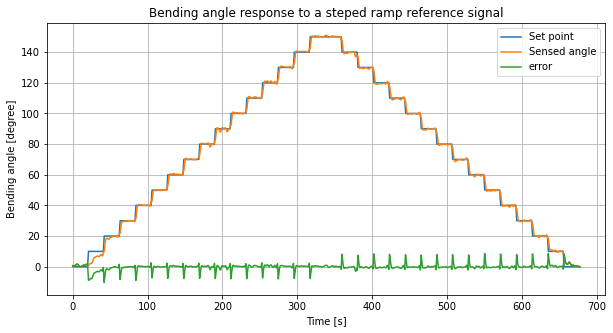

In [180]:
name="Dataset/"+filename+".csv"
with open(name,"a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.025)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

fname="Dataset/"+filename+"_filtered.csv"
df.to_csv(fname)
    
a=2*samples
ydata=df['angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
ydata4=ydata3-ydata2
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata3, label='Sensed angle')
plt.plot(xdata, ydata4, label='error')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a steped ramp reference signal')
plt.draw()
plt.grid(True)
plt.legend() 

figurename="Dataset/"+filename+".jpg"
fig.savefig(figurename, bbox_inches='tight', format='jpg')

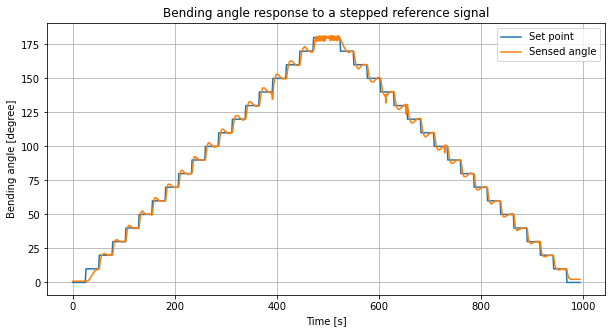

In [142]:
name="Dataset/Jonathan_dataset24.csv"
with open(".csv","a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.05)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()
    
a=3*samples
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a stepped reference signal')
plt.draw()
plt.grid(True)
plt.legend() 
fig.savefig('step24.jpg', bbox_inches='tight', format='jpg')


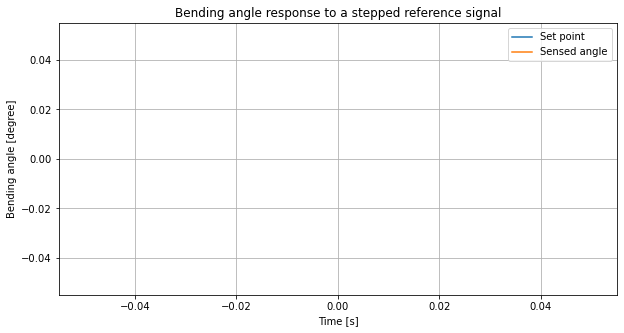

In [169]:
a=2000
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1000:2000]
ydata2=ydata2[1000:2000]
ydata3=ydata3[1000:2000]
xdata=xdata[1000:2000]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a stepped reference signal')
plt.draw()
plt.grid(True)
plt.legend() 
fig.savefig('step28_segment.jpg', bbox_inches='tight', format='jpg')

In [ ]:
Steped signal

In [112]:
i=0
j=0
filename="New_Step_dataset_0_60_19"
name="Dataset/"+filename+".csv"

max_value=60
min_value=0

steps=300
samples=2*steps
factor=60 

ser=star_communication('COM14')
time.sleep(5)
calibrate_zero(ser)
time.sleep(0.02)
calibrate_zero(ser)

bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open(name,"a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])

degree=min_value

while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree+factor
        if degree > max_value:
            degree=max_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


i=0
j=0
degree=max_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree-factor
        if degree < min_value:
            degree=min_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
close_communication(ser)

ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

l0

l0

start
0 ['-0.46' '6.02' '0.00' '47' '']
1 ['-0.46' '5.48' '0.00' '47' '']
2 ['-0.46' '6.35' '0.00' '47' '']
3 ['-0.46' '6.02' '0.00' '47' '']
4 ['-0.46' '6.13' '0.00' '47' '']
5 ['-0.46' '5.81' '0.00' '47' '']
6 ['-0.46' '5.37' '0.00' '47' '']
7 ['-0.46' '5.59' '0.00' '47' '']
8 ['-0.46' '5.70' '0.00' '47' '']
9 ['-0.46' '6.02' '0.00' '47' '']
10 ['-0.46' '5.70' '0.00' '47' '']
11 ['-0.46' '5.81' '0.00' '47' '']
12 ['-0.46' '6.24' '0.00' '47' '']
13 ['-0.46' '6.35' '0.00' '47' '']
14 ['-0.46' '5.91' '0.00' '47' '']
15 ['-0.46' '6.24' '0.00' '47' '']
16 ['-0.46' '6.46' '0.00' '47' '']
17 ['-0.46' '6.68' '0.00' '47' '']
18 ['-0.46' '6.35' '0.00' '47' '']
19 ['-0.46' '6.57' '0.00' '47' '']
20 ['-0.46' '6.68' '0.00' '47' '']
21 ['-0.46' '6.57' '0.00' '47' '']
22 ['-0.46' '6.68' '0.00' '47' '']
23 ['-0.46' '6.79' '0.00' '47' '']
24 ['-0.46' '6.46' '0.00' '47' '']
25 ['-0.46' '6.79' '0.00' '47' '']
26 ['-0.46' '6.35' '0.00' '47' '']
27 ['-0.46' '5.48' '0.00' '47' '']
28 ['-0.46' '5.4

237 ['-0.30' '7.44' '0.00' '46' '']
238 ['-0.30' '7.33' '0.00' '46' '']
239 ['-0.30' '7.66' '0.00' '46' '']
240 ['-0.30' '6.57' '0.00' '46' '']
241 ['-0.30' '6.68' '0.00' '46' '']
242 ['-0.30' '7.33' '0.00' '46' '']
243 ['-0.30' '7.66' '0.00' '46' '']
244 ['-0.30' '6.68' '0.00' '46' '']
245 ['-0.30' '6.79' '0.00' '46' '']
246 ['-0.30' '7.44' '0.00' '46' '']
247 ['-0.30' '7.44' '0.00' '46' '']
248 ['-0.30' '7.66' '0.00' '46' '']
249 ['-0.30' '6.79' '0.00' '46' '']
250 ['-0.30' '7.00' '0.00' '46' '']
251 ['-0.30' '7.55' '0.00' '46' '']
252 ['-0.30' '7.00' '0.00' '46' '']
253 ['-0.30' '6.90' '0.00' '46' '']
254 ['-0.30' '7.00' '0.00' '46' '']
255 ['-0.30' '7.66' '0.00' '46' '']
256 ['-0.30' '7.44' '0.00' '46' '']
257 ['-0.30' '6.79' '0.00' '46' '']
258 ['-0.30' '7.22' '0.00' '46' '']
259 ['-0.30' '7.77' '0.00' '46' '']
260 ['-0.30' '6.68' '0.00' '46' '']
261 ['-0.30' '7.00' '0.00' '46' '']
262 ['-0.30' '7.55' '0.00' '46' '']
263 ['-0.30' '6.79' '0.00' '46' '']
264 ['-0.30' '6.90' '0.00' '

456 ['68.79' '20.52' '60.00' '98' '']
457 ['68.79' '20.52' '60.00' '98' '']
458 ['68.79' '20.52' '60.00' '97' '']
459 ['68.79' '21.07' '60.00' '97' '']
460 ['68.79' '20.52' '60.00' '96' '']
461 ['68.79' '20.52' '60.00' '96' '']
462 ['68.79' '20.74' '60.00' '95' '']
463 ['68.79' '20.52' '60.00' '95' '']
464 ['68.79' '20.41' '60.00' '95' '']
465 ['68.79' '20.52' '60.00' '94' '']
466 ['68.79' '20.41' '60.00' '94' '']
467 ['68.79' '20.41' '60.00' '94' '']
468 ['68.79' '20.52' '60.00' '94' '']
469 ['68.79' '20.52' '60.00' '93' '']
470 ['68.79' '20.41' '60.00' '93' '']
471 ['68.79' '20.41' '60.00' '92' '']
472 ['68.79' '20.41' '60.00' '92' '']
473 ['68.79' '20.52' '60.00' '91' '']
474 ['68.79' '20.41' '60.00' '91' '']
475 ['68.79' '20.30' '60.00' '91' '']
476 ['68.79' '20.52' '60.00' '90' '']
477 ['68.79' '21.39' '60.00' '90' '']
478 ['68.79' '20.41' '60.00' '89' '']
479 ['68.79' '20.41' '60.00' '89' '']
480 ['68.79' '20.41' '60.00' '88' '']
481 ['68.79' '20.41' '60.00' '88' '']
482 ['68.79'

78 ['63.13' '20.19' '60.00' '90' '']
79 ['63.13' '20.19' '60.00' '90' '']
80 ['63.13' '20.19' '60.00' '90' '']
81 ['63.13' '20.08' '60.00' '90' '']
82 ['63.13' '20.19' '60.00' '90' '']
83 ['63.13' '20.30' '60.00' '90' '']
84 ['63.13' '20.19' '60.00' '89' '']
85 ['63.13' '20.19' '60.00' '89' '']
86 ['63.13' '20.30' '60.00' '89' '']
87 ['63.13' '20.19' '60.00' '89' '']
88 ['63.13' '20.19' '60.00' '89' '']
89 ['63.13' '20.19' '60.00' '89' '']
90 ['63.13' '20.19' '60.00' '89' '']
91 ['63.13' '20.19' '60.00' '88' '']
92 ['63.13' '20.19' '60.00' '88' '']
93 ['62.31' '20.19' '60.00' '96' '']
94 ['62.31' '20.63' '60.00' '96' '']
95 ['62.31' '20.19' '60.00' '96' '']
96 ['62.31' '20.19' '60.00' '96' '']
97 ['62.31' '20.41' '60.00' '96' '']
98 ['62.31' '20.19' '60.00' '96' '']
99 ['62.31' '20.08' '60.00' '96' '']
100 ['62.31' '20.19' '60.00' '96' '']
101 ['62.31' '20.19' '60.00' '96' '']
102 ['62.31' '19.98' '60.00' '96' '']
103 ['62.31' '19.98' '60.00' '96' '']
104 ['62.31' '20.19' '60.00' '96' 

296 ['60.76' '19.98' '60.00' '96' '']
297 ['60.76' '19.98' '60.00' '96' '']
298 ['60.76' '21.07' '60.00' '96' '']
299 ['61.55' '20.08' '0.00' '-255' '']
300 ['60.78' '20.08' '0.00' '-255' '']
301 ['60.69' '20.08' '0.00' '-255' '']
302 ['60.69' '20.19' '0.00' '-255' '']
303 ['60.69' '20.08' '0.00' '-255' '']
304 ['60.69' '20.08' '0.00' '-255' '']
305 ['60.69' '20.08' '0.00' '-255' '']
306 ['59.92' '20.19' '0.00' '-255' '']
307 ['59.92' '20.19' '0.00' '-255' '']
308 ['59.92' '20.19' '0.00' '-255' '']
309 ['59.92' '20.08' '0.00' '-255' '']
310 ['59.92' '20.08' '0.00' '-255' '']
311 ['59.24' '20.19' '0.00' '-255' '']
312 ['59.16' '20.08' '0.00' '-255' '']
313 ['59.16' '20.08' '0.00' '-255' '']
314 ['59.16' '20.08' '0.00' '-255' '']
315 ['59.16' '20.08' '0.00' '-255' '']
316 ['59.16' '20.08' '0.00' '-255' '']
317 ['58.34' '20.08' '0.00' '-255' '']
318 ['58.25' '20.08' '0.00' '-255' '']
319 ['58.25' '20.08' '0.00' '-255' '']
320 ['58.25' '20.08' '0.00' '-255' '']
321 ['58.25' '20.08' '0.00' 

508 ['35.26' '18.99' '0.00' '-255' '']
509 ['35.26' '18.99' '0.00' '-255' '']
510 ['35.26' '18.99' '0.00' '-255' '']
511 ['35.26' '18.89' '0.00' '-255' '']
512 ['35.26' '18.99' '0.00' '-255' '']
513 ['34.50' '18.89' '0.00' '-255' '']
514 ['34.50' '18.89' '0.00' '-255' '']
515 ['34.50' '18.99' '0.00' '-255' '']
516 ['34.50' '18.89' '0.00' '-255' '']
517 ['34.50' '18.89' '0.00' '-255' '']
518 ['34.50' '18.89' '0.00' '-255' '']
519 ['34.50' '18.89' '0.00' '-255' '']
520 ['33.73' '18.89' '0.00' '-255' '']
521 ['33.73' '18.89' '0.00' '-255' '']
522 ['33.73' '18.89' '0.00' '-255' '']
523 ['33.73' '18.89' '0.00' '-255' '']
524 ['33.73' '18.78' '0.00' '-255' '']
525 ['33.73' '18.89' '0.00' '-255' '']
526 ['33.73' '18.78' '0.00' '-255' '']
527 ['33.73' '18.78' '0.00' '-255' '']
528 ['32.92' '18.89' '0.00' '-255' '']
529 ['32.92' '18.78' '0.00' '-255' '']
530 ['32.92' '18.89' '0.00' '-255' '']
531 ['32.92' '18.78' '0.00' '-255' '']
532 ['32.92' '18.78' '0.00' '-255' '']
533 ['32.92' '18.78' '0.0

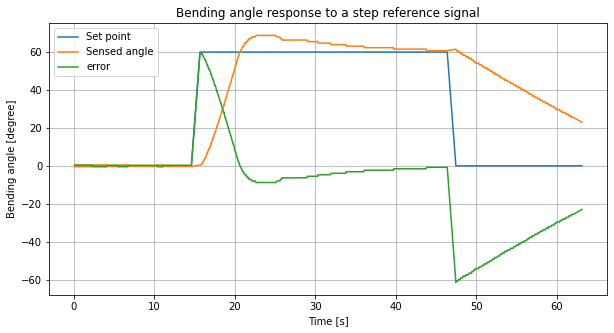

In [113]:
name="Dataset/"+filename+".csv"
with open(name,"a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.95)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

fname="Dataset/"+filename+"_filtered.csv"
df.to_csv(fname)
    
a=2*samples
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
ydata4=ydata2-ydata
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
plt.plot(xdata, ydata4, label='error')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a step reference signal')
plt.draw()
plt.grid(True)
plt.legend() 

figurename="Dataset/"+filename+".jpg"
fig.savefig(figurename, bbox_inches='tight', format='jpg')

In [ ]:
sine wave trajectory

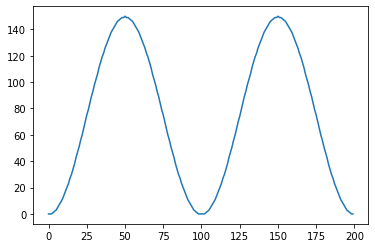

In [40]:
from math import*
Fs=100
f=1
sample=200
a=[0]*sample
for n in range(sample):
    a[n]=int(75+75*sin(3*pi/2-2*pi*f*n/Fs))
plt.plot(a)

In [327]:
a[0]

0

l0

l0

start
0 ['-0.19' '7.00' '0.00' '42' '']
1 ['-0.19' '7.33' '0.00' '42' '']
2 ['-0.19' '6.02' '0.00' '42' '']
3 ['-0.19' '6.13' '0.00' '42' '']
4 ['0.58' '7.22' '0.00' '38' '']
5 ['0.58' '7.11' '0.00' '38' '']
6 ['0.58' '6.24' '0.00' '38' '']
7 ['0.58' '7.33' '0.00' '38' '']
8 ['0.58' '6.35' '0.00' '38' '']
9 ['0.58' '7.44' '0.00' '37' '']
10 ['0.58' '7.44' '0.00' '37' '']
11 ['0.58' '7.11' '0.00' '37' '']
12 ['0.58' '7.77' '0.00' '37' '']
13 ['0.58' '7.33' '0.00' '37' '']
14 ['0.58' '7.88' '0.00' '37' '']
15 ['0.58' '7.44' '0.00' '37' '']
16 ['0.58' '6.90' '0.00' '36' '']
17 ['0.58' '7.88' '0.00' '36' '']
18 ['0.58' '7.44' '0.00' '36' '']
19 ['0.58' '7.22' '1.00' '36' '']
20 ['0.58' '6.68' '1.00' '36' '']
21 ['0.58' '7.77' '1.00' '41' '']
22 ['0.58' '6.79' '1.00' '41' '']
23 ['0.58' '7.22' '1.00' '41' '']
24 ['0.58' '7.99' '2.00' '41' '']
25 ['0.58' '8.42' '2.00' '46' '']
26 ['0.58' '7.44' '2.00' '46' '']
27 ['0.58' '7.99' '2.00' '46' '']
28 ['0.58' '8.20' '2.00' '47' '']
29 ['1

219 ['142.06' '21.50' '142.00' '82' '']
220 ['142.06' '20.41' '142.00' '92' '']
221 ['142.06' '21.28' '142.00' '92' '']
222 ['142.06' '20.52' '142.00' '92' '']
223 ['142.06' '20.41' '142.00' '92' '']
224 ['143.68' '21.17' '144.00' '83' '']
225 ['143.68' '20.41' '144.00' '83' '']
226 ['143.68' '21.39' '144.00' '83' '']
227 ['143.68' '20.52' '144.00' '93' '']
228 ['143.68' '20.30' '144.00' '93' '']
229 ['143.68' '21.17' '146.00' '93' '']
230 ['143.68' '20.30' '146.00' '93' '']
231 ['144.76' '21.28' '146.00' '103' '']
232 ['144.77' '20.74' '146.00' '103' '']
233 ['144.77' '20.41' '146.00' '103' '']
234 ['146.68' '20.52' '147.00' '88' '']
235 ['146.68' '20.30' '147.00' '88' '']
236 ['146.68' '20.19' '147.00' '93' '']
237 ['146.68' '20.41' '147.00' '93' '']
238 ['147.53' '20.30' '147.00' '93' '']
239 ['149.22' '20.41' '148.00' '84' '']
240 ['149.22' '20.41' '148.00' '84' '']
241 ['149.22' '20.19' '148.00' '84' '']
242 ['149.22' '20.52' '148.00' '84' '']
243 ['149.22' '20.63' '148.00' '84' '

429 ['41.89' '17.90' '30.00' '19' '']
430 ['41.89' '17.90' '30.00' '19' '']
431 ['41.89' '17.90' '30.00' '2' '']
432 ['41.89' '17.80' '30.00' '2' '']
433 ['41.89' '17.80' '30.00' '1' '']
434 ['39.09' '13.76' '27.00' '-9' '']
435 ['39.09' '16.60' '27.00' '-9' '']
436 ['36.42' '16.92' '27.00' '-9' '']
437 ['34.60' '17.03' '27.00' '7' '']
438 ['33.71' '17.14' '27.00' '7' '']
439 ['31.51' '16.81' '23.00' '25' '']
440 ['30.59' '16.81' '23.00' '5' '']
441 ['30.58' '16.81' '23.00' '5' '']
442 ['30.58' '16.81' '23.00' '5' '']
443 ['30.58' '16.71' '23.00' '5' '']
444 ['28.05' '16.38' '20.00' '12' '']
445 ['28.05' '16.38' '20.00' '12' '']
446 ['28.05' '14.96' '20.00' '-3' '']
447 ['27.28' '15.62' '20.00' '-3' '']
448 ['27.19' '15.72' '20.00' '-3' '']
449 ['22.40' '15.62' '17.00' '20' '']
450 ['22.40' '15.62' '17.00' '5' '']
451 ['22.40' '15.62' '17.00' '5' '']
452 ['22.40' '15.62' '17.00' '5' '']
453 ['21.67' '15.62' '17.00' '4' '']
454 ['19.87' '15.18' '14.00' '14' '']
455 ['19.87' '13.54' '14.

654 ['95.17' '20.52' '98.00' '110' '']
655 ['95.17' '20.41' '98.00' '110' '']
656 ['95.17' '20.52' '98.00' '110' '']
657 ['95.17' '20.41' '98.00' '110' '']
658 ['95.17' '20.30' '98.00' '110' '']
659 ['100.21' '20.52' '102.00' '105' '']
660 ['100.21' '20.52' '102.00' '105' '']
661 ['100.21' '20.30' '102.00' '105' '']
662 ['100.21' '20.74' '102.00' '105' '']
663 ['100.21' '21.72' '102.00' '105' '']
664 ['104.51' '20.41' '106.00' '83' '']
665 ['104.51' '20.63' '106.00' '83' '']
666 ['104.51' '20.52' '106.00' '83' '']
667 ['104.51' '21.17' '106.00' '103' '']
668 ['104.51' '20.52' '106.00' '103' '']
669 ['107.70' '20.74' '111.00' '87' '']
670 ['107.70' '20.85' '111.00' '87' '']
671 ['107.70' '20.52' '111.00' '112' '']
672 ['107.70' '21.39' '111.00' '112' '']
673 ['107.70' '21.94' '111.00' '112' '']
674 ['113.08' '20.63' '115.00' '90' '']
675 ['113.09' '20.85' '115.00' '90' '']
676 ['113.09' '20.74' '115.00' '106' '']
677 ['113.09' '20.52' '115.00' '106' '']
678 ['113.09' '20.63' '115.00' '1

859 ['92.83' '19.98' '93.00' '143' '']
860 ['92.83' '19.98' '93.00' '122' '']
861 ['92.83' '19.98' '93.00' '122' '']
862 ['92.83' '19.98' '93.00' '122' '']
863 ['92.83' '19.98' '93.00' '122' '']
864 ['88.50' '19.87' '89.00' '142' '']
865 ['88.50' '19.98' '89.00' '125' '']
866 ['88.50' '19.87' '89.00' '125' '']
867 ['88.50' '19.87' '89.00' '125' '']
868 ['88.50' '19.87' '89.00' '125' '']
869 ['84.90' '19.87' '84.00' '141' '']
870 ['84.90' '19.87' '84.00' '120' '']
871 ['84.90' '19.87' '84.00' '120' '']
872 ['84.90' '19.76' '84.00' '120' '']
873 ['84.11' '19.87' '84.00' '124' '']
874 ['80.88' '19.76' '79.00' '142' '']
875 ['80.88' '19.76' '79.00' '117' '']
876 ['80.88' '19.76' '79.00' '117' '']
877 ['80.88' '19.76' '79.00' '117' '']
878 ['80.01' '19.76' '79.00' '120' '']
879 ['76.61' '19.65' '75.00' '118' '']
880 ['76.61' '19.65' '75.00' '118' '']
881 ['76.61' '19.54' '75.00' '118' '']
882 ['76.61' '19.65' '75.00' '118' '']
883 ['76.61' '19.65' '75.00' '118' '']
884 ['72.45' '19.54' '70.

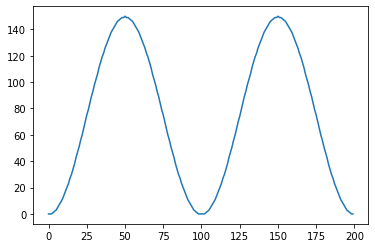

In [78]:
from math import*
Fs=100
f=1
sample=200
a=[0]*sample
for n in range(sample):
    a[n]=int(75+75*sin(3*pi/2-2*pi*f*n/Fs))
plt.plot(a)

i=0
j=0
k=0
filename="New_Sin_dataset_16"
name="Dataset/"+filename+".csv"

max_value=150
min_value=0

steps=5
samples=200*steps


ser=star_communication('COM14')
time.sleep(5)
calibrate_zero(ser)
time.sleep(0.02)
calibrate_zero(ser)

bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open(name,"a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])

degree=min_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=a[k]
        k=k+1
        j=0
        if degree > max_value:
            degree=max_value;
        bend_control(ser, degree)
    
    time.sleep(0.001)
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


close_communication(ser)

ser=star_communication('COM14')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

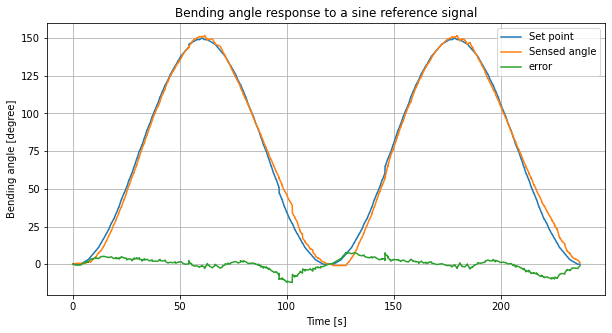

In [81]:
filename="New_Sin_dataset_17"
name="Dataset/"+filename+".csv"
with open(name,"a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.95)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

fname="Dataset/"+filename+"_filtered.csv"
df.to_csv(fname)
    
a=2*samples
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
ydata4=ydata2-ydata
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
plt.plot(xdata, ydata4, label='error')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a sine reference signal')
plt.draw()
plt.grid(True)
plt.legend() 

figurename="Dataset/"+filename+".jpg"
fig.savefig(figurename, bbox_inches='tight', format='jpg')

In [ ]:
bidirectional steped

In [378]:
i=0
j=0
filename="bidirectional_Step_dataset_0_60_4"
name="Dataset/"+filename+".csv"

max_value=60
min_value=0

steps=500
samples=2*steps
factor=60 

ser=star_communication('COM9')
time.sleep(5)
calibrate_zero(ser)
time.sleep(0.02)
calibrate_zero(ser)

bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open(name,"a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])

degree=min_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree+factor
        if degree > max_value:
            degree=max_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


i=0
j=0
degree=max_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree-factor
        if degree < 0:
            degree=min_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
    

i=0
j=0
degree=0
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree-factor
        if degree < -60:
            degree=min_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
    
degree=-60
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree+factor
        if degree > max_value:
            degree=max_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1   
    
    
close_communication(ser)

ser=star_communication('COM9')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

l0

l0

start
0 ['0.96' '0.25' '0.00' '-9' '']
1 ['0.96' '0.14' '0.00' '-9' '']
2 ['0.96' '0.25' '0.00' '-9' '']
3 ['0.96' '0.14' '0.00' '-9' '']
4 ['0.96' '0.36' '0.00' '-9' '']
5 ['0.96' '0.25' '0.00' '-9' '']
6 ['0.96' '0.25' '0.00' '-9' '']
7 ['0.96' '0.14' '0.00' '-9' '']
8 ['0.96' '0.14' '0.00' '-9' '']
9 ['0.96' '0.25' '0.00' '-9' '']
10 ['0.96' '0.25' '0.00' '-9' '']
11 ['0.96' '0.25' '0.00' '-9' '']
12 ['0.96' '0.36' '0.00' '-9' '']
13 ['0.96' '0.14' '0.00' '-9' '']
14 ['0.96' '0.14' '0.00' '-9' '']
15 ['0.96' '0.14' '0.00' '-9' '']
16 ['0.96' '0.14' '0.00' '-9' '']
17 ['0.96' '0.25' '0.00' '-9' '']
18 ['0.96' '0.25' '0.00' '-9' '']
19 ['0.96' '0.25' '0.00' '-9' '']
20 ['0.96' '0.03' '0.00' '-9' '']
21 ['0.96' '0.14' '0.00' '-9' '']
22 ['0.96' '0.25' '0.00' '-9' '']
23 ['0.96' '0.36' '0.00' '-9' '']
24 ['0.96' '0.03' '0.00' '-9' '']
25 ['0.96' '0.25' '0.00' '-9' '']
26 ['0.96' '0.25' '0.00' '-9' '']
27 ['0.96' '0.25' '0.00' '-9' '']
28 ['0.96' '0.14' '0.00' '-9' '']
29 ['0.96'

239 ['0.96' '0.25' '0.00' '-9' '']
240 ['0.96' '0.25' '0.00' '-9' '']
241 ['0.96' '0.25' '0.00' '-9' '']
242 ['0.96' '0.14' '0.00' '-9' '']
243 ['0.96' '0.25' '0.00' '-9' '']
244 ['0.96' '0.14' '0.00' '-9' '']
245 ['0.96' '0.36' '0.00' '-9' '']
246 ['0.96' '0.25' '0.00' '-9' '']
247 ['0.96' '0.25' '0.00' '-9' '']
248 ['0.96' '0.14' '0.00' '-9' '']
249 ['0.96' '0.25' '0.00' '-9' '']
250 ['0.96' '0.25' '0.00' '-9' '']
251 ['0.96' '0.14' '0.00' '-9' '']
252 ['0.96' '0.25' '0.00' '-9' '']
253 ['0.96' '0.25' '0.00' '-9' '']
254 ['0.96' '0.03' '0.00' '-9' '']
255 ['0.96' '0.25' '0.00' '-9' '']
256 ['0.96' '0.14' '0.00' '-9' '']
257 ['0.96' '0.25' '0.00' '-9' '']
258 ['0.96' '0.14' '0.00' '-9' '']
259 ['0.96' '0.25' '0.00' '-9' '']
260 ['0.96' '0.25' '0.00' '-9' '']
261 ['0.96' '0.14' '0.00' '-9' '']
262 ['0.96' '0.25' '0.00' '-9' '']
263 ['0.96' '0.14' '0.00' '-9' '']
264 ['0.96' '0.25' '0.00' '-9' '']
265 ['0.96' '0.25' '0.00' '-9' '']
266 ['0.96' '0.14' '0.00' '-9' '']
267 ['0.96' '0.03' '

475 ['0.96' '0.25' '0.00' '-9' '']
476 ['0.96' '0.14' '0.00' '-9' '']
477 ['0.96' '0.14' '0.00' '-9' '']
478 ['0.96' '0.25' '0.00' '-9' '']
479 ['0.96' '0.14' '0.00' '-9' '']
480 ['0.96' '0.25' '0.00' '-9' '']
481 ['0.96' '0.25' '0.00' '-9' '']
482 ['0.96' '0.14' '0.00' '-9' '']
483 ['0.96' '0.25' '0.00' '-9' '']
484 ['0.96' '0.25' '0.00' '-9' '']
485 ['0.96' '0.14' '0.00' '-9' '']
486 ['0.96' '0.14' '0.00' '-9' '']
487 ['0.96' '0.25' '0.00' '-9' '']
488 ['0.96' '0.25' '0.00' '-9' '']
489 ['0.96' '0.25' '0.00' '-9' '']
490 ['0.96' '0.14' '0.00' '-9' '']
491 ['0.96' '0.25' '0.00' '-9' '']
492 ['0.96' '0.14' '0.00' '-9' '']
493 ['0.96' '0.14' '0.00' '-9' '']
494 ['0.96' '0.25' '0.00' '-9' '']
495 ['0.96' '0.25' '0.00' '-9' '']
496 ['0.96' '0.25' '0.00' '-9' '']
497 ['0.96' '0.25' '0.00' '-9' '']
498 ['0.96' '0.14' '0.00' '-9' '']
499 ['0.96' '0.14' '60.00' '-9' '']
500 ['0.96' '0.25' '60.00' '-9' '']
501 ['0.96' '2.86' '60.00' '255' '']
502 ['-0.05' '3.63' '60.00' '255' '']
503 ['-2.46' 

688 ['-3.90' '18.89' '60.00' '255' '']
689 ['-3.90' '17.36' '60.00' '255' '']
690 ['-3.90' '17.90' '60.00' '255' '']
691 ['-3.90' '18.23' '60.00' '255' '']
692 ['-3.90' '18.89' '60.00' '255' '']
693 ['-3.90' '17.47' '60.00' '255' '']
694 ['-3.90' '17.90' '60.00' '255' '']
695 ['-3.90' '17.14' '60.00' '255' '']
696 ['-3.90' '17.25' '60.00' '255' '']
697 ['-3.90' '17.90' '60.00' '255' '']
698 ['-3.90' '20.30' '60.00' '255' '']
699 ['-3.90' '17.14' '60.00' '255' '']
700 ['-3.90' '20.96' '60.00' '255' '']
701 ['-3.90' '18.56' '60.00' '255' '']
702 ['-3.90' '19.32' '60.00' '255' '']
703 ['-3.90' '18.01' '60.00' '255' '']
704 ['-3.90' '21.61' '60.00' '255' '']
705 ['-3.90' '21.72' '60.00' '255' '']
706 ['-3.90' '19.10' '60.00' '255' '']
707 ['-3.90' '18.78' '60.00' '255' '']
708 ['-3.90' '17.14' '60.00' '255' '']
709 ['-3.90' '21.83' '60.00' '255' '']
710 ['-3.90' '19.32' '60.00' '255' '']
711 ['-3.90' '18.12' '60.00' '255' '']
712 ['-3.90' '20.74' '60.00' '255' '']
713 ['-3.90' '20.85' '60.

900 ['-3.85' '21.39' '60.00' '255' '']
901 ['-3.85' '20.41' '60.00' '255' '']
902 ['-3.85' '20.08' '60.00' '255' '']
903 ['-3.85' '19.98' '60.00' '255' '']
904 ['-3.85' '20.19' '60.00' '255' '']
905 ['-3.85' '19.65' '60.00' '255' '']
906 ['-4.67' '22.37' '60.00' '255' '']
907 ['-4.77' '20.63' '60.00' '255' '']
908 ['-4.77' '20.19' '60.00' '255' '']
909 ['-4.77' '22.70' '60.00' '255' '']
910 ['-5.58' '20.74' '60.00' '255' '']
911 ['-5.58' '20.85' '60.00' '255' '']
912 ['-4.82' '20.30' '60.00' '255' '']
913 ['-5.62' '19.43' '60.00' '255' '']
914 ['-5.62' '19.43' '60.00' '255' '']
915 ['-5.62' '20.85' '60.00' '255' '']
916 ['-5.62' '23.14' '60.00' '255' '']
917 ['-5.62' '19.54' '60.00' '255' '']
918 ['-5.62' '23.25' '60.00' '255' '']
919 ['-5.62' '21.28' '60.00' '255' '']
920 ['-6.37' '20.52' '60.00' '255' '']
921 ['-6.37' '19.65' '60.00' '255' '']
922 ['-6.37' '20.63' '60.00' '255' '']
923 ['-6.37' '20.41' '60.00' '255' '']
924 ['-6.37' '23.25' '60.00' '255' '']
925 ['-6.37' '20.96' '60.

110 ['-8.86' '22.81' '60.00' '255' '']
111 ['-8.86' '25.75' '60.00' '255' '']
112 ['-8.86' '22.70' '60.00' '255' '']
113 ['-8.86' '25.86' '60.00' '255' '']
114 ['-8.86' '22.59' '60.00' '255' '']
115 ['-8.86' '22.16' '60.00' '255' '']
116 ['-8.86' '24.66' '60.00' '255' '']
117 ['-8.86' '23.14' '60.00' '255' '']
118 ['-8.00' '22.70' '60.00' '255' '']
119 ['-8.00' '25.86' '60.00' '255' '']
120 ['-8.00' '21.50' '60.00' '255' '']
121 ['-8.00' '21.72' '60.00' '255' '']
122 ['-8.00' '21.61' '60.00' '255' '']
123 ['-8.00' '23.57' '60.00' '255' '']
124 ['-8.00' '22.16' '60.00' '255' '']
125 ['-8.00' '23.57' '60.00' '255' '']
126 ['-8.00' '23.14' '60.00' '255' '']
127 ['-8.00' '25.86' '60.00' '255' '']
128 ['-8.00' '22.81' '60.00' '255' '']
129 ['-8.00' '23.25' '60.00' '255' '']
130 ['-8.00' '21.94' '60.00' '255' '']
131 ['-7.24' '22.92' '60.00' '255' '']
132 ['-7.24' '22.81' '60.00' '255' '']
133 ['-7.24' '22.70' '60.00' '255' '']
134 ['-7.24' '21.61' '60.00' '255' '']
135 ['-7.24' '21.72' '60.

322 ['-15.73' '0.57' '60.00' '255' '']
323 ['-17.69' '0.57' '60.00' '255' '']
324 ['-17.99' '0.57' '60.00' '255' '']
325 ['-16.79' '0.90' '60.00' '255' '']
326 ['-18.04' '2.97' '60.00' '255' '']
327 ['-17.15' '2.97' '60.00' '255' '']
328 ['-16.30' '3.84' '60.00' '255' '']
329 ['-17.53' '3.19' '60.00' '255' '']
330 ['-18.30' '0.68' '60.00' '255' '']
331 ['-16.90' '0.57' '60.00' '255' '']
332 ['-16.90' '0.57' '60.00' '255' '']
333 ['-18.03' '1.88' '60.00' '255' '']
334 ['-16.93' '1.99' '60.00' '255' '']
335 ['-16.92' '1.55' '60.00' '255' '']
336 ['-17.76' '4.28' '60.00' '255' '']
337 ['-17.76' '1.88' '60.00' '255' '']
338 ['-17.76' '1.88' '60.00' '255' '']
339 ['-17.76' '2.32' '60.00' '255' '']
340 ['-17.76' '0.68' '60.00' '255' '']
341 ['-16.82' '0.68' '60.00' '255' '']
342 ['-17.72' '0.68' '60.00' '255' '']
343 ['-17.73' '1.55' '60.00' '255' '']
344 ['-17.73' '1.45' '60.00' '255' '']
345 ['-17.73' '4.06' '60.00' '255' '']
346 ['-17.73' '4.06' '60.00' '255' '']
347 ['-17.73' '0.90' '60.

534 ['-21.60' '0.25' '0.00' '198' '']
535 ['-21.60' '0.14' '0.00' '215' '']
536 ['-21.60' '0.14' '0.00' '215' '']
537 ['-20.49' '0.25' '0.00' '215' '']
538 ['-19.71' '0.25' '0.00' '215' '']
539 ['-19.70' '0.14' '0.00' '197' '']
540 ['-17.27' '0.25' '0.00' '197' '']
541 ['-17.26' '0.25' '0.00' '172' '']
542 ['-17.26' '0.14' '0.00' '172' '']
543 ['-17.26' '0.14' '0.00' '172' '']
544 ['-18.03' '0.25' '0.00' '172' '']
545 ['-17.24' '0.25' '0.00' '180' '']
546 ['-17.23' '0.14' '0.00' '172' '']
547 ['-18.12' '0.14' '0.00' '172' '']
548 ['-18.12' '0.25' '0.00' '181' '']
549 ['-18.12' '0.25' '0.00' '181' '']
550 ['-18.12' '0.25' '0.00' '181' '']
551 ['-18.12' '0.14' '0.00' '181' '']
552 ['-17.13' '0.25' '0.00' '171' '']
553 ['-17.13' '0.25' '0.00' '171' '']
554 ['-17.13' '0.25' '0.00' '171' '']
555 ['-17.13' '0.25' '0.00' '171' '']
556 ['-17.13' '0.25' '0.00' '171' '']
557 ['-17.91' '0.14' '0.00' '179' '']
558 ['-17.91' '0.14' '0.00' '179' '']
559 ['-17.91' '0.14' '0.00' '179' '']
560 ['-17.91

753 ['-18.28' '0.14' '0.00' '182' '']
754 ['-18.28' '0.25' '0.00' '182' '']
755 ['-18.28' '0.14' '0.00' '182' '']
756 ['-18.28' '0.25' '0.00' '182' '']
757 ['-18.28' '0.25' '0.00' '182' '']
758 ['-18.28' '0.25' '0.00' '182' '']
759 ['-18.28' '0.14' '0.00' '182' '']
760 ['-18.28' '0.25' '0.00' '182' '']
761 ['-18.28' '0.25' '0.00' '182' '']
762 ['-18.28' '0.25' '0.00' '182' '']
763 ['-18.28' '0.14' '0.00' '182' '']
764 ['-18.28' '0.14' '0.00' '182' '']
765 ['-18.28' '0.14' '0.00' '182' '']
766 ['-18.28' '0.25' '0.00' '182' '']
767 ['-18.28' '0.25' '0.00' '182' '']
768 ['-18.28' '0.25' '0.00' '182' '']
769 ['-18.28' '0.25' '0.00' '182' '']
770 ['-18.28' '0.14' '0.00' '182' '']
771 ['-18.28' '0.25' '0.00' '182' '']
772 ['-18.28' '0.25' '0.00' '182' '']
773 ['-18.28' '0.25' '0.00' '182' '']
774 ['-18.28' '0.25' '0.00' '182' '']
775 ['-16.97' '0.25' '0.00' '169' '']
776 ['-16.97' '0.25' '0.00' '169' '']
777 ['-16.97' '0.14' '0.00' '169' '']
778 ['-17.84' '0.25' '0.00' '169' '']
779 ['-18.81

970 ['-18.89' '0.25' '0.00' '188' '']
971 ['-18.89' '0.25' '0.00' '188' '']
972 ['-18.89' '0.14' '0.00' '188' '']
973 ['-18.89' '0.14' '0.00' '188' '']
974 ['-18.89' '0.14' '0.00' '188' '']
975 ['-18.89' '0.14' '0.00' '188' '']
976 ['-18.89' '0.25' '0.00' '188' '']
977 ['-18.89' '0.14' '0.00' '188' '']
978 ['-18.89' '0.14' '0.00' '188' '']
979 ['-18.89' '0.25' '0.00' '188' '']
980 ['-18.89' '0.25' '0.00' '188' '']
981 ['-18.89' '0.25' '0.00' '188' '']
982 ['-18.89' '0.25' '0.00' '188' '']
983 ['-18.89' '0.14' '0.00' '188' '']
984 ['-18.89' '0.25' '0.00' '188' '']
985 ['-18.89' '0.14' '0.00' '188' '']
986 ['-18.89' '0.25' '0.00' '188' '']
987 ['-18.89' '0.14' '0.00' '188' '']
988 ['-18.89' '0.25' '0.00' '188' '']
989 ['-18.89' '0.14' '0.00' '188' '']
990 ['-18.89' '0.25' '0.00' '188' '']
991 ['-18.89' '0.14' '0.00' '188' '']
992 ['-18.89' '0.25' '0.00' '188' '']
993 ['-18.89' '0.14' '0.00' '188' '']
994 ['-18.89' '0.25' '0.00' '188' '']
995 ['-18.89' '0.25' '0.00' '188' '']
996 ['-18.89

189 ['-18.89' '0.25' '0.00' '188' '']
190 ['-18.89' '0.25' '0.00' '188' '']
191 ['-18.89' '0.25' '0.00' '188' '']
192 ['-18.89' '0.14' '0.00' '188' '']
193 ['-18.89' '0.25' '0.00' '188' '']
194 ['-18.89' '0.36' '0.00' '188' '']
195 ['-18.89' '0.25' '0.00' '188' '']
196 ['-18.89' '0.25' '0.00' '188' '']
197 ['-18.89' '0.25' '0.00' '188' '']
198 ['-18.89' '0.25' '0.00' '188' '']
199 ['-18.89' '0.25' '0.00' '188' '']
200 ['-18.89' '0.25' '0.00' '188' '']
201 ['-18.89' '0.25' '0.00' '188' '']
202 ['-18.89' '0.14' '0.00' '188' '']
203 ['-18.89' '0.14' '0.00' '188' '']
204 ['-18.89' '0.25' '0.00' '188' '']
205 ['-18.89' '0.25' '0.00' '188' '']
206 ['-18.89' '0.25' '0.00' '188' '']
207 ['-18.89' '0.14' '0.00' '188' '']
208 ['-18.89' '0.14' '0.00' '188' '']
209 ['-18.89' '0.25' '0.00' '188' '']
210 ['-18.89' '0.36' '0.00' '188' '']
211 ['-18.89' '0.25' '0.00' '188' '']
212 ['-18.89' '0.14' '0.00' '188' '']
213 ['-18.89' '0.14' '0.00' '188' '']
214 ['-18.89' '0.25' '0.00' '188' '']
215 ['-18.89

406 ['-18.89' '0.25' '0.00' '188' '']
407 ['-18.89' '0.25' '0.00' '188' '']
408 ['-18.89' '0.25' '0.00' '188' '']
409 ['-18.89' '0.25' '0.00' '188' '']
410 ['-18.89' '0.25' '0.00' '188' '']
411 ['-18.89' '0.25' '0.00' '188' '']
412 ['-18.89' '0.25' '0.00' '188' '']
413 ['-18.89' '0.25' '0.00' '188' '']
414 ['-18.89' '0.25' '0.00' '188' '']
415 ['-18.89' '0.25' '0.00' '188' '']
416 ['-18.89' '0.25' '0.00' '188' '']
417 ['-18.89' '0.14' '0.00' '188' '']
418 ['-18.89' '0.25' '0.00' '188' '']
419 ['-18.89' '0.14' '0.00' '188' '']
420 ['-18.89' '0.14' '0.00' '188' '']
421 ['-18.89' '0.25' '0.00' '188' '']
422 ['-18.89' '0.25' '0.00' '188' '']
423 ['-18.89' '0.25' '0.00' '188' '']
424 ['-18.89' '0.14' '0.00' '188' '']
425 ['-18.89' '0.25' '0.00' '188' '']
426 ['-18.89' '0.14' '0.00' '188' '']
427 ['-18.89' '0.14' '0.00' '188' '']
428 ['-18.89' '0.25' '0.00' '188' '']
429 ['-18.89' '0.14' '0.00' '188' '']
430 ['-18.89' '0.25' '0.00' '188' '']
431 ['-18.89' '0.25' '0.00' '188' '']
432 ['-18.89

616 ['-43.95' '0.25' '-60.00' '-160' '']
617 ['-43.95' '0.25' '-60.00' '-160' '']
618 ['-43.12' '0.25' '-60.00' '-160' '']
619 ['-43.12' '0.25' '-60.00' '-168' '']
620 ['-43.12' '0.25' '-60.00' '-168' '']
621 ['-43.12' '0.25' '-60.00' '-168' '']
622 ['-43.12' '0.25' '-60.00' '-168' '']
623 ['-43.12' '0.25' '-60.00' '-168' '']
624 ['-43.12' '0.14' '-60.00' '-168' '']
625 ['-43.12' '0.14' '-60.00' '-168' '']
626 ['-43.12' '0.25' '-60.00' '-168' '']
627 ['-43.12' '0.25' '-60.00' '-168' '']
628 ['-42.42' '0.25' '-60.00' '-168' '']
629 ['-42.34' '0.25' '-60.00' '-168' '']
630 ['-42.34' '0.25' '-60.00' '-176' '']
631 ['-42.34' '0.25' '-60.00' '-176' '']
632 ['-42.34' '0.25' '-60.00' '-176' '']
633 ['-42.34' '0.36' '-60.00' '-176' '']
634 ['-42.34' '0.25' '-60.00' '-176' '']
635 ['-42.34' '0.25' '-60.00' '-176' '']
636 ['-42.34' '0.25' '-60.00' '-176' '']
637 ['-42.34' '0.25' '-60.00' '-176' '']
638 ['-42.34' '0.14' '-60.00' '-176' '']
639 ['-42.34' '0.25' '-60.00' '-176' '']
640 ['-42.34' '0

820 ['-51.37' '0.25' '-60.00' '-86' '']
821 ['-51.37' '0.03' '-60.00' '-86' '']
822 ['-51.37' '0.25' '-60.00' '-86' '']
823 ['-51.37' '0.25' '-60.00' '-86' '']
824 ['-51.37' '0.25' '-60.00' '-86' '']
825 ['-51.37' '0.14' '-60.00' '-86' '']
826 ['-51.37' '0.25' '-60.00' '-86' '']
827 ['-51.37' '0.25' '-60.00' '-86' '']
828 ['-51.37' '0.36' '-60.00' '-86' '']
829 ['-51.37' '0.25' '-60.00' '-86' '']
830 ['-51.37' '0.25' '-60.00' '-86' '']
831 ['-51.37' '0.25' '-60.00' '-86' '']
832 ['-51.37' '0.25' '-60.00' '-86' '']
833 ['-51.37' '0.25' '-60.00' '-86' '']
834 ['-51.37' '0.25' '-60.00' '-86' '']
835 ['-51.37' '0.25' '-60.00' '-86' '']
836 ['-51.37' '0.25' '-60.00' '-86' '']
837 ['-51.37' '0.25' '-60.00' '-86' '']
838 ['-51.37' '0.25' '-60.00' '-86' '']
839 ['-51.37' '0.14' '-60.00' '-86' '']
840 ['-51.37' '0.25' '-60.00' '-86' '']
841 ['-51.37' '0.14' '-60.00' '-86' '']
842 ['-51.37' '0.25' '-60.00' '-86' '']
843 ['-51.37' '0.25' '-60.00' '-86' '']
844 ['-51.37' '0.14' '-60.00' '-86' '']


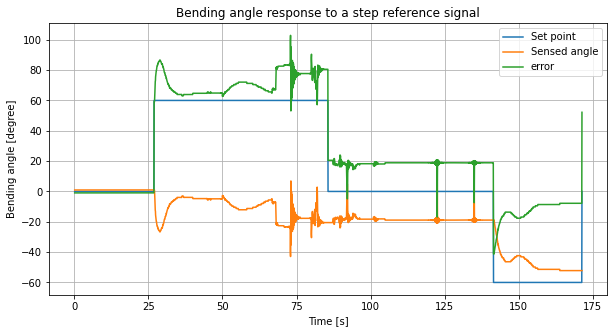

In [379]:
name="Dataset/"+filename+".csv"
with open(name,"a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.95)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

fname="Dataset/"+filename+"_filtered.csv"
df.to_csv(fname)
    
a=4*samples
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
ydata4=ydata2-ydata
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
plt.plot(xdata, ydata4, label='error')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a step reference signal')
plt.draw()
plt.grid(True)
plt.legend() 

figurename="Dataset/"+filename+".jpg"
fig.savefig(figurename, bbox_inches='tight', format='jpg')

In [ ]:
Bimanual sine wave trajectory

l0

l0

start
0 ['0.24' '0.14' '0.00' '-2' '']
1 ['1.31' '0.14' '0.00' '-2' '']
2 ['1.31' '0.25' '0.00' '-13' '']
3 ['1.31' '0.25' '0.00' '-13' '']
4 ['1.31' '0.14' '-60.00' '-13' '']
5 ['1.31' '0.14' '-60.00' '-13' '']
6 ['1.31' '0.14' '-60.00' '-13' '']
7 ['1.31' '0.25' '-60.00' '-255' '']
8 ['1.31' '0.14' '-60.00' '-255' '']
9 ['1.31' '0.14' '-59.00' '-255' '']
10 ['1.31' '0.25' '-59.00' '-255' '']
11 ['1.31' '0.14' '-59.00' '-255' '']
12 ['0.12' '0.14' '-59.00' '-255' '']
13 ['-0.70' '0.14' '-59.00' '-255' '']
14 ['-1.66' '0.25' '-58.00' '-255' '']
15 ['-2.33' '0.14' '-58.00' '-255' '']
16 ['-3.49' '0.14' '-58.00' '-255' '']
17 ['-3.50' '0.25' '-58.00' '-255' '']
18 ['-3.50' '0.25' '-58.00' '-255' '']
19 ['-4.49' '0.25' '-56.00' '-255' '']
20 ['-4.49' '0.25' '-56.00' '-255' '']
21 ['-5.68' '0.36' '-56.00' '-255' '']
22 ['-5.68' '0.14' '-56.00' '-255' '']
23 ['-6.80' '0.25' '-56.00' '-255' '']
24 ['-7.92' '0.25' '-54.00' '-255' '']
25 ['-7.93' '0.25' '-54.00' '-255' '']
26 ['-8.75' 

209 ['-9.45' '19.54' '12.00' '255' '']
210 ['-9.45' '18.56' '12.00' '214' '']
211 ['-9.45' '18.45' '12.00' '214' '']
212 ['-9.45' '18.34' '12.00' '214' '']
213 ['-9.45' '19.32' '12.00' '214' '']
214 ['-9.45' '17.47' '5.00' '144' '']
215 ['-9.45' '18.23' '5.00' '144' '']
216 ['-9.45' '20.08' '5.00' '144' '']
217 ['-9.45' '16.81' '5.00' '144' '']
218 ['-9.45' '16.16' '5.00' '144' '']
219 ['-8.60' '17.03' '0.00' '136' '']
220 ['-8.60' '13.54' '0.00' '136' '']
221 ['-8.60' '13.00' '0.00' '86' '']
222 ['-9.58' '12.24' '0.00' '86' '']
223 ['-9.58' '12.02' '0.00' '95' '']
224 ['-10.42' '11.47' '-7.00' '95' '']
225 ['-10.43' '11.15' '-7.00' '95' '']
226 ['-11.34' '10.82' '-7.00' '34' '']
227 ['-11.45' '10.49' '-7.00' '34' '']
228 ['-12.38' '9.84' '-7.00' '53' '']
229 ['-14.40' '9.08' '-14.00' '53' '']
230 ['-15.71' '8.42' '-14.00' '5' '']
231 ['-17.10' '7.99' '-14.00' '5' '']
232 ['-18.08' '7.88' '-14.00' '39' '']
233 ['-20.60' '7.33' '-14.00' '39' '']
234 ['-23.04' '6.79' '-20.00' '30' '']
23

418 ['-29.22' '18.99' '55.00' '255' '']
419 ['-28.06' '18.23' '57.00' '255' '']
420 ['-28.06' '17.58' '57.00' '255' '']
421 ['-27.20' '17.03' '57.00' '255' '']
422 ['-26.20' '17.58' '57.00' '255' '']
423 ['-25.41' '17.80' '57.00' '255' '']
424 ['-24.54' '18.34' '58.00' '255' '']
425 ['-24.53' '17.36' '58.00' '255' '']
426 ['-24.53' '19.76' '58.00' '255' '']
427 ['-23.66' '17.47' '58.00' '255' '']
428 ['-23.56' '19.10' '58.00' '255' '']
429 ['-22.82' '18.23' '59.00' '255' '']
430 ['-21.96' '16.71' '59.00' '255' '']
431 ['-21.88' '17.36' '59.00' '255' '']
432 ['-20.98' '17.47' '59.00' '255' '']
433 ['-20.88' '21.07' '59.00' '255' '']
434 ['-20.88' '16.92' '59.00' '255' '']
435 ['-20.01' '20.19' '59.00' '255' '']
436 ['-20.01' '17.58' '59.00' '255' '']
437 ['18.97' '17.03' '59.00' '255' '']
438 ['-18.96' '18.78' '59.00' '255' '']
439 ['-18.96' '18.01' '59.00' '255' '']
440 ['-18.96' '18.12' '59.00' '255' '']
441 ['-18.06' '17.90' '59.00' '255' '']
442 ['-18.05' '18.89' '59.00' '255' '']
4

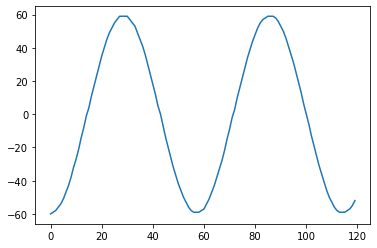

In [376]:
from math import*
Fs=16000
f=280
sample=120
a=[0]*sample
for n in range(sample):
    a[n]=int(60*sin(3*pi/2-2*pi*f*n/Fs))
plt.plot(a)

i=0
j=0
k=0
filename="Bimanual_Sin_dataset_2"
name="Dataset/"+filename+".csv"

max_value=60
min_value=0

steps=5
samples=120*steps


ser=star_communication('COM9')
time.sleep(5)
calibrate_zero(ser)
time.sleep(0.02)
calibrate_zero(ser)

bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open(name,"a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])

degree=min_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=a[k]
        k=k+1
        j=0
        if degree > max_value:
            degree=max_value;
        bend_control(ser, degree)
    
    time.sleep(0.001)
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


close_communication(ser)

ser=star_communication('COM9')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

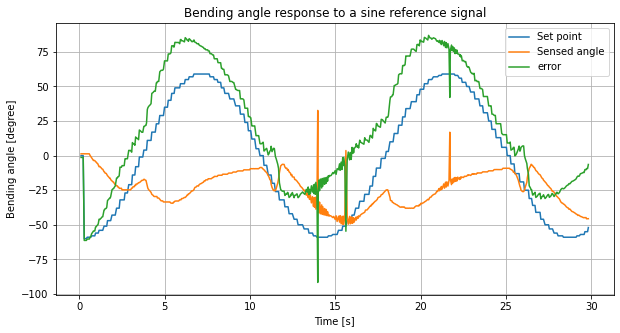

In [377]:
name="Dataset/"+filename+".csv"
with open(name,"a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.95)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

fname="Dataset/"+filename+"_filtered.csv"
df.to_csv(fname)
    
a=2*samples
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['Filtered_angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
ydata4=ydata2-ydata
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
plt.plot(xdata, ydata4, label='error')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a sine reference signal')
plt.draw()
plt.grid(True)
plt.legend() 

figurename="Dataset/"+filename+".jpg"
fig.savefig(figurename, bbox_inches='tight', format='jpg')

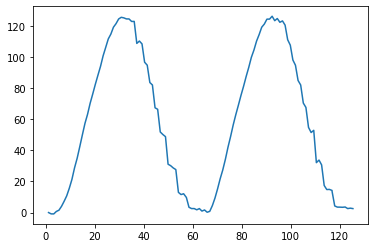

In [303]:
plt.plot(xdata, ydata, label='Sensed angle')

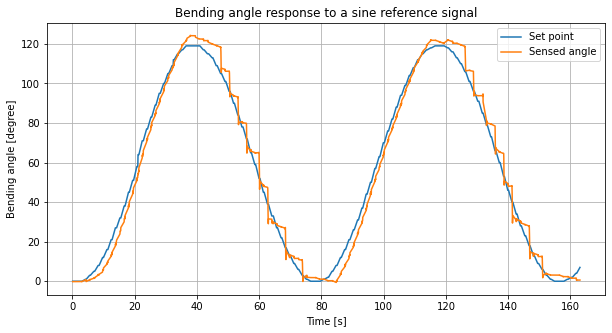

In [314]:
name="Dataset/Bimanual_Sin_dataset_1.csv"
with open(".csv","a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.75)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()

a=2*samples
ydata=df['Filtered_angle']
ydata2=df['set_point']
ydata3=df['angle']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
ydata4=ydata2-ydata
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
#plt.plot(xdata, ydata3, label='Unfilter data')
plt.plot(xdata, ydata2, label='Set point')
plt.plot(xdata, ydata, label='Sensed angle')
#plt.plot(xdata, ydata4, label='error')
plt.xlabel('Time [s]')
plt.ylabel('Bending angle [degree]')
plt.title('Bending angle response to a sine reference signal')
plt.draw()
plt.grid(True)
plt.legend() 


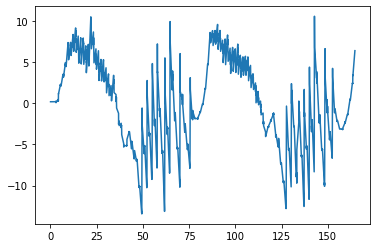

In [323]:
plt.plot(xdata, ydata4, label='error')

In [ ]:
i=0
j=0
filename="bidirectional_Step_dataset_0_60_4"
name="Dataset/"+filename+".csv"

max_value=60
min_value=0

steps=500
samples=2*steps
factor=60 

ser=star_communication('COM9')
time.sleep(5)
calibrate_zero(ser)
time.sleep(0.02)
calibrate_zero(ser)

bend_control(ser, 0)
values=feedback_data(ser,0)
to=time.perf_counter()
print('start')
with open(name,"a") as f:
            writer = csv.writer(f,delimiter=";",lineterminator='\r')
            writer.writerow(['time','angle','pressure','set_point','motor_speed'])

degree=min_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree+factor
        if degree > max_value:
            degree=max_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1


i=0
j=0
degree=max_value
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree-factor
        if degree < 0:
            degree=min_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
    

i=0
j=0
degree=0
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree-factor
        if degree < -60:
            degree=min_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1
    
degree=-60
while (i<samples):                      # Close loop controller
    j=j+1
    if j==steps :
        degree=degree+factor
        if degree > max_value:
            degree=max_value;
        bend_control(ser, degree)
        j=0
    
    time.sleep(0.02)
    
    
    #value2 = feedback_data2(ser,degree)
    #if len(value2)<5 or value2[0]==2000:
    #    values = value2
    
    values=feedback_data(ser,degree)
    with open(name,"a") as f:
                        writer = csv.writer(f,delimiter=";",lineterminator='\r')
                        writer.writerow([time.perf_counter()-to,values[0],values[1],values[2], values[3]])
    print(str(i)+' '+str(values))
    i=i+1   
    
    
close_communication(ser)

ser=star_communication('COM9')
time.sleep(2)
motor_control(ser,-10)
time.sleep(2)
ser.close()

In [ ]:
pressure sensor

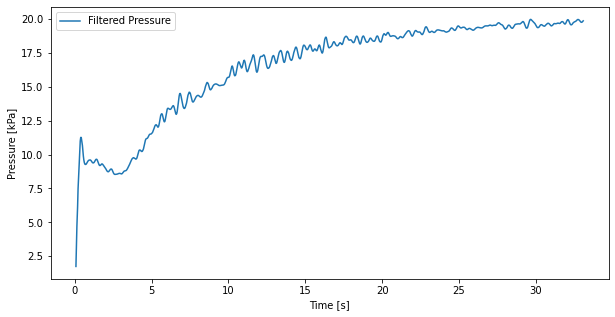

In [133]:
filename="Pressure_sensor_Step_dataset_100"
name="Dataset/"+filename+".csv"
with open(".csv","a") as f:
    df = pd.read_csv(name,delimiter=';')
    #Filtering
    b, a = signal.butter(3, 0.75)
    filter_angle = signal.filtfilt(b, a, df['angle'])
    df = df.assign(Filtered_angle=filter_angle)
    f.close()
    
    b, a = signal.butter(3, 0.18)
    filter_pressure = signal.filtfilt(b, a, df['pressure'])
    df = df.assign(Filtered_pressure=filter_pressure)
    f.close()
    
fname="Dataset/"+filename+"_filtered.csv"
df.to_csv(fname)

a=1000
ydata=df['Filtered_pressure']
ydata2=df['set_point']
ydata3=df['angle']
ydata5=df['pressure']
xdata=df['time']
ydata=ydata[1:a]
ydata2=ydata2[1:a]
ydata3=ydata3[1:a]
ydata4=ydata2-ydata
ydata5=ydata5[1:a]
xdata=xdata[1:a]
fig = plt.figure(figsize=(10,5))
plt.plot(xdata, ydata, label='Filtered Pressure')
#plt.plot(xdata, ydata5, label='Pressure')
#plt.plot(xdata, ydata4, label='error')
plt.xlabel('Time [s]')
plt.ylabel('Pressure [kPa]')

plt.draw()
plt.legend() 
figurename="Dataset/"+filename+".jpg"
fig.savefig(figurename, bbox_inches='tight', format='jpg')